In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost as xgb
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e4/sample_submission.csv
/kaggle/input/playground-series-s5e4/train.csv
/kaggle/input/playground-series-s5e4/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's start with some EDA

In [3]:
df = pd.read_csv('/kaggle/input/playground-series-s5e4/train.csv')

In [4]:
df = pd.read_csv('/kaggle/input/playground-series-s5e4/train.csv')
test_df = pd.read_csv("/kaggle/input/playground-series-s5e4/test.csv")

In [5]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


id     Podcast_Name Episode_Title  Episode_Length_minutes       Genre  \
0   0  Mystery Matters    Episode 98                     NaN  True Crime   
1   1    Joke Junction    Episode 26                  119.80      Comedy   
2   2   Study Sessions    Episode 16                   73.90   Education   
3   3   Digital Digest    Episode 45                   67.17  Technology   
4   4      Mind & Body    Episode 86                  110.51      Health   

   Host_Popularity_percentage Publication_Day Publication_Time  \
0                       74.81        Thursday            Night   
1                       66.95        Saturday        Afternoon   
2                       69.97         Tuesday          Evening   
3                       57.22          Monday          Morning   
4                       80.07          Monday        Afternoon   

   Guest_Popularity_percentage  Number_of_Ads Episode_Sentiment  \
0                          NaN            0.0          Positive   
1                        75.95            2.0          Negative   
2                         8.97            0.0          Negative   
3                        78.70            2.0          Positive   
4                        58.68            3.0           Neutral   

   Listening_Time_minutes  
0                31.41998  
1                88.01241  
2                44.92531  
3                46.27824  
4                75.61031

In [6]:
df.tail()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


id      Podcast_Name Episode_Title  Episode_Length_minutes  \
749995  749995      Learning Lab    Episode 25                   75.66   
749996  749996   Business Briefs    Episode 21                   75.75   
749997  749997  Lifestyle Lounge    Episode 51                   30.98   
749998  749998       Style Guide    Episode 47                  108.98   
749999  749999    Sports Central    Episode 99                   24.10   

            Genre  Host_Popularity_percentage Publication_Day  \
749995  Education                       69.36        Saturday   
749996   Business                       35.21        Saturday   
749997  Lifestyle                       78.58        Thursday   
749998  Lifestyle                       45.39        Thursday   
749999     Sports                       22.45        Saturday   

       Publication_Time  Guest_Popularity_percentage  Number_of_Ads  \
749995          Morning                          NaN            0.0   
749996            Night                          NaN            2.0   
749997          Morning                        84.89            0.0   
749998          Morning                        93.27            0.0   
749999            Night                        36.72            0.0   

       Episode_Sentiment  Listening_Time_minutes  
749995          Negative                56.87058  
749996           Neutral                45.46242  
749997          Negative                15.26000  
749998          Negative               100.72939  
749999           Neutral                11.94439

In [7]:
df.shape

(750000, 12)

In [8]:
df.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [9]:
def heatmap_of(df):
    plt.figure(figsize = (10,8))
    sns.heatmap(df, cmap = 'coolwarm')
    plt.show()

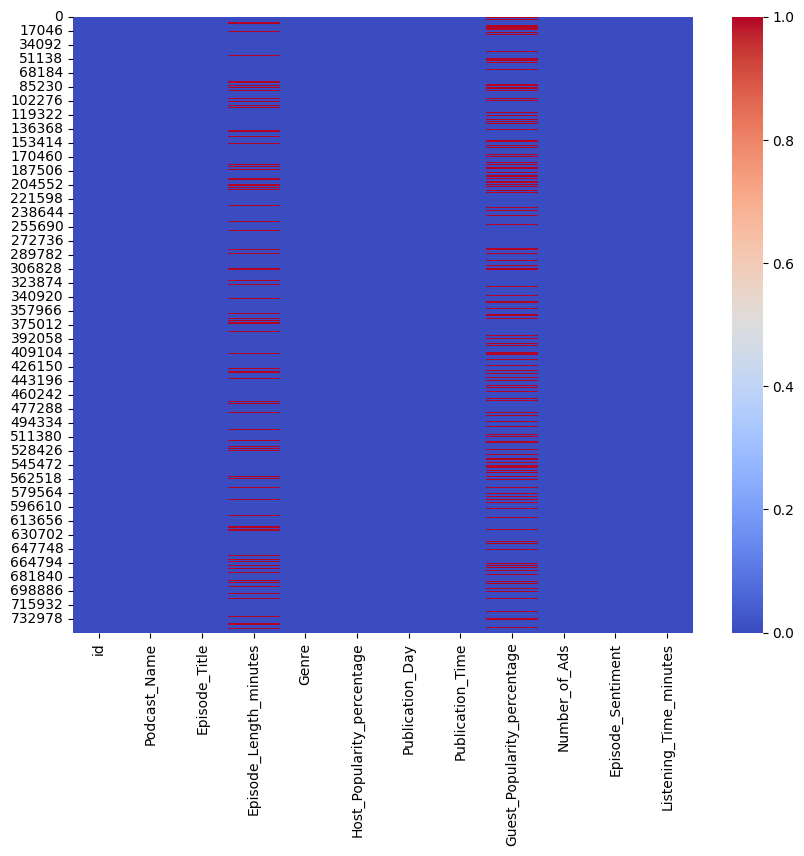

In [10]:
plt.figure(figsize = (10,8))
sns.heatmap(df.isnull(), cmap = 'coolwarm')
plt.show()

In [11]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Conclusion
We cannot ignore the percentage of guest popularity and the Episode length in minutes.

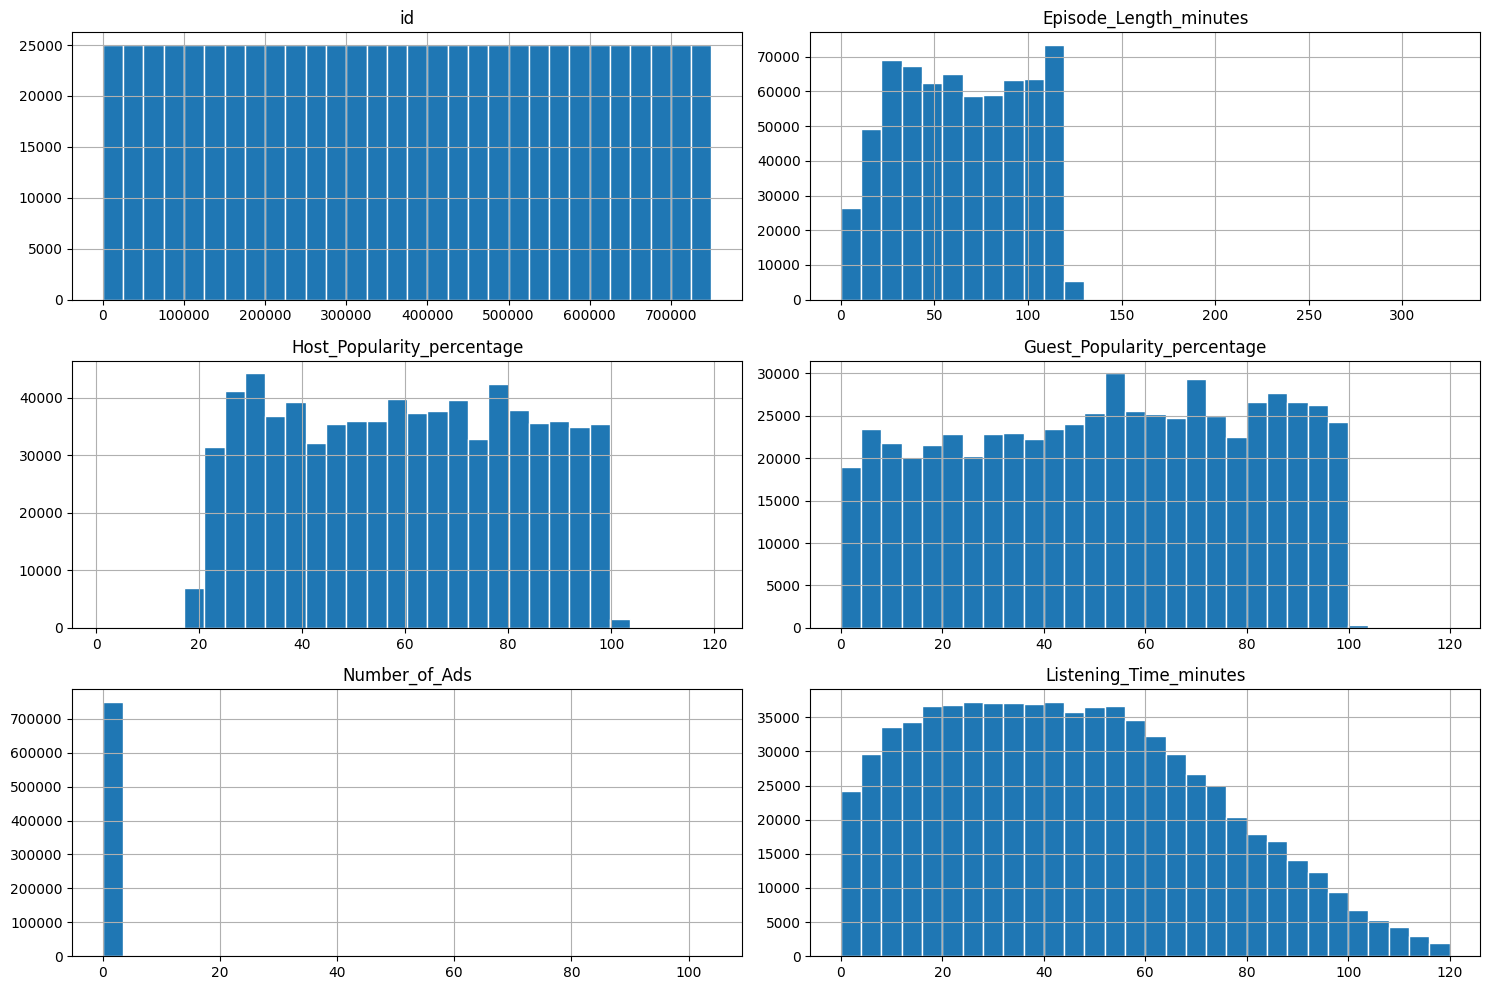

In [12]:
df.select_dtypes(include=['number']).hist(figsize=(15, 10), bins=30, edgecolor = "white")
plt.tight_layout()
plt.show()

# Data preperation

In [13]:
new_df = df.copy()

In [14]:
new_df.shape

(750000, 12)

In [15]:
new_df.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [16]:
new_df = new_df.set_index("id")

In [17]:
test_df = test_df.set_index("id")

In [18]:
test_df.isnull().sum()

Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [19]:
new_df.isnull().sum()

Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [20]:
test_df.isnull().sum()

Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [21]:
categorical_cols

['Podcast_Name',
 'Episode_Title',
 'Genre',
 'Publication_Day',
 'Publication_Time',
 'Episode_Sentiment']

In [22]:
categorical_cols_test = test_df.select_dtypes(include=['object', 'category']).columns.tolist()

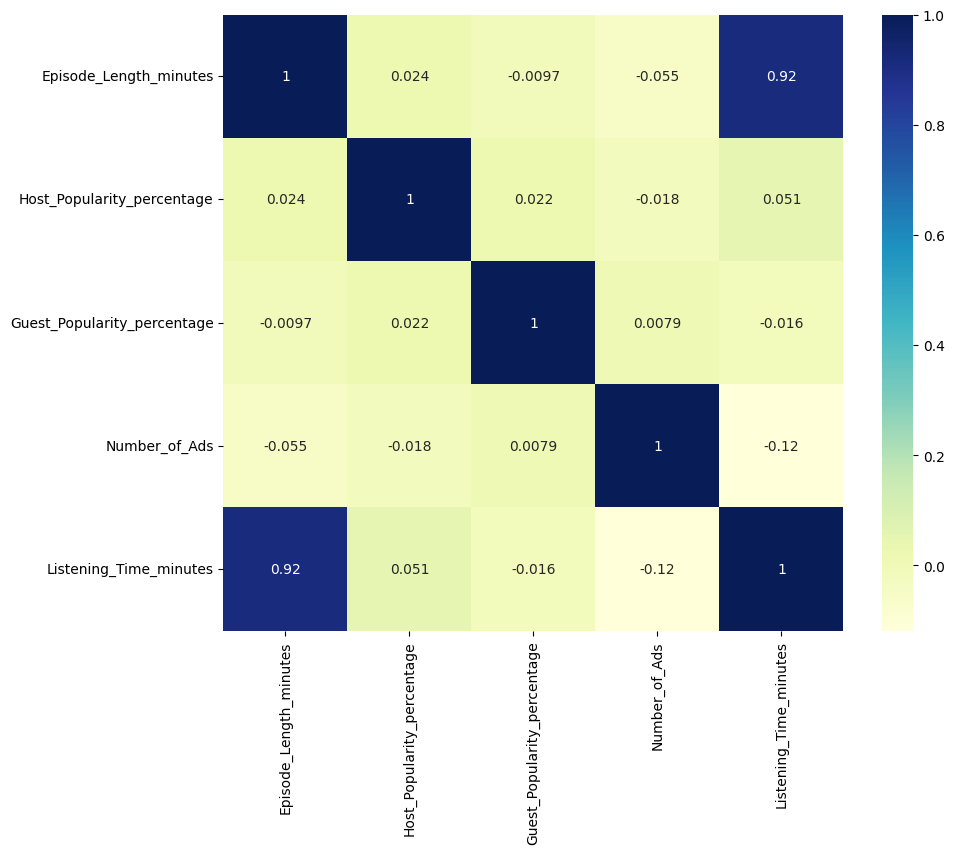

In [23]:
plt.figure(figsize = (10,8))
sns.heatmap(new_df.drop(categorical_cols, axis = 1).corr(), annot = True, cmap = 'YlGnBu')
plt.show()

# Let's convert categorical variables to useful inputs
* We will be using the Word2Vec values for the same

In [24]:
new_df.Podcast_Name

id
0          Mystery Matters
1            Joke Junction
2           Study Sessions
3           Digital Digest
4              Mind & Body
                ...       
749995        Learning Lab
749996     Business Briefs
749997    Lifestyle Lounge
749998         Style Guide
749999      Sports Central
Name: Podcast_Name, Length: 750000, dtype: object

In [25]:
l = new_df.Episode_Title.astype(str).apply(lambda x:x.split())
l = [int(x[1]) for x in l]
# for i in l:
#     if i[0]!="Episode":
#         print(i)

In [26]:
new_df["Episode_Title"] = l

In [27]:
l = test_df.Episode_Title.astype(str).apply(lambda x:x.split())
l = [int(x[1]) for x in l]
test_df["Episode_Title"] = l

In [28]:
categorical_cols = new_df.select_dtypes(include=['object', 'category']).columns.tolist()

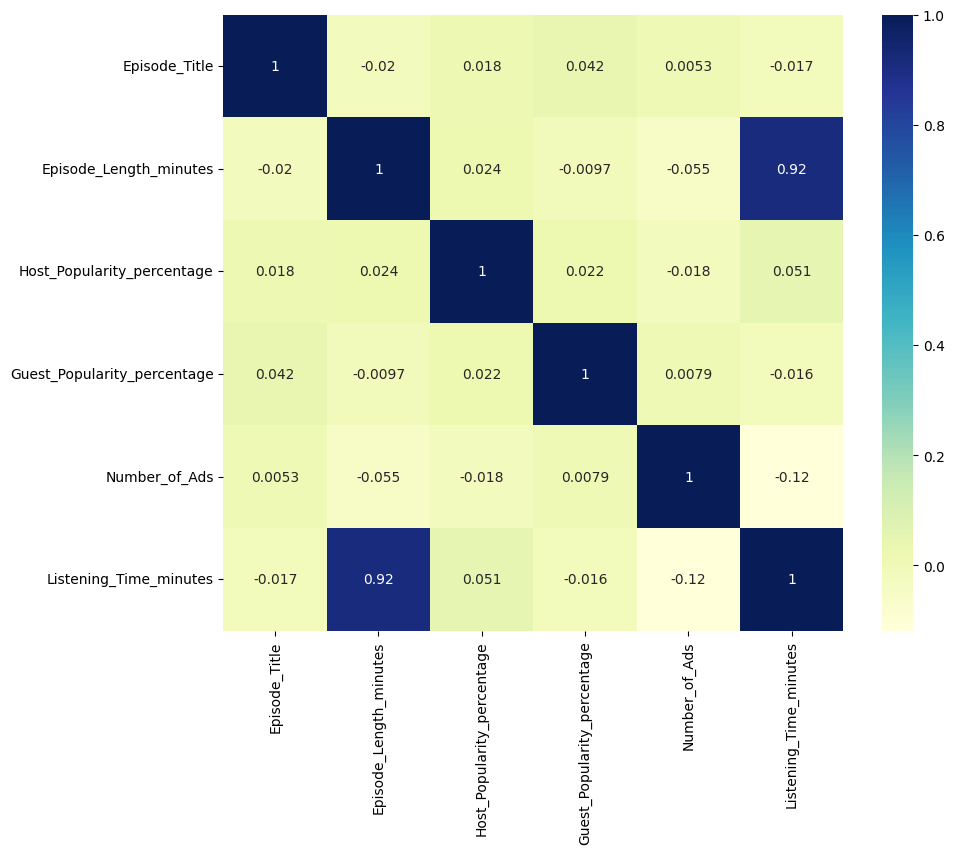

In [29]:
plt.figure(figsize = (10,8))
sns.heatmap(new_df.drop(categorical_cols, axis = 1).corr(), annot = True, cmap = 'YlGnBu')
plt.show()

In [30]:
categorical_cols

['Podcast_Name',
 'Genre',
 'Publication_Day',
 'Publication_Time',
 'Episode_Sentiment']

In [31]:
new_df[categorical_cols].nunique()

Podcast_Name         48
Genre                10
Publication_Day       7
Publication_Time      4
Episode_Sentiment     3
dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [33]:
new_df.Genre = le.fit_transform(new_df.Genre)
test_df.Genre = le.transform(test_df.Genre)

In [34]:
new_df.Publication_Day = le.fit_transform(new_df.Publication_Day)
test_df.Publication_Day = le.transform(test_df.Publication_Day)
new_df.Publication_Time = le.fit_transform(new_df.Publication_Time)
test_df.Publication_Time = le.transform(test_df.Publication_Time)
new_df.Episode_Sentiment = le.fit_transform(new_df.Episode_Sentiment)
test_df.Episode_Sentiment = le.transform(test_df.Episode_Sentiment)

In [35]:
categorical_cols = new_df.select_dtypes(include=['object', 'category']).columns.tolist()

In [36]:
categorical_cols_test = test_df.select_dtypes(include=['object', 'category']).columns.tolist()

In [37]:
categorical_cols

['Podcast_Name']

In [38]:
categorical_cols_test

['Podcast_Name']

## Major task is to transform the text into vectors for the podcast name
> We can use BERT since it is capable of understanding the context of the podcast name based on which the listening time will be decided. We can use the light weight model for the same. But here we will be using the word2vec model for text to vector convertor. For feature reduction we will later use the PCA technique if necessary. 

In [39]:
new_df['combined_text'] = new_df[categorical_cols].astype(str).agg(' '.join, axis=1)

In [40]:
test_df['combined_text'] = test_df[categorical_cols_test].astype(str).agg(' '.join, axis=1)

In [41]:
test_df.shape

(250000, 11)

In [42]:
new_df["combined_text"].head()

id
0    Mystery Matters
1      Joke Junction
2     Study Sessions
3     Digital Digest
4        Mind & Body
Name: combined_text, dtype: object

In [43]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [44]:
test_df.isnull().sum()

Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
combined_text                      0
dtype: int64

In [45]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [46]:
from nltk.tokenize import word_tokenize
import nltk
# nltk.download('punkt')
new_df["tokens"] = new_df["combined_text"].apply(lambda x:word_tokenize(x))
test_df["tokens"] = test_df["combined_text"].apply(lambda x:word_tokenize(x))

In [47]:
test_df["tokens"].shape

(250000,)

In [48]:
from gensim.models import Word2Vec
l = new_df['tokens']
model = Word2Vec(sentences=l, vector_size=100, window=5, min_count=1)
def get_average_vector(tokens, model, vector_size):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)


In [49]:
vector_size = 100
new_df_embeddings = new_df['tokens'].apply(lambda x: get_average_vector(x, model, vector_size))
test_df_embeddings = test_df['tokens'].apply(lambda x: get_average_vector(x, model, vector_size))

In [50]:
test_df.Podcast_Name

id
750000    Educational Nuggets
750001            Sound Waves
750002          Joke Junction
750003          Comedy Corner
750004           Life Lessons
                 ...         
999995            Mind & Body
999996          Joke Junction
999997          Joke Junction
999998         Market Masters
999999            Brain Boost
Name: Podcast_Name, Length: 250000, dtype: object

In [51]:
test_df_embeddings.shape

(250000,)

In [52]:
test_df.isnull().sum()

Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
combined_text                      0
tokens                             0
dtype: int64

In [53]:
new_df_embeddings.head()

id
0    [-0.15788989, 0.38070524, 0.17079201, 0.194076...
1    [0.11739544, -0.20162606, -0.21465102, -0.1102...
2    [-0.34903395, 0.620079, 0.25430673, -0.4243382...
3    [-0.2563563, -0.12552646, -0.16951239, -0.6521...
4    [0.21795617, -0.019710809, 0.33683124, -0.6642...
Name: tokens, dtype: object

In [54]:
count = sum(np.array_equal(vec, np.zeros(100)) for vec in test_df_embeddings)

In [55]:
count

0

In [56]:
from sklearn.decomposition import PCA
X = np.stack(new_df_embeddings.values)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [57]:
X_test = np.stack(test_df_embeddings.values)
X_test_pca = pca.transform(X_test)

In [58]:
new_df = pd.concat([new_df.reset_index(drop = True), pd.DataFrame(X_pca, columns = ["pca_1","pca_2","pca_3"]).reset_index(drop = True)], axis = 1)

In [59]:
test_df.isnull().sum()

Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
combined_text                      0
tokens                             0
dtype: int64

In [60]:
X_test_pca_df = pd.DataFrame(X_test_pca, columns = ["pca_1","pca_2","pca_3"]).reset_index(drop = True)

In [61]:
X_test_pca_df.head()

pca_1     pca_2     pca_3
0 -0.098454 -0.106861 -0.085756
1 -0.363460  0.100740 -0.263704
2 -0.400928 -0.295026 -0.075543
3 -0.365308  0.092472 -0.326250
4 -0.205815 -0.439751  0.250835

In [62]:
test_df = pd.concat([test_df.reset_index(drop = True), X_test_pca_df], axis = 1)

In [63]:
test_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Podcast_Name  Episode_Title  Episode_Length_minutes  Genre  \
0  Educational Nuggets             73                   78.96      2   
1          Sound Waves             23                   27.87      5   
2        Joke Junction             11                   69.10      1   
3        Comedy Corner             73                  115.39      1   
4         Life Lessons             50                   72.32      4   

   Host_Popularity_percentage  Publication_Day  Publication_Time  \
0                       38.11                2                 1   
1                       71.29                3                 2   
2                       67.89                0                 1   
3                       23.40                3                 2   
4                       58.10                6                 2   

   Guest_Popularity_percentage  Number_of_Ads  Episode_Sentiment  \
0                        53.33            1.0                  1   
1                          NaN            0.0                  1   
2                        97.51            0.0                  2   
3                        51.75            2.0                  2   
4                        11.30            2.0                  1   

         combined_text                  tokens     pca_1     pca_2     pca_3  
0  Educational Nuggets  [Educational, Nuggets] -0.098454 -0.106861 -0.085756  
1          Sound Waves          [Sound, Waves] -0.363460  0.100740 -0.263704  
2        Joke Junction        [Joke, Junction] -0.400928 -0.295026 -0.075543  
3        Comedy Corner        [Comedy, Corner] -0.365308  0.092472 -0.326250  
4         Life Lessons         [Life, Lessons] -0.205815 -0.439751  0.250835

In [64]:
test_df.isnull().sum()

Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
combined_text                      0
tokens                             0
pca_1                              0
pca_2                              0
pca_3                              0
dtype: int64

In [65]:
Train_df = new_df[['Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes','pca_1', 'pca_2', 'pca_3']]

In [66]:
# Train_df.head()

In [67]:
Test_df = test_df[['Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment','pca_1', 'pca_2', 'pca_3']]

In [68]:
Train_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Episode_Title  Episode_Length_minutes  Genre  Host_Popularity_percentage  \
0             98                     NaN      9                       74.81   
1             26                  119.80      1                       66.95   
2             16                   73.90      2                       69.97   
3             45                   67.17      8                       57.22   
4             86                  110.51      3                       80.07   

   Publication_Day  Publication_Time  Guest_Popularity_percentage  \
0                4                 3                          NaN   
1                2                 0                        75.95   
2                5                 1                         8.97   
3                1                 2                        78.70   
4                1                 0                        58.68   

   Number_of_Ads  Episode_Sentiment  Listening_Time_minutes     pca_1  \
0            0.0                  2                31.41998 -0.162154   
1            2.0                  0                88.01241 -0.400940   
2            0.0                  0                44.92531 -0.397785   
3            2.0                  2                46.27824  0.058692   
4            3.0                  1                75.61031  4.639830   

      pca_2     pca_3  
0 -0.027850 -0.132935  
1 -0.294816 -0.091352  
2 -0.225742 -0.685209  
3 -0.105507  0.145154  
4  0.060744  0.160789

In [69]:
Test_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Episode_Title  Episode_Length_minutes  Genre  Host_Popularity_percentage  \
0             73                   78.96      2                       38.11   
1             23                   27.87      5                       71.29   
2             11                   69.10      1                       67.89   
3             73                  115.39      1                       23.40   
4             50                   72.32      4                       58.10   

   Publication_Day  Publication_Time  Guest_Popularity_percentage  \
0                2                 1                        53.33   
1                3                 2                          NaN   
2                0                 1                        97.51   
3                3                 2                        51.75   
4                6                 2                        11.30   

   Number_of_Ads  Episode_Sentiment     pca_1     pca_2     pca_3  
0            1.0                  1 -0.098454 -0.106861 -0.085756  
1            0.0                  1 -0.363460  0.100740 -0.263704  
2            0.0                  2 -0.400928 -0.295026 -0.075543  
3            2.0                  2 -0.365308  0.092472 -0.326250  
4            2.0                  1 -0.205815 -0.439751  0.250835

In [70]:
Test_df = Test_df.dropna()

In [71]:
Test_df.shape

(179834, 12)

We can try using the TF-IDF vectorizer. But it is non contextual and will train the model based on a specific dataset

In [72]:
def vectorize_cat_value(df, cat_value):
    new_df = df.copy()
    new_df[cat_value] = new_df[cat_value].astype(str)
    vectorizer = TfidfVectorizer(stop_words='english', token_pattern=r'\b\w+\b')
    tfidf_matrix = vectorizer.fit_transform(pd.Series(new_df[cat_value]))
    # print("Get feature names : ", vectorizer.get_feature_names_out())
    # print(tfidf_matrix.toarray().transpose())
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    new_df = new_df.drop(columns=cat_value, axis = 1)
    new_df = pd.concat([new_df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)
    return new_df
    

# What we have done so far ?
1. Converted the podcast name into word 2 vec values and then done PCA.
2. Converted episode title in numbers using the episode numbers.
3. Converted podcast other categorical variables to label encoded values.

# Let's do some model training and validation

In [73]:
from sklearn.model_selection import train_test_split
TARGET = 'Listening_Time_minutes'

In [74]:
Train_df_dmat = xgb.DMatrix(Train_df.drop(TARGET, axis = 1))
Train_df_dropped = Train_df.fillna(0)
Test_df_dmat = xgb.DMatrix(Test_df)
Test_df_dropped = Test_df.fillna(0)

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()

In [76]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(n_estimator = 100)

In [77]:
X = Train_df_dmat
y = Train_df[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X.get_data(), y, test_size=0.2, random_state=42)

In [78]:
lr.fit(X_train, y_train)
print(np.sqrt(mean_squared_error(lr.predict(X_test),y_test)))

18.130445510388373


In [79]:
xgb_reg.fit(X_train, y_train)
print(np.sqrt(mean_squared_error(xgb_reg.predict(X_test),y_test)))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:31:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


12.992199570192314


# Interpretation
> Now that we have the RMSE score about 13.. we will be using couple of techniques to reduce the same.
> 1. Analyse the data and standardize scalar if required.
> 2. Check for the correct dimension of the PCA value.
> 3. GridSearchCV for hyperparameter tuning.

In [80]:
Train_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Episode_Title  Episode_Length_minutes  Genre  Host_Popularity_percentage  \
0             98                     NaN      9                       74.81   
1             26                  119.80      1                       66.95   
2             16                   73.90      2                       69.97   
3             45                   67.17      8                       57.22   
4             86                  110.51      3                       80.07   

   Publication_Day  Publication_Time  Guest_Popularity_percentage  \
0                4                 3                          NaN   
1                2                 0                        75.95   
2                5                 1                         8.97   
3                1                 2                        78.70   
4                1                 0                        58.68   

   Number_of_Ads  Episode_Sentiment  Listening_Time_minutes     pca_1  \
0            0.0                  2                31.41998 -0.162154   
1            2.0                  0                88.01241 -0.400940   
2            0.0                  0                44.92531 -0.397785   
3            2.0                  2                46.27824  0.058692   
4            3.0                  1                75.61031  4.639830   

      pca_2     pca_3  
0 -0.027850 -0.132935  
1 -0.294816 -0.091352  
2 -0.225742 -0.685209  
3 -0.105507  0.145154  
4  0.060744  0.160789

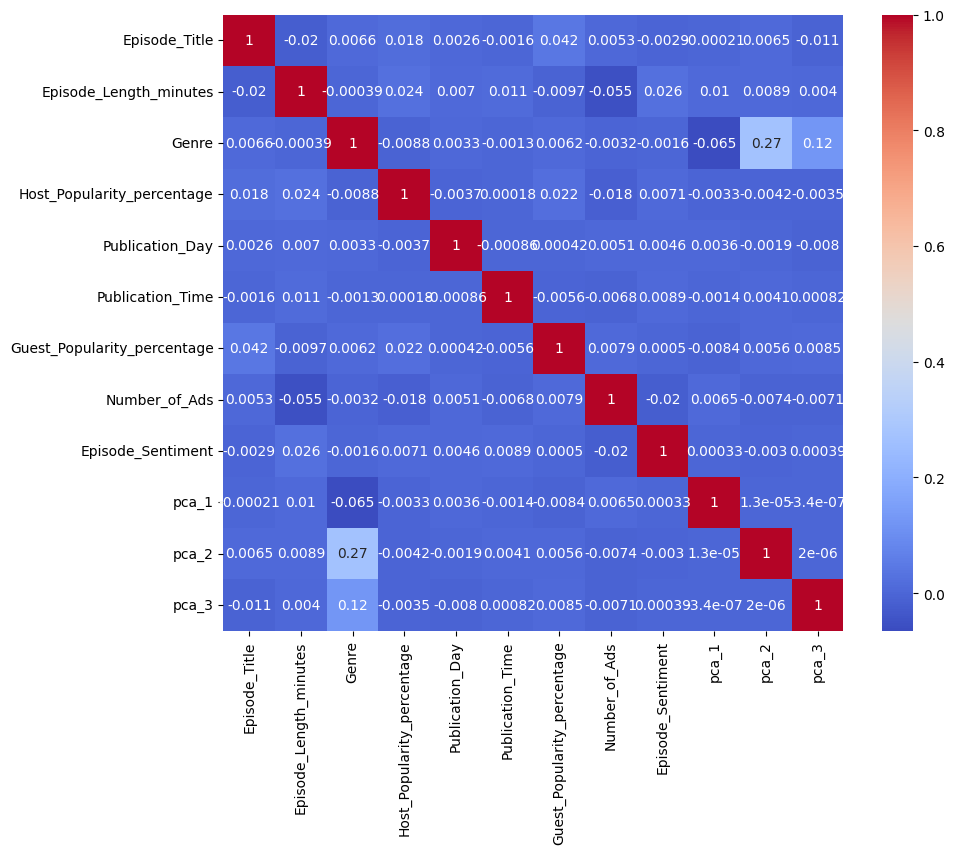

In [81]:
plt.figure(figsize = (10,8))
sns.heatmap(Train_df.drop(TARGET,axis = 1).corr(),annot = True, cmap = 'coolwarm')
plt.show()

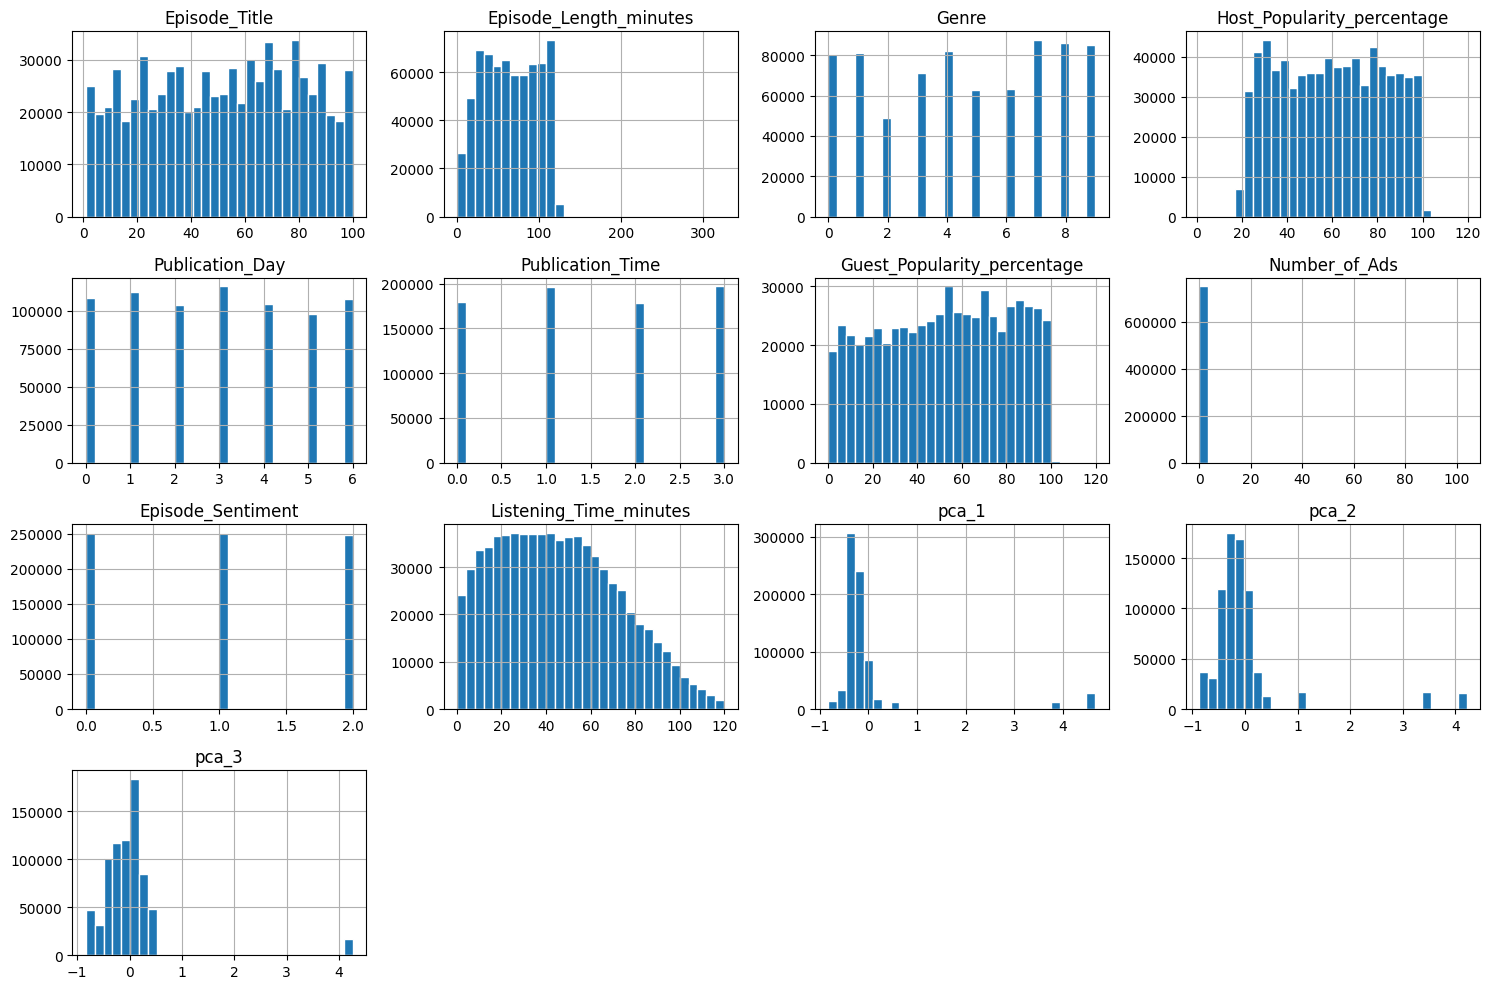

In [82]:
Train_df.hist(figsize=(15, 10), bins=30, edgecolor = "white")
plt.tight_layout()
plt.show()

**Let's standardize the Episode Length, PCA_1, PCA_2 and PCA_3 and feed in the Linear regression**

In [83]:
Train_df_standardized = Train_df_dropped.copy()

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
standardScalar = StandardScaler()

Train_df_standardized[["Episode_Length_minutes","pca_1","pca_2","pca_3"]] = standardScalar.fit_transform(Train_df[["Episode_Length_minutes","pca_1","pca_2","pca_3"]])

In [86]:
for col in ["Episode_Length_minutes", "pca_1", "pca_2", "pca_3"]:
    mean = np.mean(Train_df_standardized[col])
    std = np.std(Train_df_standardized[col])
    print(f"{col}: mean = {mean:.6f}, std = {std:.6f}")

Episode_Length_minutes: mean = 0.000000, std = 1.000000
pca_1: mean = 0.000000, std = 1.000000
pca_2: mean = 0.000000, std = 1.000000
pca_3: mean = 0.000000, std = 1.000000


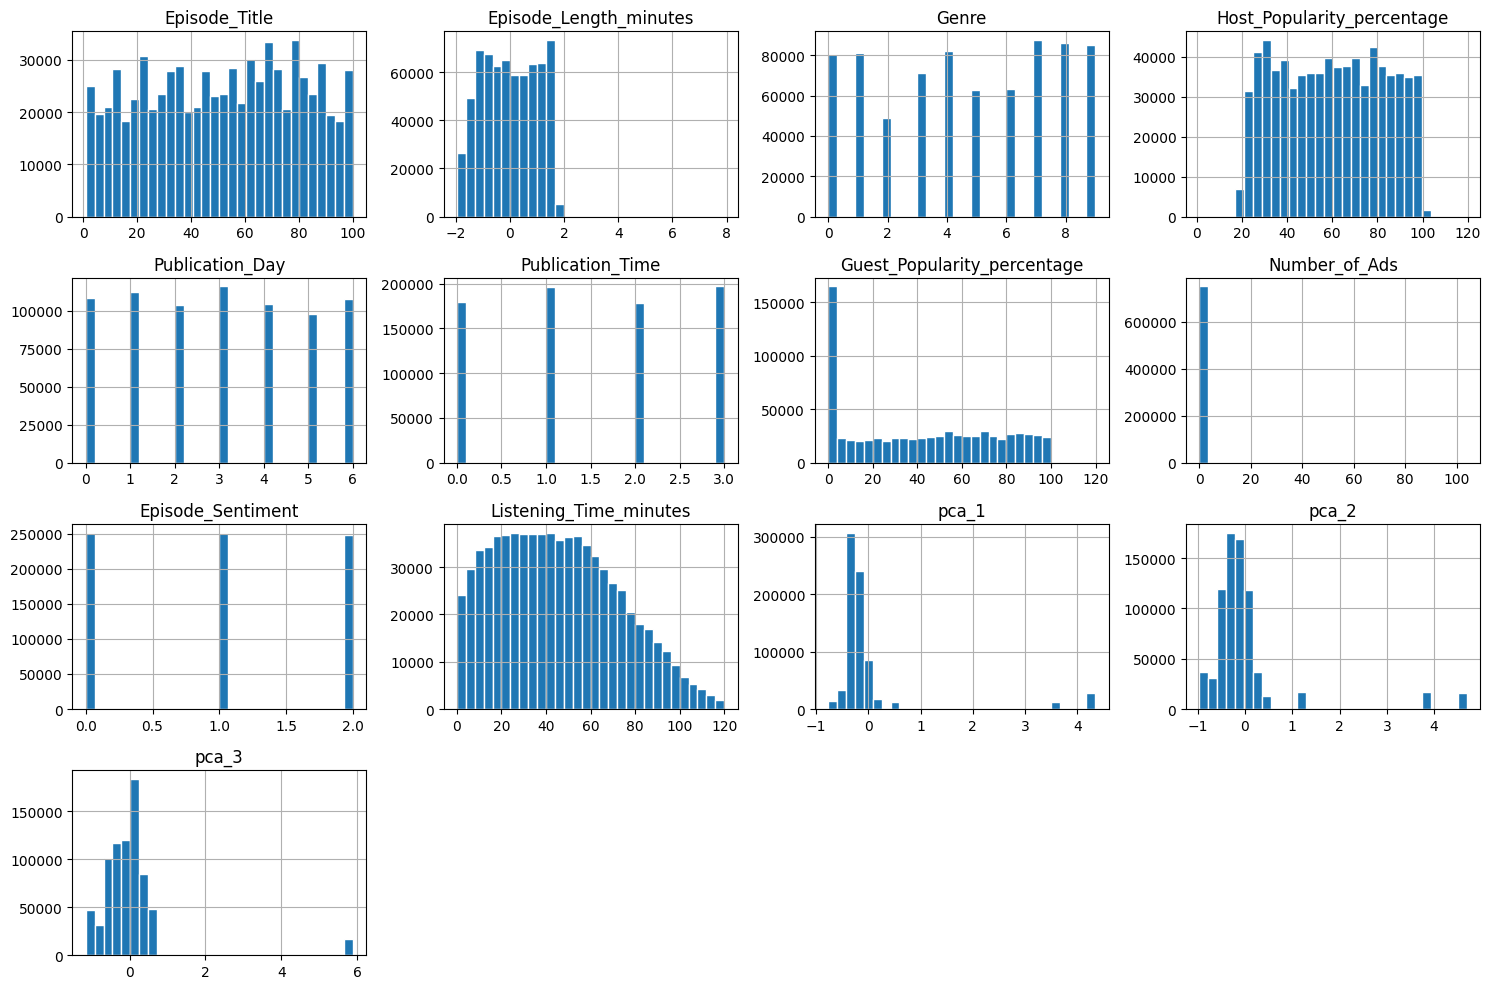

In [87]:
Train_df_standardized.hist(figsize=(15, 10), bins=30, edgecolor = "white")
plt.tight_layout()
plt.show()

In [88]:
X = Train_df_standardized.drop(TARGET, axis = 1)
y = Train_df_standardized[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Conclusion
> There is no much difference after standardization. Now let's get back to the PCA part for finding the optimal value of the PCA dimension

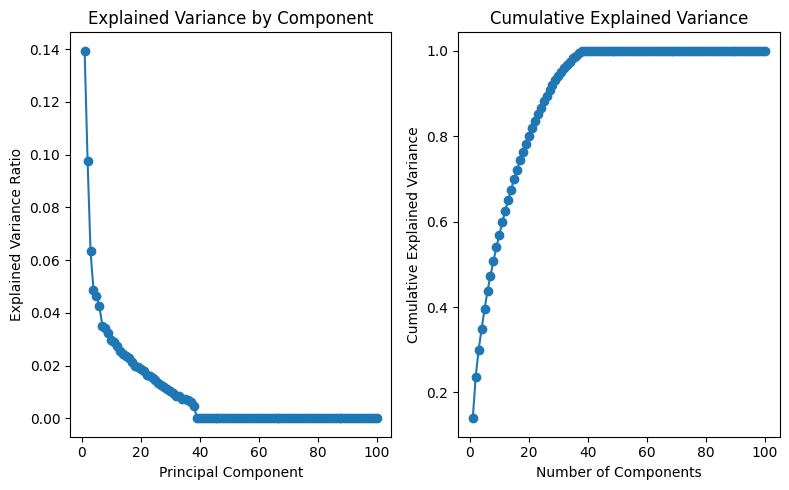

Optimal number of components to retain 95% variance: 31


In [89]:
X = np.stack(new_df_embeddings.values)
pca = PCA()
pca.fit(X)

# Calculate the explained variance ratio and cumulative variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance and cumulative variance
plt.figure(figsize=(8, 5))

# Explained variance plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Explained Variance by Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

# Cumulative variance plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

# Find the optimal number of components that explain at least 95% of the variance
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components to retain 95% variance: {optimal_components}")

In [90]:
X = Train_df_standardized.drop(TARGET, axis = 1)
y = Train_df_standardized[TARGET]

In [91]:
# from sklearn.model_selection import cross_val_score
# from sklearn.pipeline import Pipeline

# best_rmse = float("inf")
# best_k = None
# xgb_reg = xgb.XGBRegressor(n_estimators = 100)
# for k in range(1, 6):  # try top 1 to 3 components
#     pipeline = Pipeline([
#         ('pca', PCA(n_components=k)),
#         ('model', xgb_reg)  # or your model
#     ])
#     scores = cross_val_score(pipeline, X, y, scoring='neg_root_mean_squared_error', cv=5)
#     mean_rmse = -scores.mean()

#     if mean_rmse < best_rmse:
#         best_rmse = mean_rmse
#         best_k = k

# print(f"Best RMSE: {best_rmse:.4f} with {best_k} PCA components")

In [92]:
X = np.stack(new_df_embeddings.values)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [93]:
pca_cols = [f'pca_{i+1}' for i in range(X_pca.shape[1])]

In [94]:
new_df = new_df.drop(["pca_1","pca_2","pca_3"],axis = 1)

In [95]:
new_df = pd.concat([new_df.reset_index(drop = True), pd.DataFrame(X_pca, columns = pca_cols).reset_index(drop = True)], axis = 1)

In [96]:
X_test = np.stack(test_df_embeddings.values)
X_test_pca = pca.transform(X_test)

In [97]:
test_df = test_df.drop(["pca_1","pca_2","pca_3"],axis = 1)

In [98]:
test_df = pd.concat([test_df.reset_index(drop = True), pd.DataFrame(X_test_pca, columns = pca_cols).reset_index(drop = True)], axis = 1)

In [99]:
test_df.columns

Index(['Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment',
       'combined_text', 'tokens', 'pca_1', 'pca_2', 'pca_3'],
      dtype='object')

In [100]:
Train_df = new_df[['Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes']+pca_cols]

In [101]:
Test_df = test_df[['Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment']+pca_cols]

In [102]:
Train_df.isna().sum()

Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
pca_1                               0
pca_2                               0
pca_3                               0
dtype: int64

In [103]:
Train_df_dmat = xgb.DMatrix(Train_df.drop(TARGET, axis = 1))
# Train_df_dropped = Train_df.fillna(0)
Test_df_dmat = xgb.DMatrix(Test_df)
# Test_df_dropped = Test_df.fillna(0)

In [104]:
X = Train_df_dmat
y = Train_df[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X.get_data(), y, test_size=0.2, random_state=42)

## Hyperparameter tuning

In [105]:
xgb_reg = xgb.XGBRegressor(n_estimators = 100)
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [106]:
print(np.sqrt(mean_squared_error(xgb_reg.predict(X_test),y_test)))

12.99475872338986


In [107]:
# from xgboost import XGBRegressor
# pipeline = Pipeline([
#     ('pca', PCA()),
#     ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42, device = "cuda"))
# ])

In [108]:
from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'xgb__n_estimators': [100, 200],
#     'xgb__max_depth': [3, 5, 7],
#     'xgb__learning_rate': [0.01],
#     'xgb__subsample': [0.8, 1.0],
#     'xgb__colsample_bytree': [0.8, 1.0]
# }

# # Grid search with 5-fold cross-validation
# grid_search = GridSearchCV(
#     pipeline,
#     param_grid,
#     scoring='neg_root_mean_squared_error',  # RMSE scoring
#     cv=5,
#     verbose=1,
#     n_jobs=-1
# )

# # Fit the model
# grid_search.fit(X, y)

# # Best parameters and RMSE
# print("Best parameters:")
# print(grid_search.best_params_)
# print(f"Best RMSE: {-grid_search.best_score_:.4f}")

In [109]:
# from sklearn.metrics import make_scorer

In [110]:
# def rmse(y_true, y_pred):
#     return np.sqrt(mean_squared_error(y_true, y_pred))

In [111]:
# rmse_scorer = make_scorer(rmse, greater_is_better=False)
# xgb_model = xgb.XGBRegressor(
#     objective='reg:squarederror',
#     eval_metric='rmse',
#     verbosity=1,
#     n_jobs=-1, 
#     device = "cuda"
# )

# # Smaller and more targeted parameter grid
# param_grid = {
#     'n_estimators': [100, 300],
#     'max_depth': [4, 6],
#     'learning_rate': [0.05, 0.1],
#     'subsample': [0.8],                  # Balanced value
#     'colsample_bytree': [0.8],           # Balanced value
#     'gamma': [0, 5],                     # Controls split regularization
#     'reg_alpha': [0, 1],                 # L1 regularization
#     'reg_lambda': [1, 10],               # L2 regularization
#     'min_child_weight': [5]              # Reduces overfitting
# }

# grid_search = GridSearchCV(
#     estimator=xgb_model,
#     param_grid=param_grid,
#     scoring=rmse_scorer,
#     cv=3,
#     verbose=0
# )

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Best parameters and RMSE
# print("Best parameters found: ", grid_search.best_params_)
# print("Best RMSE score: ", -grid_search.best_score_)


The GridSearchCV for the above XGBoost model gave the output as : 
> Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters:
{**'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 200, 'xgb__subsample': 0.8**}
**Best RMSE: 13.1411**

>Need to perform the hyperparameter tuning on DMatrix once again. 

In [112]:
xgb_reg = xgb.XGBRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 15, subsample = 0.8, colsample_bytree = 1)
xgb_reg.fit(X_train, y_train, eval_set = [(X_train,y_train),(X_test,y_test)], verbose = 100)

[0]	validation_0-rmse:25.04529	validation_1-rmse:25.09297
[99]	validation_0-rmse:6.76265	validation_1-rmse:12.86483


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [113]:
# fi = pd.DataFrame(data = xgb_reg.feature_importances_, index = xgb_reg.feature_names_in_, columns = ["importance"])

In [114]:
# fi.sort_values(by = "importance", ascending = False)

In [115]:
# pca = PCA(n_components = 9)
# X = Train_df.drop(TARGET, axis = 1).drop("Episode_Length_minutes",axis = 1)
# y = Train_df[TARGET]
# X_test = Test_df.copy()
# X_pca_new = pca.fit_transform(X.drop(["pca_1","pca_2"],axis = 1))
# Test_df_pca_new = pca.fit_transform(Test_df.drop("Episode_Length_minutes",axis = 1))

In [116]:
# pca_cols = [f'pca_{i+1}' for i in range(X_pca_new.shape[1])]

In [117]:
# Train_df_pca = pd.concat([pd.DataFrame(X_pca_new, columns = pca_cols), Train_df["Episode_Length_minutes"]], axis = 1)
# Test_df_pca = pd.concat([pd.DataFrame(Test_df_pca_new, columns = pca_cols), Test_df["Episode_Length_minutes"]], axis = 1)

In [118]:
# X = Train_df_pca
# y = Train_df[TARGET]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# xgb_reg = xgb.XGBRegressor(n_estimators = 100)
# xgb_reg.fit(X_train, y_train)
print(np.sqrt(mean_squared_error(xgb_reg.predict(X_test),y_test)))

12.864793007212024


In [120]:
# lr.fit(X_train, y_train)
# print(np.sqrt(mean_squared_error(lr.predict(X_test),y_test)))

# Let's do some data analysis.

> Let's check how many unique values are available for publication day with 7 unique values and publication time with 4 unique values.

In [121]:
Train_df[["Publication_Day","Publication_Time"]].drop_duplicates().shape[0]

28

> So each combination is available. Later we can combine these values and make one common value.
> Now, let's check if there is any correlation with the Genre

In [122]:
for i in Train_df.Genre.unique():
    t = Train_df[Train_df["Genre"]==i][["Publication_Day","Publication_Time"]].drop_duplicates().shape[0]
    print(f"Genre is : {i} for which number of unique combinations of publication day and time are : {t}")

Genre is : 9 for which number of unique combinations of publication day and time are : 28
Genre is : 1 for which number of unique combinations of publication day and time are : 28
Genre is : 2 for which number of unique combinations of publication day and time are : 28
Genre is : 8 for which number of unique combinations of publication day and time are : 28
Genre is : 3 for which number of unique combinations of publication day and time are : 28
Genre is : 6 for which number of unique combinations of publication day and time are : 28
Genre is : 5 for which number of unique combinations of publication day and time are : 28
Genre is : 7 for which number of unique combinations of publication day and time are : 28
Genre is : 0 for which number of unique combinations of publication day and time are : 28
Genre is : 4 for which number of unique combinations of publication day and time are : 28


In [123]:
Train_df['combo'] = df['Publication_Day'].astype(str) + '_' + df['Publication_Time'].astype(str)

# Step 2: Apply LabelEncoder
le = LabelEncoder()
Train_df['encoded'] = le.fit_transform(Train_df['combo'])

# Step 3: Create dictionary of encoded -> original combo
mapping_dict = dict(zip(Train_df['encoded'], Train_df['combo']))

print("\nMapping Dictionary:")
print(mapping_dict)

<ipython-input-123-5297f8c40607>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_df['combo'] = df['Publication_Day'].astype(str) + '_' + df['Publication_Time'].astype(str)
<ipython-input-123-5297f8c40607>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_df['encoded'] = le.fit_transform(Train_df['combo'])



Mapping Dictionary:
{19: 'Thursday_Night', 8: 'Saturday_Afternoon', 21: 'Tuesday_Evening', 6: 'Monday_Morning', 4: 'Monday_Afternoon', 15: 'Sunday_Night', 5: 'Monday_Evening', 17: 'Thursday_Evening', 10: 'Saturday_Morning', 24: 'Wednesday_Afternoon', 9: 'Saturday_Evening', 12: 'Sunday_Afternoon', 16: 'Thursday_Afternoon', 25: 'Wednesday_Evening', 11: 'Saturday_Night', 27: 'Wednesday_Night', 20: 'Tuesday_Afternoon', 23: 'Tuesday_Night', 2: 'Friday_Morning', 3: 'Friday_Night', 18: 'Thursday_Morning', 26: 'Wednesday_Morning', 13: 'Sunday_Evening', 7: 'Monday_Night', 1: 'Friday_Evening', 14: 'Sunday_Morning', 22: 'Tuesday_Morning', 0: 'Friday_Afternoon'}


In [124]:
Train_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Episode_Title  Episode_Length_minutes  Genre  Host_Popularity_percentage  \
0             98                     NaN      9                       74.81   
1             26                  119.80      1                       66.95   
2             16                   73.90      2                       69.97   
3             45                   67.17      8                       57.22   
4             86                  110.51      3                       80.07   

   Publication_Day  Publication_Time  Guest_Popularity_percentage  \
0                4                 3                          NaN   
1                2                 0                        75.95   
2                5                 1                         8.97   
3                1                 2                        78.70   
4                1                 0                        58.68   

   Number_of_Ads  Episode_Sentiment  Listening_Time_minutes     pca_1  \
0            0.0                  2                31.41998 -0.154180   
1            2.0                  0                88.01241 -0.400706   
2            0.0                  0                44.92531 -0.397791   
3            2.0                  2                46.27824  0.058707   
4            3.0                  1                75.61031  4.639424   

      pca_2     pca_3               combo  encoded  
0 -0.063719 -0.179820      Thursday_Night       19  
1 -0.296061 -0.073155  Saturday_Afternoon        8  
2 -0.225448 -0.682694     Tuesday_Evening       21  
3 -0.105457  0.144349      Monday_Morning        6  
4  0.061042  0.163497    Monday_Afternoon        4

In [125]:
Publication_time = {3:"Night", 0:"Afternoon", 1:"Evening", 2:"Morning"}

Publication_Day = {4:"Thursday",2:"Saturday", 5:"Tuesday", 1:"Monday", 3:"Sunday", 6:"Wednesday", 0:"Friday"}

In [126]:
g_pd_pt = (
    Train_df[Train_df["Genre"] == 0]
    .groupby(["Publication_Time"])
    .size()
    .reset_index(name = "count")
    .sort_values(by="count", ascending=False)
    .set_index("Publication_Time")
)

In [127]:
g_pd_pt

count
Publication_Time       
3                 21305
1                 20477
0                 19764
2                 18975

In [128]:
g_pd_pt = (
    Train_df[Train_df["Genre"] == 0]
    .groupby(["Publication_Day"])
    .size()
    .reset_index(name = "count")
    .sort_values(by="count", ascending=False)
    .set_index("Publication_Day")
)

In [129]:
g_pd_pt

count
Publication_Day       
1                12438
3                12364
0                11740
6                11645
2                11215
5                10847
4                10272

In [130]:
Train_df[Train_df["Genre"] == 0].shape

(80521, 15)

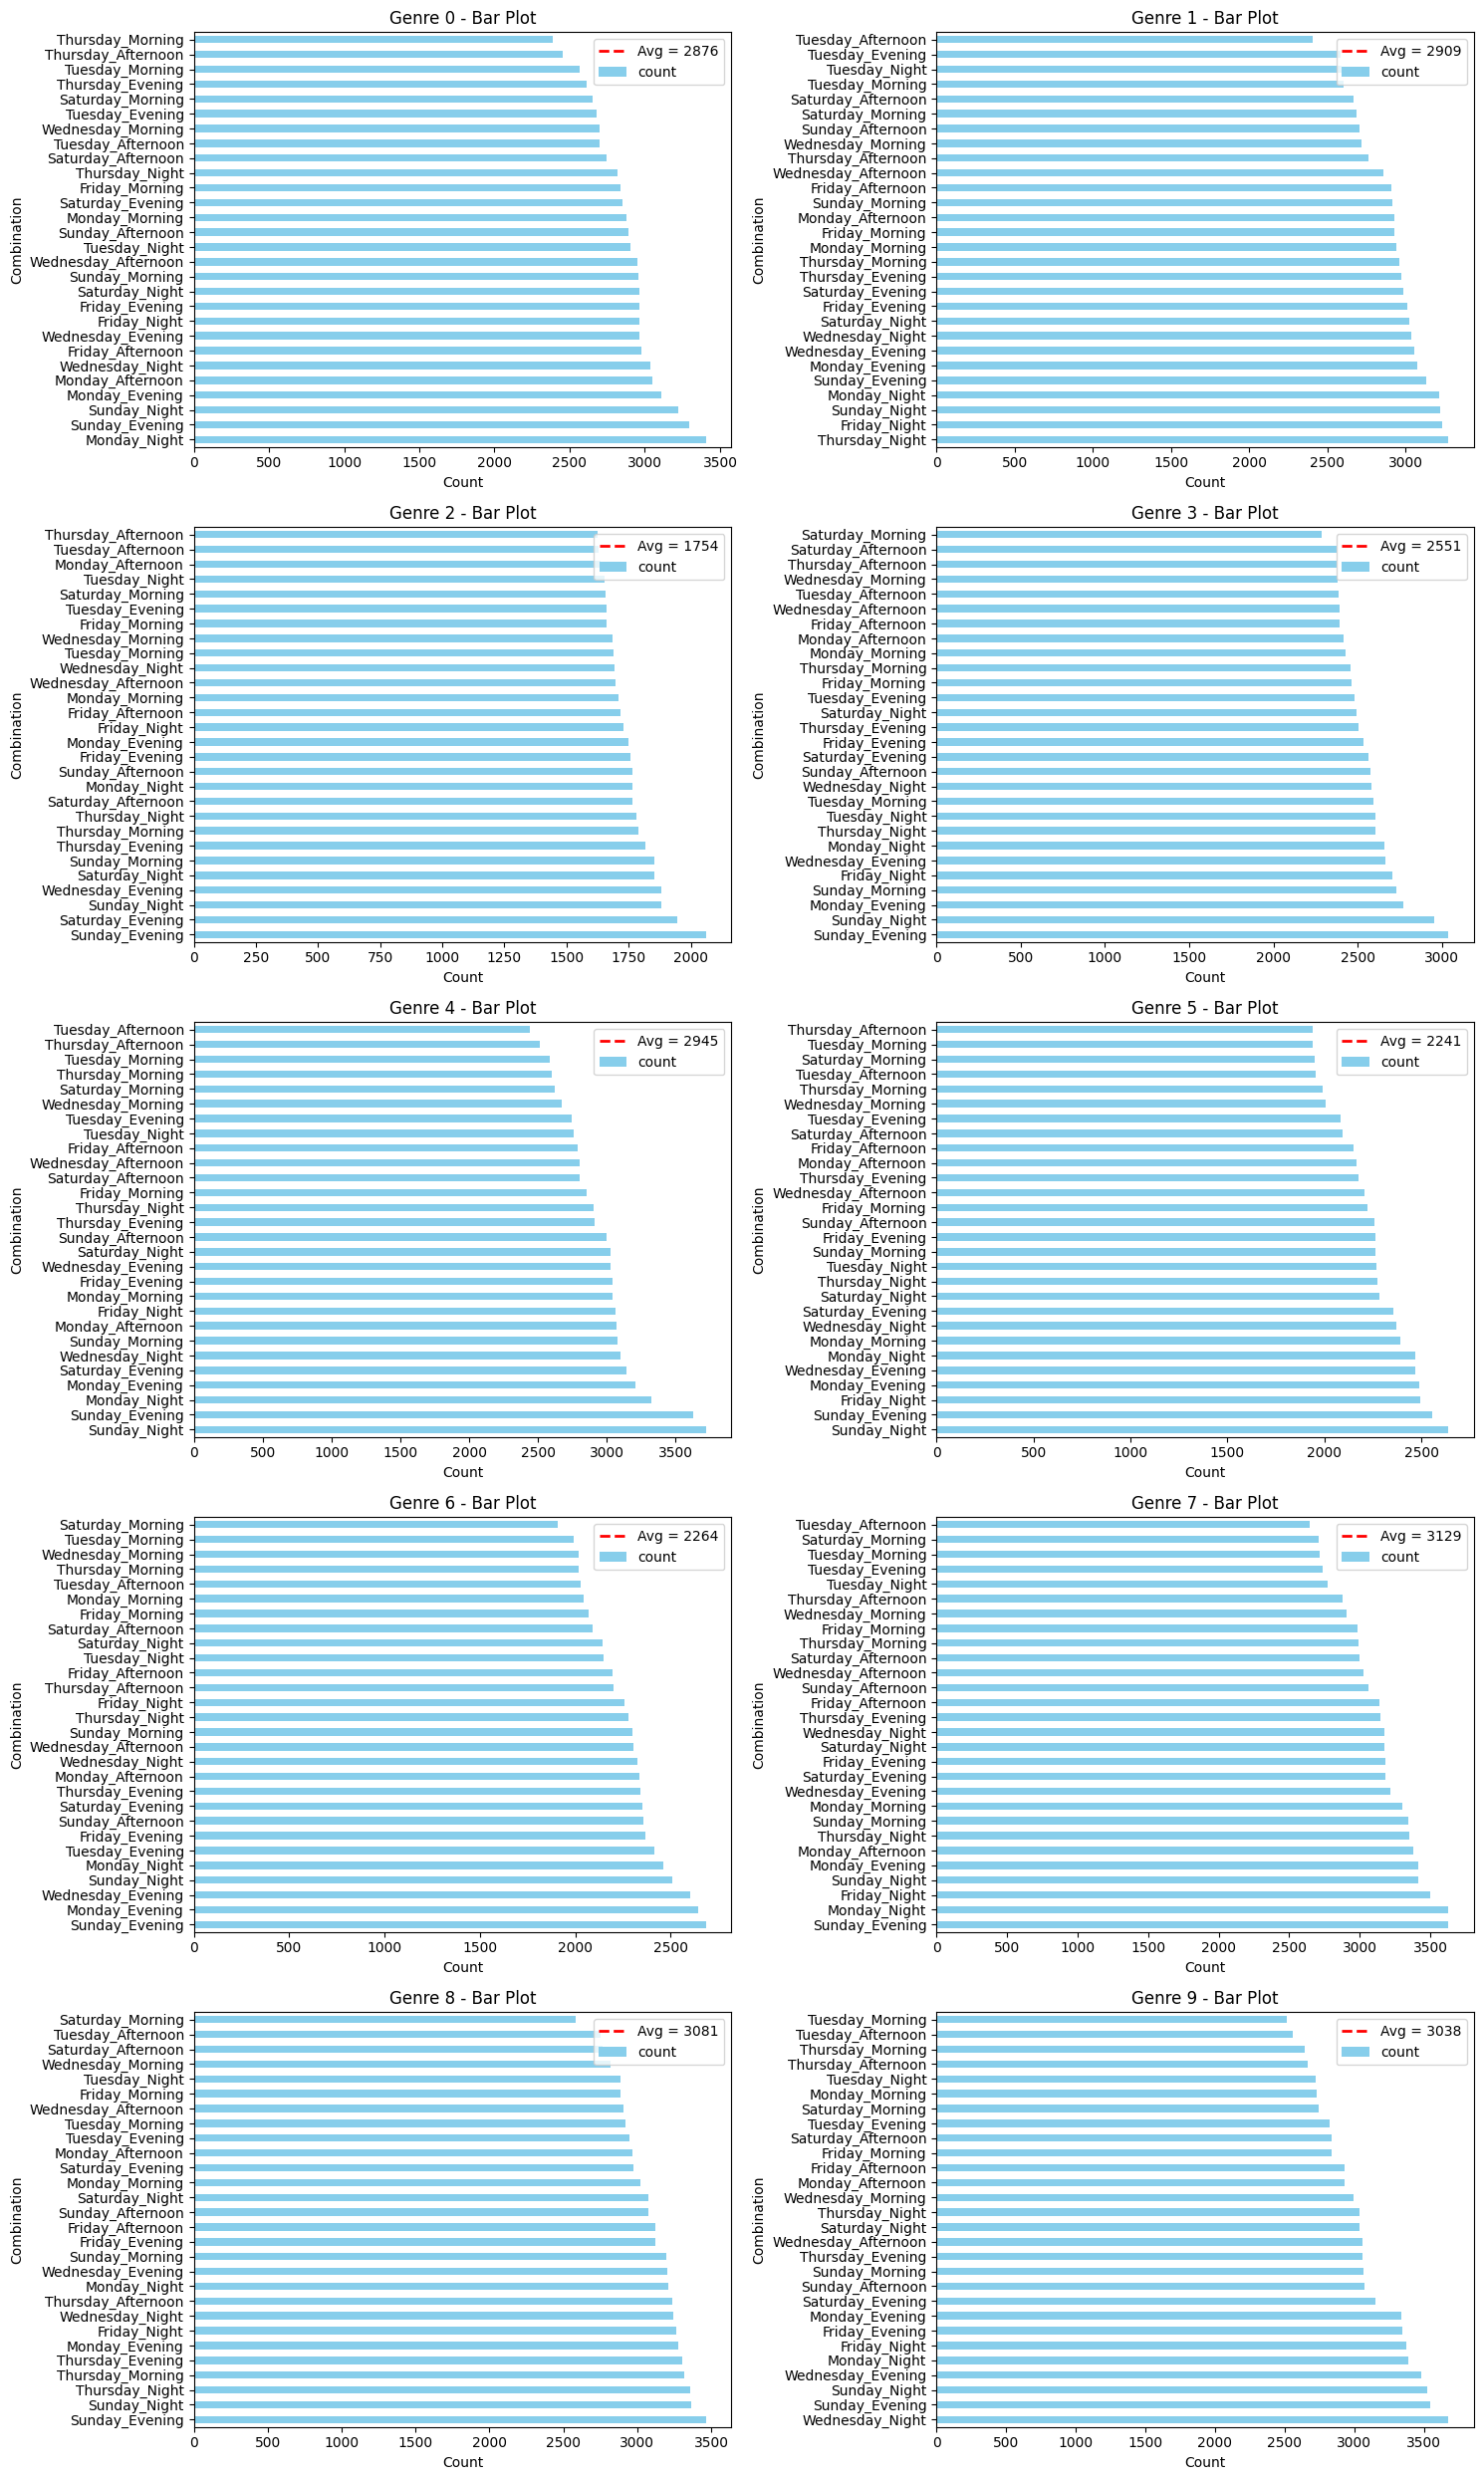

In [131]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))  # 10 plots: 5 rows, 2 columns
axes = axes.flatten()  # Flatten to 1D array for easy access

for i in range(10):
    ax = axes[i]
    
    g_pd_pt = (
        Train_df[Train_df["Genre"] == i]
        .groupby("combo")
        .size()
        .reset_index(name="count")
        .sort_values(by="count", ascending=False)
        .set_index("combo")
    )
    
    g_pd_pt.plot(kind="barh", ax=ax, legend=False, color="skyblue")
    
    avg_count = g_pd_pt["count"].mean()
    ax.axhline(y=avg_count, color='red', linestyle='--', linewidth=2, label=f'Avg = {avg_count:.0f}')
    
    ax.set_title(f"Genre {i} - Bar Plot")
    ax.set_xlabel("Count")
    ax.set_ylabel("Combination")
    ax.legend()

plt.tight_layout()
plt.show()

> Almost all of the podcasts are maximum consumed in the night or evening than in morning or afternoon.
> Let's add a value called is_peak_time base on this information and try to use the same.  

In [132]:
# Train_df["is_peak_time"] = Train_df["Publication_Time"].isin([1, 3]).astype(int)

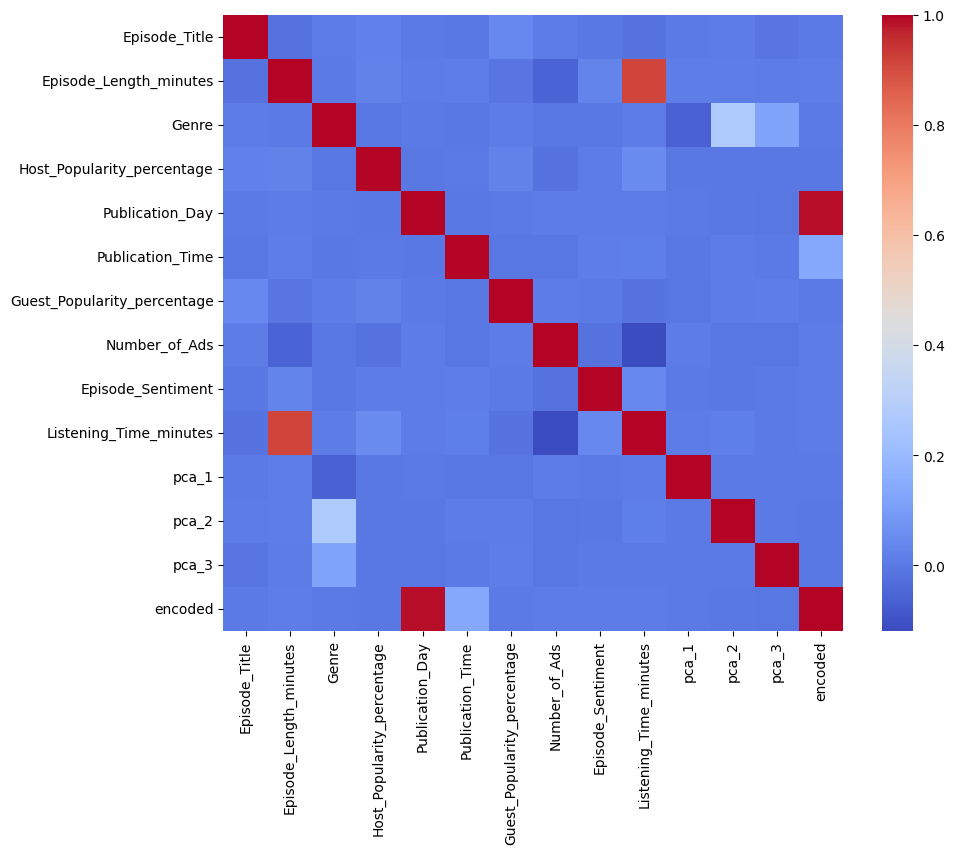

In [133]:
heatmap_of(Train_df.drop(["combo"],axis = 1).corr())

In [134]:
Train_df_new = Train_df.drop(["Publication_Day","combo"],axis = 1)

In [135]:
test_df_new = pd.read_csv("/kaggle/input/playground-series-s5e4/test.csv")

In [136]:
Test_df['combo'] = test_df_new['Publication_Day'].astype(str) + '_' + test_df_new['Publication_Time'].astype(str)

Test_df['encoded'] = le.transform(Test_df['combo'])

<ipython-input-136-f27ed65359ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_df['combo'] = test_df_new['Publication_Day'].astype(str) + '_' + test_df_new['Publication_Time'].astype(str)
<ipython-input-136-f27ed65359ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_df['encoded'] = le.transform(Test_df['combo'])


In [137]:
Test_df_new = Test_df.drop(["Publication_Day","combo"],axis = 1)

In [138]:
# Test_df_new["is_peak_time"] = Test_df["Publication_Time"].isin([1, 3]).astype(int)

In [139]:
Test_df_new.columns

Index(['Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment',
       'pca_1', 'pca_2', 'pca_3', 'encoded'],
      dtype='object')

In [140]:
Train_df_new.columns

Index(['Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment',
       'Listening_Time_minutes', 'pca_1', 'pca_2', 'pca_3', 'encoded'],
      dtype='object')

In [141]:
Train_df_new_dmat = xgb.DMatrix(Train_df_new.drop(TARGET,axis = 1))
Test_df_new_dmat = xgb.DMatrix(Test_df_new)

In [142]:
X = Train_df_new_dmat
y = Train_df_new[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X.get_data(), y, test_size=0.2, random_state=42)

In [143]:
lr.fit(X_train, y_train)

LinearRegression()

In [144]:
print(np.sqrt(mean_squared_error(lr.predict(X_test),y_test)))

18.130447575913006


In [145]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [146]:
print(np.sqrt(mean_squared_error(xgb_reg.predict(X_test),y_test)))

12.850559216371733


In [147]:
Train_df_new_wo_pca = Train_df_new.drop(["pca_1","pca_2","pca_3"],axis = 1)
Test_df_new_wo_pca = Test_df_new.drop(["pca_1","pca_2","pca_3"],axis = 1)

In [148]:
Train_df_new_wo_pca = pd.concat([Train_df_new_wo_pca, df["Podcast_Name"]], axis = 1)
Test_df_new_wo_pca = pd.concat([Test_df_new_wo_pca, test_df["Podcast_Name"]],axis = 1)

In [149]:
Train_df_new_wo_pca["Podcast_Name"] = le.fit_transform(Train_df_new_wo_pca["Podcast_Name"])
Test_df_new_wo_pca["Podcast_Name"] = le.transform(Test_df_new_wo_pca["Podcast_Name"])

In [150]:
Train_df_new_wo_pca_dmat = xgb.DMatrix(Train_df_new_wo_pca.drop(TARGET,axis = 1))
Test_df_new_wo_pca_dmat = xgb.DMatrix(Test_df_new_wo_pca)

In [151]:
X = Train_df_new_wo_pca_dmat
y = Train_df_new[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X.get_data(), y, test_size=0.2, random_state=42)

In [152]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [153]:
Train_df_new_wo_pca.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Episode_Title  Episode_Length_minutes  Genre  Host_Popularity_percentage  \
0             98                     NaN      9                       74.81   
1             26                  119.80      1                       66.95   
2             16                   73.90      2                       69.97   
3             45                   67.17      8                       57.22   
4             86                  110.51      3                       80.07   

   Publication_Time  Guest_Popularity_percentage  Number_of_Ads  \
0                 3                          NaN            0.0   
1                 0                        75.95            2.0   
2                 1                         8.97            0.0   
3                 2                        78.70            2.0   
4                 0                        58.68            3.0   

   Episode_Sentiment  Listening_Time_minutes  encoded  Podcast_Name  
0                  2                31.41998       19            34  
1                  0                88.01241        8            24  
2                  0                44.92531       21            40  
3                  2                46.27824        6            10  
4                  1                75.61031        4            31

In [154]:
print(np.sqrt(mean_squared_error(xgb_reg.predict(X_test),y_test)))

12.81082316560724


In [155]:
Train_df_new_wo_pca.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Episode_Title  Episode_Length_minutes  Genre  Host_Popularity_percentage  \
0             98                     NaN      9                       74.81   
1             26                  119.80      1                       66.95   
2             16                   73.90      2                       69.97   
3             45                   67.17      8                       57.22   
4             86                  110.51      3                       80.07   

   Publication_Time  Guest_Popularity_percentage  Number_of_Ads  \
0                 3                          NaN            0.0   
1                 0                        75.95            2.0   
2                 1                         8.97            0.0   
3                 2                        78.70            2.0   
4                 0                        58.68            3.0   

   Episode_Sentiment  Listening_Time_minutes  encoded  Podcast_Name  
0                  2                31.41998       19            34  
1                  0                88.01241        8            24  
2                  0                44.92531       21            40  
3                  2                46.27824        6            10  
4                  1                75.61031        4            31

In [156]:
pca = PCA(n_components = 10)
cols = [f'pca_value_{i+1}' for i in range(10)]
PCA_Train_df_new_wo_pca = pd.DataFrame(pca.fit_transform(X.get_data().toarray()), columns = cols)
PCA_Test_df_new_wo_pca = pd.DataFrame(pca.transform(Test_df_new_wo_pca_dmat.get_data().toarray()), columns = cols)

In [157]:
PCA_Train_df_new_wo_pca_dmat = xgb.DMatrix(PCA_Train_df_new_wo_pca)
PCA_Test_df_new_wo_pca_dmat = xgb.DMatrix(PCA_Test_df_new_wo_pca)

In [158]:
X = PCA_Train_df_new_wo_pca_dmat
y = Train_df_new[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X.get_data(), y, test_size=0.2, random_state=42)

In [159]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [160]:
print(np.sqrt(mean_squared_error(xgb_reg.predict(X_test),y_test)))

13.081395216726351


# Conclusion
> clearly it can be stated that doing the PCA over the entire dataset cannot bring down the RMSE score

### Since we have encoded value we will try removing the publication time and check the model performance.

In [161]:
Train_df_new_wo_pca.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Episode_Title  Episode_Length_minutes  Genre  Host_Popularity_percentage  \
0             98                     NaN      9                       74.81   
1             26                  119.80      1                       66.95   
2             16                   73.90      2                       69.97   
3             45                   67.17      8                       57.22   
4             86                  110.51      3                       80.07   

   Publication_Time  Guest_Popularity_percentage  Number_of_Ads  \
0                 3                          NaN            0.0   
1                 0                        75.95            2.0   
2                 1                         8.97            0.0   
3                 2                        78.70            2.0   
4                 0                        58.68            3.0   

   Episode_Sentiment  Listening_Time_minutes  encoded  Podcast_Name  
0                  2                31.41998       19            34  
1                  0                88.01241        8            24  
2                  0                44.92531       21            40  
3                  2                46.27824        6            10  
4                  1                75.61031        4            31

In [162]:
X = xgb.DMatrix(Train_df_new_wo_pca.drop([TARGET], axis = 1).drop('Publication_Time', axis = 1))
y = Train_df_new_wo_pca[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X.get_data(), y, test_size=0.2, random_state=42)

In [163]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [164]:
print(np.sqrt(mean_squared_error(xgb_reg.predict(X_test),y_test)))

12.831556468122608


In [165]:
Train_df_new_wo_pca[Train_df_new_wo_pca["Episode_Length_minutes"].isna() & Train_df_new_wo_pca["Number_of_Ads"]!=0].shape

(60820, 11)

In [166]:
Train_df_new_wo_pca.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Episode_Title  Episode_Length_minutes  Genre  Host_Popularity_percentage  \
0             98                     NaN      9                       74.81   
1             26                  119.80      1                       66.95   
2             16                   73.90      2                       69.97   
3             45                   67.17      8                       57.22   
4             86                  110.51      3                       80.07   

   Publication_Time  Guest_Popularity_percentage  Number_of_Ads  \
0                 3                          NaN            0.0   
1                 0                        75.95            2.0   
2                 1                         8.97            0.0   
3                 2                        78.70            2.0   
4                 0                        58.68            3.0   

   Episode_Sentiment  Listening_Time_minutes  encoded  Podcast_Name  
0                  2                31.41998       19            34  
1                  0                88.01241        8            24  
2                  0                44.92531       21            40  
3                  2                46.27824        6            10  
4                  1                75.61031        4            31

In [167]:
print(Train_df_new_wo_pca[Train_df_new_wo_pca['Episode_Sentiment']==0].shape)
print(Train_df_new_wo_pca[Train_df_new_wo_pca['Episode_Sentiment']==1].shape)
print(Train_df_new_wo_pca[Train_df_new_wo_pca['Episode_Sentiment']==2].shape)

(250116, 11)
(251291, 11)
(248593, 11)


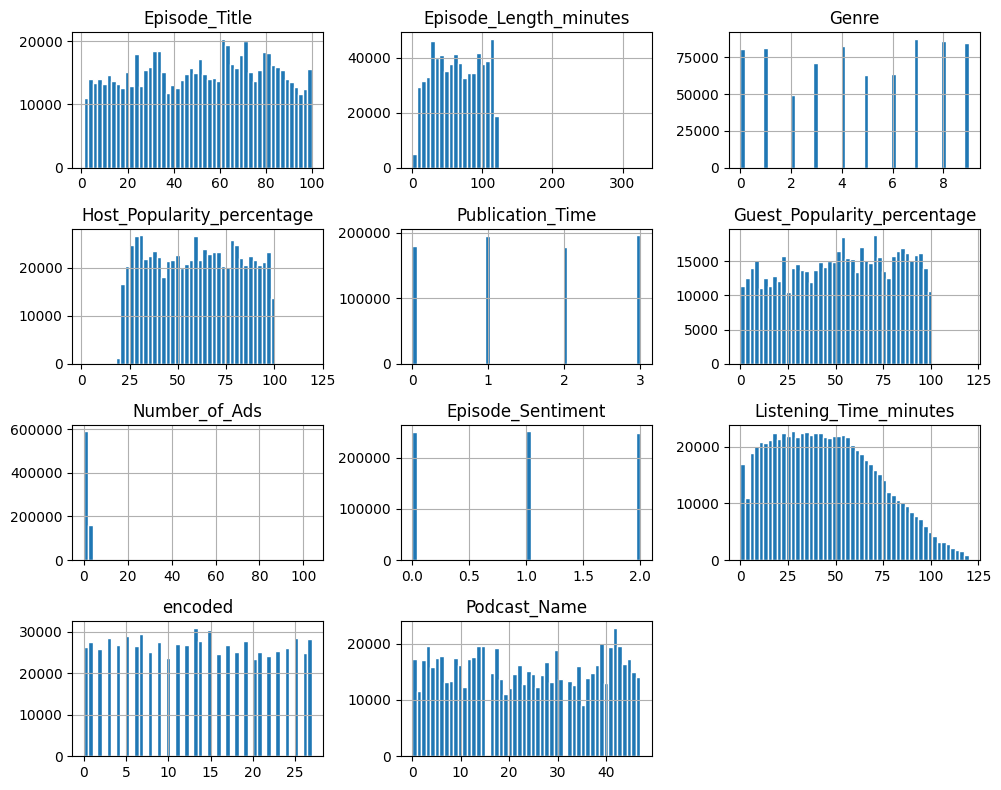

In [168]:
Train_df_new_wo_pca.hist(figsize = (10,8), bins = 50, edgecolor = "white")
plt.tight_layout()
plt.show()

<Axes: >

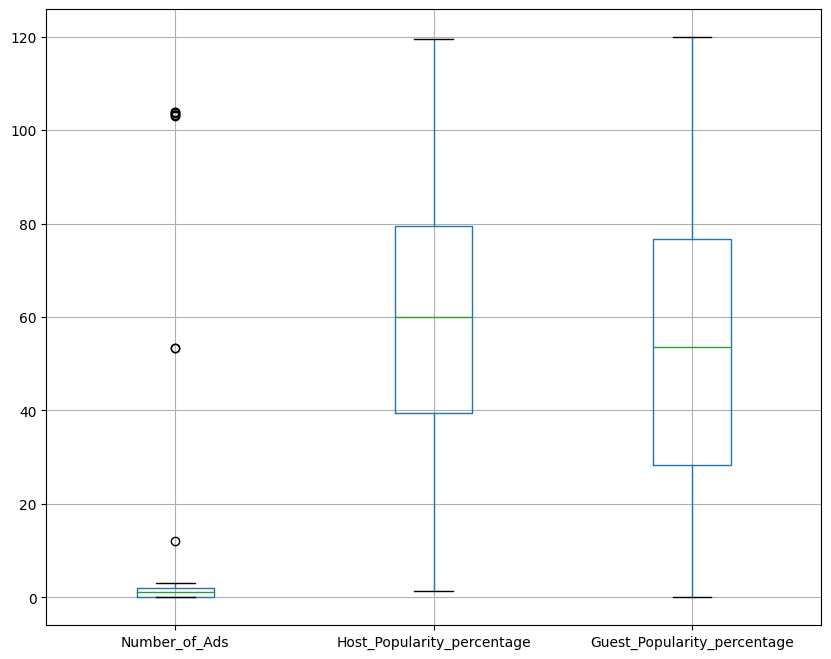

In [169]:
Train_df_new_wo_pca[["Number_of_Ads","Host_Popularity_percentage","Guest_Popularity_percentage"]].boxplot(figsize = (10,8))

In [170]:
Train_df_new_wo_pca["Publication_Day"] = Train_df["Publication_Day"]

In [171]:
X = xgb.DMatrix(Train_df_new_wo_pca.drop([TARGET], axis = 1).drop('encoded', axis = 1))
y = Train_df_new_wo_pca[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X.get_data(), y, test_size=0.2, random_state=42)

In [172]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [173]:
print(np.sqrt(mean_squared_error(xgb_reg.predict(X_test),y_test)))

12.823758319819758


# Conclusion
> The encoded value gives optimum results than that of the Publication_Day

In [174]:
Train_df_new_wo_pca['encoded'] = Train_df['encoded']

In [175]:
Train_df_new_wo_pca = Train_df_new_wo_pca.drop('Publication_Day', axis = 1)

In [176]:
Train_df_new_wo_pca["Guest_isto_host"] = Train_df_new_wo_pca["Guest_Popularity_percentage"] / Train_df_new_wo_pca["Host_Popularity_percentage"] 

In [177]:
Test_df_new_wo_pca["Guest_isto_host"] = Test_df_new_wo_pca["Guest_Popularity_percentage"] / Test_df_new_wo_pca["Host_Popularity_percentage"] 

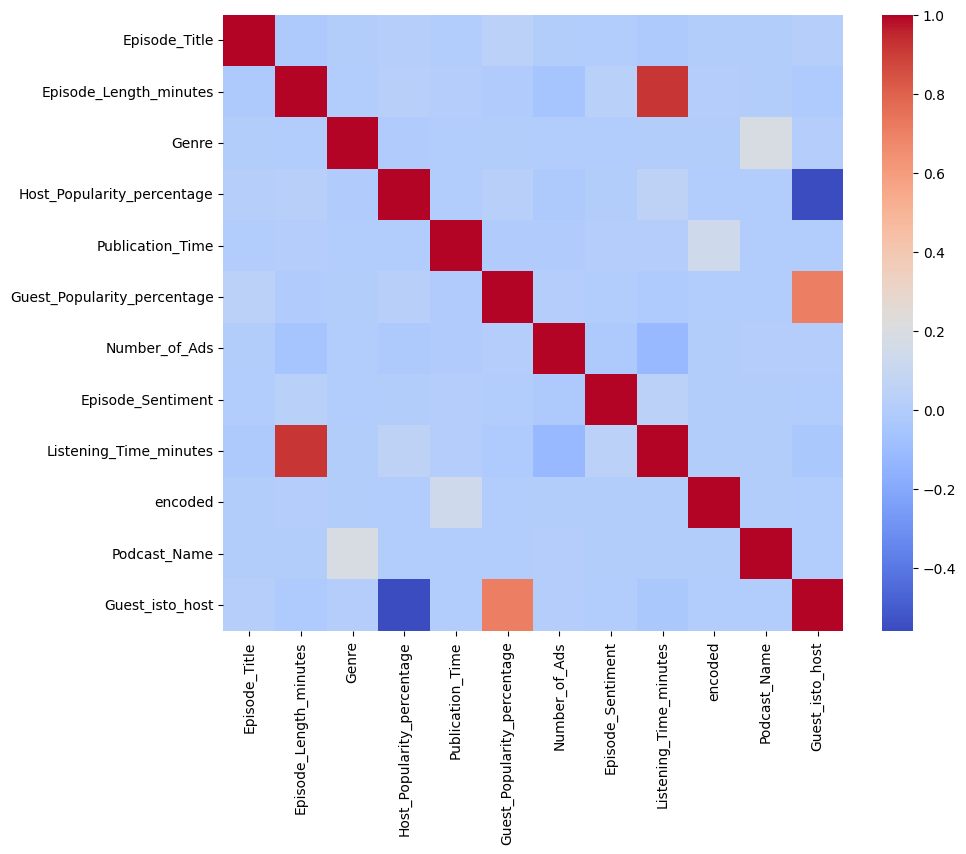

In [178]:
heatmap_of(Train_df_new_wo_pca.corr())

In [179]:
Train_df_new_wo_pca = Train_df_new_wo_pca.drop("Guest_isto_host", axis = 1)

In [180]:
Test_df_new_wo_pca = Test_df_new_wo_pca.drop("Guest_isto_host", axis = 1)

In [181]:
X = xgb.DMatrix(Train_df_new_wo_pca.drop([TARGET], axis = 1))
y = Train_df_new_wo_pca[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X.get_data(), y, test_size=0.2, random_state=42)

In [182]:
xgb_reg.fit(X_train, y_train, eval_set = [(X_train,y_train), (X_test, y_test)], eval_metric = ["rmse"], early_stopping_rounds = 10)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:25.04819	validation_1-rmse:25.09096
[1]	validation_0-rmse:23.20268	validation_1-rmse:23.30985
[2]	validation_0-rmse:21.57663	validation_1-rmse:21.75590
[3]	validation_0-rmse:20.14600	validation_1-rmse:20.40936
[4]	validation_0-rmse:18.89417	validation_1-rmse:19.24804
[5]	validation_0-rmse:17.80162	validation_1-rmse:18.24579
[6]	validation_0-rmse:16.84448	validation_1-rmse:17.38967
[7]	validation_0-rmse:16.00942	validation_1-rmse:16.66160
[8]	validation_0-rmse:15.28601	validation_1-rmse:16.04253
[9]	validation_0-rmse:14.65312	validation_1-rmse:15.52398
[10]	validation_0-rmse:14.10659	validation_1-rmse:15.08462
[11]	validation_0-rmse:13.63689	validation_1-rmse:14.71719
[12]	validation_0-rmse:13.22501	validation_1-rmse:14.40798
[13]	validation_0-rmse:12.87225	validation_1-rmse:14.15201
[14]	validation_0-rmse:12.56029	validation_1-rmse:13.93704
[15]	validation_0-rmse:12.27996	validation_1-rmse:13.75964
[16]	validation_0-rmse:12.03707	validation_1-rmse:13.61207
[17]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [183]:
print(np.sqrt(mean_squared_error(xgb_reg.predict(X_test),y_test)))

12.810804984926575


In [184]:
# from sklearn.model_selection import RandomizedSearchCV
# xgb_reg_new = xgb.XGBRegressor(tree_method='hist', eval_metric='rmse', verbosity=1)

# # Narrow hyperparameter dist for speed
# # ✅ Param Grid — manageable size for GridSearch
# param_dist = {
#     'n_estimators': [100, 120],  # Lower range
#     'max_depth': [15, 20],         # Focus on reasonable tree depth
#     'learning_rate': [0.05, 0.1], # Keep learning rates smaller
#     'subsample': [0.8],          # Keep subsample fixed
#     'colsample_bytree': [0.8],   # Keep colsample_bytree fixed
#     'gamma': [0, 1],             # Regular gamma choices
#     'reg_lambda': [0, 1],           # L2 regularization
#     'reg_alpha': [0, 1]          # L1 regularization choices
# }

# # ✅ Grid Search Setup
# random_search = RandomizedSearchCV(
#     estimator=xgb_reg_new,
#     param_distributions=param_dist,
#     scoring='neg_root_mean_squared_error',  # For RMSE (negated)
#     n_iter = 5,
#     verbose=2,
#     n_jobs=-1, 
#     cv = 3
# )

# # ✅ Fit on data
# random_search.fit(X_train, y_train)

# # ✅ Results
# print("Best parameters:", random_search.best_params_)
# print("Best RMSE (CV):", -random_search.best_score_)

# # ✅ Final Model
# best_model = random_search.best_estimator_
# y_pred = best_model.predict(X_test)
# rmse_test = mean_squared_error(y_test, y_pred, squared=False)
# print("Test RMSE:", rmse_test)

In [185]:
xgb_reg_new = xgb.XGBRegressor(tree_model = "hist", subsample = 0.8, reg_lambda = 1, reg_alpha =  0, n_estimators = 120, max_depth = 15, learning_rate= 0.1, gamma= 0, colsample_bytree =  0.8)

In [186]:
xgb_reg_new.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:36:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "tree_model" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=120, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [187]:
print(np.sqrt(mean_squared_error(xgb_reg.predict(X_test),y_test)))

12.810804984926575


In [188]:
Train_df_new_wo_pca['Host_Guest_Popularity'] = Train_df_new_wo_pca['Host_Popularity_percentage'] * Train_df_new_wo_pca['Guest_Popularity_percentage'].fillna(df['Guest_Popularity_percentage'].mean())
Train_df_new_wo_pca['Ads_per_minute'] = Train_df_new_wo_pca['Number_of_Ads'] / df['Episode_Length_minutes']

In [189]:
Train_df_new_wo_pca.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Episode_Title  Episode_Length_minutes  Genre  Host_Popularity_percentage  \
0             98                     NaN      9                       74.81   
1             26                  119.80      1                       66.95   
2             16                   73.90      2                       69.97   
3             45                   67.17      8                       57.22   
4             86                  110.51      3                       80.07   

   Publication_Time  Guest_Popularity_percentage  Number_of_Ads  \
0                 3                          NaN            0.0   
1                 0                        75.95            2.0   
2                 1                         8.97            0.0   
3                 2                        78.70            2.0   
4                 0                        58.68            3.0   

   Episode_Sentiment  Listening_Time_minutes  encoded  Podcast_Name  \
0                  2                31.41998       19            34   
1                  0                88.01241        8            24   
2                  0                44.92531       21            40   
3                  2                46.27824        6            10   
4                  1                75.61031        4            31   

   Host_Guest_Popularity  Ads_per_minute  
0            3907.808745             NaN  
1            5084.852500        0.016694  
2             627.630900        0.000000  
3            4503.214000        0.029775  
4            4698.507600        0.027147

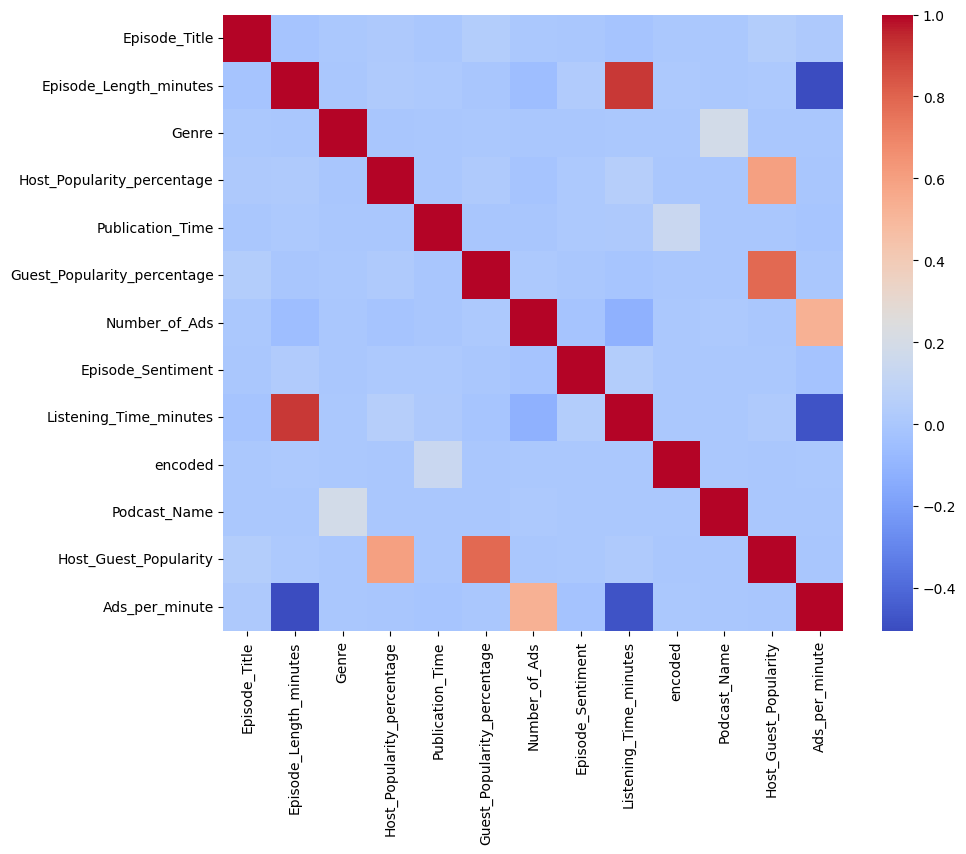

In [190]:
heatmap_of(Train_df_new_wo_pca.corr())

In [191]:
from xgboost import plot_importance

feature_name = list(Train_df_new_wo_pca.columns).remove(TARGET)

X = Train_df_new_wo_pca.drop([TARGET], axis = 1)
y = Train_df_new_wo_pca[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

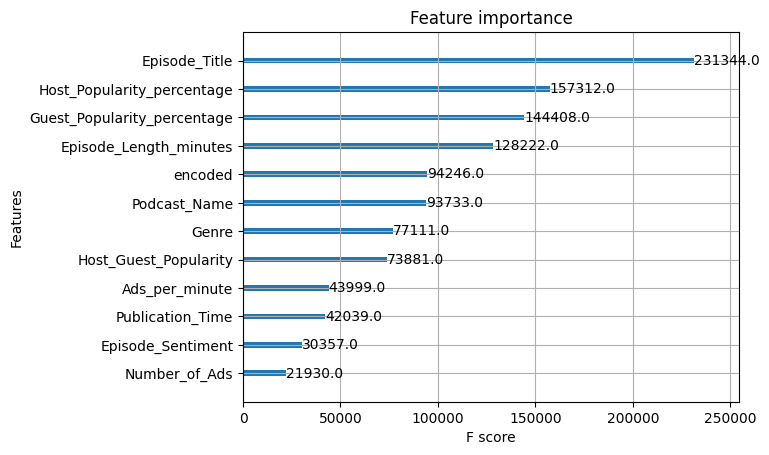

In [192]:
plot_importance(xgb_reg, max_num_features = len(Train_df_new_wo_pca.columns))

In [193]:
Train_df_new_wo_pca['New_Epsiode_Length_minutes'] = np.log1p(Train_df_new_wo_pca['Episode_Length_minutes'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


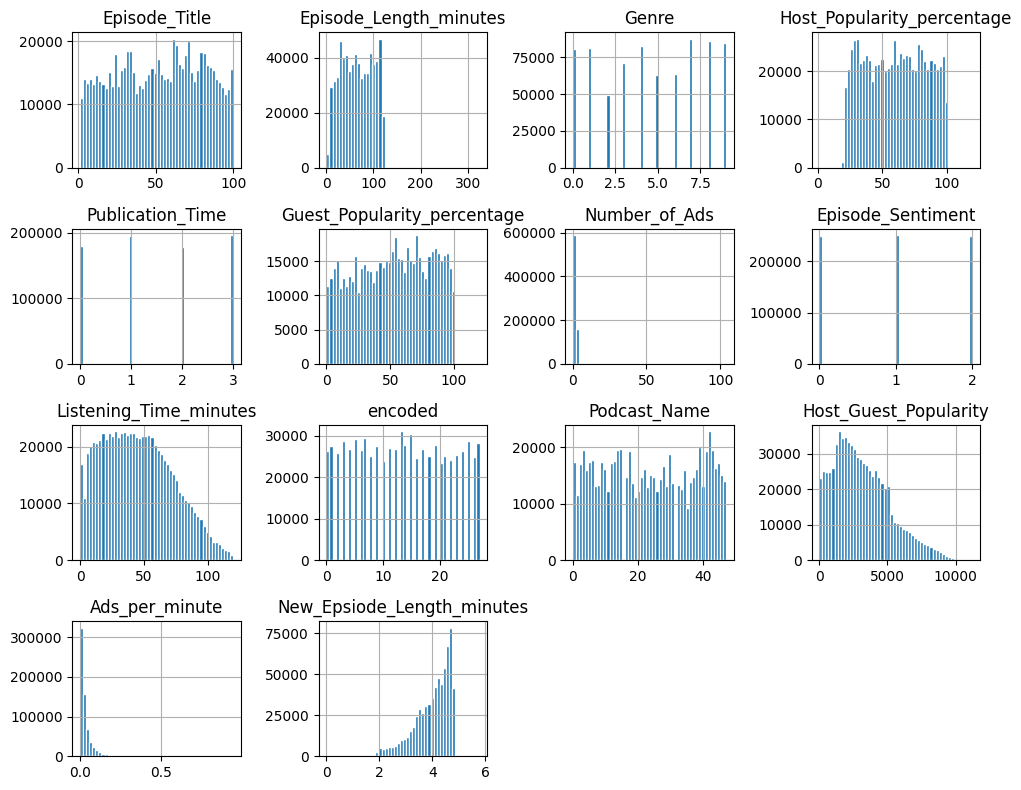

In [194]:
Train_df_new_wo_pca.hist(figsize = (10,8), bins = 50, edgecolor = "white")
plt.tight_layout()
plt.show()

In [195]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=7d6f2fda299073c660056e4d211bb51857682c7f9833f3e9e37acd4c39a65252
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=260b739808a9efbb1c87dacb18cdb15cfbcb07a6963ce8687f4fef53eeb9668e
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [196]:
from fancyimpute import KNN
def chunked_impute(df, chunk_size=10000):
    from fancyimpute import KNN
    imputed_chunks = []

    for start in range(0, len(df), chunk_size):
        end = start + chunk_size
        chunk = df.iloc[start:end]
        imputed = KNN(k=10).fit_transform(chunk)
        imputed_chunks.append(imputed)

    return np.vstack(imputed_chunks)

In [197]:
df.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

In [198]:
Train_df_new_wo_pca.isna().sum()

Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
encoded                             0
Podcast_Name                        0
Host_Guest_Popularity               0
Ads_per_minute                  87095
New_Epsiode_Length_minutes      87093
dtype: int64

In [199]:
cols = list(Train_df_new_wo_pca.columns)

In [200]:
cols.remove(TARGET)

In [201]:
cols.remove('New_Epsiode_Length_minutes')

In [202]:
cols

['Episode_Title',
 'Episode_Length_minutes',
 'Genre',
 'Host_Popularity_percentage',
 'Publication_Time',
 'Guest_Popularity_percentage',
 'Number_of_Ads',
 'Episode_Sentiment',
 'encoded',
 'Podcast_Name',
 'Host_Guest_Popularity',
 'Ads_per_minute']

In [203]:
# min_rmse = np.inf
# feature_rmse_dict = {}

# # Make sure you’re using test data
# for i in range(1, len(cols)+1): 
#     l = list(combinations(cols, i))
#     print(l)
#     for combo in l:
#         # Drop a combination of features
#         X_train_temp = X_train.drop(columns=list(combo))
#         X_test_temp = X_test.drop(columns=list(combo))

#         # Train and predict
#         xgb_reg.fit(X_train_temp, y_train)
#         y_pred = xgb_reg.predict(X_test_temp)

#         # Calculate RMSE
#         rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#         # Save if it's a new minimum
#         if rmse < min_rmse:
#             min_rmse = rmse
#             feature_rmse_dict[rmse] = list(combo)
#             print(feature_rmse_dict)


In [204]:
from sklearn.feature_selection import RFECV

In [205]:
# selector = RFECV(xgb_reg, cv=5) 
# selector = selector.fit(X, y) 

In [206]:
# set(X.columns).difference(set(X.columns[selector.support_]))

In [207]:
# X = X.drop('Host_Guest_Popularity',axis = 1)

In [208]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [209]:
# xgb_reg.fit(X_train, y_train)

In [210]:
# print(np.sqrt(mean_squared_error(xgb_reg.predict(X_test), y_test)))

In [211]:
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5)
# Train_df_new_wo_pca_imputed = imputer.fit_transform(Train_df_new_wo_pca.select_dtypes(include=[np.number]))

In [212]:
# import shap

# # Create SHAP explainer from the trained model
# explainer = shap.Explainer(xgb_reg)

In [213]:
# Convert DMatrix back to DataFrame for SHAP if needed
# shap_values = explainer(X_array)

In [214]:
# Plot
# shap.plots.beeswarm(shap_values, feature_names=feature_names)

In [215]:
# print(np.sqrt(mean_squared_error(xgb_reg.predict(X_test), y_test)))

In [216]:
Train_df_new_wo_pca.columns

Index(['Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment',
       'Listening_Time_minutes', 'encoded', 'Podcast_Name',
       'Host_Guest_Popularity', 'Ads_per_minute',
       'New_Epsiode_Length_minutes'],
      dtype='object')

In [217]:
Train_df_new_wo_pca = Train_df_new_wo_pca.drop(['Host_Guest_Popularity', 'Ads_per_minute',
       'New_Epsiode_Length_minutes'], axis = 1)

# Trying to handle the missing value with another method

In [218]:
Train_df_new_wo_pca.shape

(750000, 11)

In [219]:
Train_df_new_wo_pca.isna().sum()

Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
encoded                             0
Podcast_Name                        0
dtype: int64

In [220]:
Train_df_new_wo_pca['Number_of_Ads'] = Train_df_new_wo_pca['Number_of_Ads'].fillna(Train_df_new_wo_pca['Number_of_Ads'].mean())

In [221]:
Train_df_new_wo_pca_train_ep = Train_df_new_wo_pca.drop(['Guest_Popularity_percentage'], axis = 1)

In [222]:
dTrain = Train_df_new_wo_pca_train_ep.copy()

In [223]:
dTrain.shape

(750000, 10)

In [224]:
# dTrain_X = dTrain_tr.drop(['Episode_Length_minutes', TARGET], axis = 1)
# dTrain_y = dTrain_tr['Episode_Length_minutes']
# X_train, X_test, y_train, y_test = train_test_split(dTrain_X, dTrain_y, test_size = 0.2)

In [225]:
# xgb_fit_ep = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, learning_rate = 0.01)
# xgb_fit_ep.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)], verbose = 100)

In [226]:
# plot_importance(xgb_fit_ep, max_num_features = len(dTrain_X.columns))

In [227]:
# plt.figure(figsize = (10,8))
# sns.heatmap(dTrain_tr.drop(TARGET, axis = 1).corr(),annot = True, cmap = 'coolwarm')
# plt.show()

## Inference
As we can see the host popularity percentage can be clustered based on the top 2-3 features : Host_Popularity_percentage, Episode_Title, Podcast_Name, etc.

In [228]:
# features_to_cluster = ['Host_Popularity_percentage','Episode_Title','Podcast_Name', 'Episode_Length_minutes']

In [229]:
# X_cluster = dTrain[features_to_cluster].copy()

# # Example encoding for categorical cols
# for col in ['Episode_Title', 'Podcast_Name']:
#     X_cluster[col] = X_cluster[col].astype('category').cat.codes  # or use more meaningful encoding

# # scaler = StandardScaler()
# # X_scaled = scaler.fit_transform(X_cluster)

In [230]:
# from sklearn.mixture import GaussianMixture

# gmm = GaussianMixture(n_components=3, random_state=42)
# X_cluster_wo_na = X_cluster[~X_cluster['Episode_Length_minutes'].isna()]
# X_cluster_wo_na['cluster'] = gmm.fit_predict(X_cluster_wo_na)

In [231]:
# dTrain_tr = X_cluster_wo_na
# dTrain_te = dTrain[dTrain['Episode_Length_minutes'].isna()]

In [232]:
# pca = PCA(n_components = 1)
# dTrain_tr['pca'] = pca.fit_transform(dTrain_tr.drop(['cluster','Episode_Length_minutes'], axis = 1))

In [233]:
# X_cluster_wo_na['Episode_Length_minutes'].corr(X_cluster_wo_na['cluster'])

In [234]:
# scatter = plt.scatter(data = dTrain_tr.head(100), x = 'pca', y = 'Episode_Length_minutes', c=dTrain_tr.head(100)['cluster'], cmap='viridis', edgecolor='k')
# plt.colorbar(scatter, label='Cluster')
# plt.show()

In [235]:
# dTrain_tr.head()

In [236]:
# print(dTrain_tr[dTrain_tr['cluster']==0].shape[0]/dTrain_tr[dTrain_tr['cluster']==1].shape[0])
# print(dTrain_tr[dTrain_tr['cluster']==0].shape[0]/dTrain_tr[dTrain_tr['cluster']==2].shape[0])

In [237]:
# print(dTrain_te[dTrain_te['cluster']==0].shape[0]/dTrain_te[dTrain_te['cluster']==1].shape[0])
# print(dTrain_te[dTrain_te['cluster']==0].shape[0]/dTrain_te[dTrain_te['cluster']==2].shape[0])

In [238]:
# X_B_cluster = dTrain_te[features_to_cluster].copy()

# # Same encoding
# for col in ['Episode_Title', 'Podcast_Name']:
#     X_B_cluster[col] = X_B_cluster[col].astype('category').cat.codes

# # X_B_scaled = scaler.transform(X_B_cluster)
# dTrain_te['cluster_pred'] = gmm.predict(X_B_cluster)

In [239]:
# np.sqrt(mean_squared_error(dTrain_te['cluster'], dTrain_te['cluster_pred']))

In [240]:
# from sklearn.neighbors import KNeighborsRegressor

In [241]:
# # from sklearn.linear_model import LinearRegressor
# # from sklearn.tree import DecisionTreeRegressor
# # min_rmse = np.inf
# # n_val = -1
# # for i in range(21,52):
# #     knn_0 = KNeighborsRegressor(n_neighbors=i, p=2, metric='minkowski')
# #     # lr_0 = LinearRegression()
# #     # d_tree_0 = DecisionTreeRegressor()
# #     X_0 = dTrain_tr[dTrain_tr['cluster']==0].drop(['cluster','Episode_Length_minutes','Listening_Time_minutes'], axis = 1)
# #     y_0 = dTrain_tr[dTrain_tr['cluster']==0]['Episode_Length_minutes']
# #     X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size = 0.2)
    
# #     knn_0.fit(X_train_0, y_train_0)
# #     # lr.fit(X_train_0, y_train_0)
# #     rmse = np.sqrt(mean_squared_error(knn_0.predict(X_test_0), y_test_0))
# #     if rmse < min_rmse:
# #         min_rmse = rmse
# #         n_val = i
# #         print("done")
# # print(min_rmse)
# # print(n_val)

# # d_tree_0.fit(X_train_0, y_train_0)
# # print(np.sqrt(mean_squared_error(d_tree_0.predict(X_test_0), y_test_0)))

# knn_0 = KNeighborsRegressor(n_neighbors=43, p=2, metric='minkowski')
# # lr_0 = LinearRegression()
# # d_tree_0 = DecisionTreeRegressor()
# X_0 = dTrain_tr[dTrain_tr['cluster']==0].drop(['cluster','Episode_Length_minutes','Listening_Time_minutes'], axis = 1)
# y_0 = dTrain_tr[dTrain_tr['cluster']==0]['Episode_Length_minutes']
# X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size = 0.2)

# knn_0.fit(X_train_0, y_train_0)
# # lr.fit(X_train_0, y_train_0)
# rmse = np.sqrt(mean_squared_error(knn_0.predict(X_test_0), y_test_0))

In [242]:
# rmse

In [243]:
# dTrain.columns

In [244]:
# xgb_reg_0 = xgb.XGBRegressor(n_estimators = 500, learning_rate = 0.01)
# min_score = np.inf
# i_val = -1
# for j in ['Episode_Title', 'Genre', 'Host_Popularity_percentage', 'Publication_Time', 'Number_of_Ads','Episode_Sentiment', 'encoded','Podcast_Name']:
#     X_cluster = dTrain[j].copy()
#     for i in range(2, 11):
#         print("Training...")
#         gmm = GaussianMixture(n_components=i, random_state=42)
#         dTrain['cluster'] = gmm.fit_predict(pd.DataFrame(X_cluster))
#         dTrain_tr = dTrain[~dTrain['Episode_Length_minutes'].isna()]
#         X_0 = dTrain_tr[dTrain_tr['cluster']==0].drop(['cluster','Episode_Length_minutes','Listening_Time_minutes'], axis = 1)
#         y_0 = dTrain_tr[dTrain_tr['cluster']==0]['Episode_Length_minutes']
#         X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size = 0.2)
#         xgb_reg_0.fit(X_train_0, y_train_0)
#         rmse = np.sqrt(mean_squared_error(xgb_reg_0.predict(X_test_0),y_test_0))
#         if rmse < min_score:
#             min_score = rmse
#             i_val = i
#     print('J : ', j)
#     print("least_rmse : ", rmse)
#     print("i_val : ", i_val)
    

In [245]:
# dTrain_tr

# Let's try some other approach
> The reason for this is that all the features will give the least RMSE of 32 based on the clustering and predicting approach. So to explain this, none of the features are strongly correlated with the Episode_Length_minutes. So we need to introduce certain column(s) which are strongly correlated with the Episode_Length_minutes and then try handling the missing values further to predict the output. 

Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
J :  Episode_Title
least_rmse :  33.15372626495418
i_val :  3
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
J :  Genre
least_rmse :  33.10577733416326
i_val :  3
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
J :  Host_Popularity_percentage
least_rmse :  32.40363814568353
i_val :  5
Training...
Training...
Training...
Training...
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  .fit(X)
Training...
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  .fit(X)
Training...
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  .fit(X)
Training...
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  .fit(X)
Training...
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  .fit(X)
Training...
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  .fit(X)
J :  Publication_Time
least_rmse :  32.72104419984771
i_val :  5
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
J :  Number_of_Ads
least_rmse :  32.41407794988994
i_val :  5
Training...
Training...
Training...
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  .fit(X)
Training...
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  .fit(X)
Training...
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  .fit(X)
Training...
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  .fit(X)
Training...
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  .fit(X)
Training...
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  .fit(X)
Training...
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  .fit(X)
J :  Episode_Sentiment
least_rmse :  32.69995020910896
i_val :  5
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
J :  encoded
least_rmse :  33.01204318481237
i_val :  5
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
J :  Podcast_Name
least_rmse :  32.37820626520428
i_val :  8

In [246]:
dTrain['Episode_Length_minutes'].head(100).isna().sum()

12

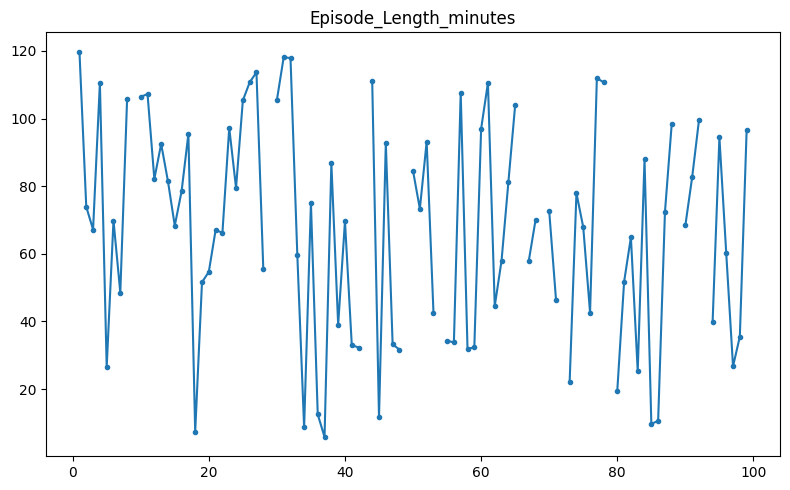

In [247]:
dTrain_cols = ['Host_Popularity_percentage', 'Publication_Time','encoded','Podcast_Name']
dTrain['Episode_Length_minutes'].head(100).plot(figsize = (8,5), style = '.-', title = 'Episode_Length_minutes')
plt.tight_layout()
plt.show()

In [248]:
combined_df = pd.concat([dTrain['Episode_Length_minutes'].head(100).shift(1), dTrain['Episode_Length_minutes'].head(100).interpolate(method = 'linear')], axis = 1)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

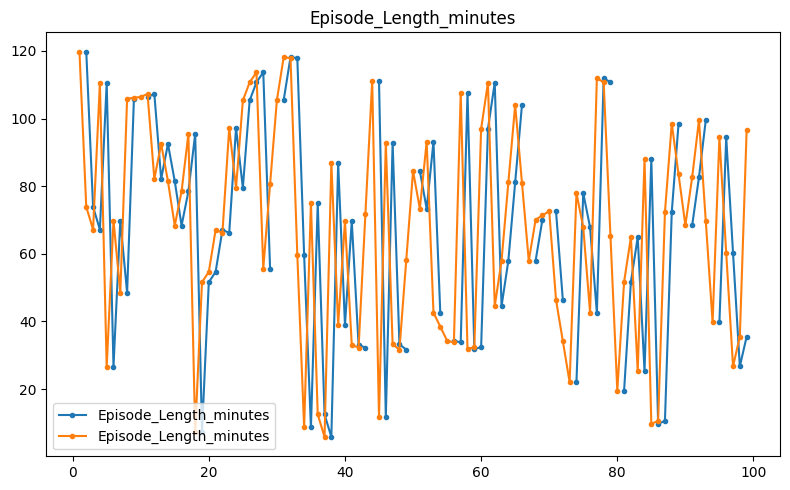

In [249]:
combined_df.plot(figsize = (8,5), style = '.-', title = 'Episode_Length_minutes')
plt.tight_layout()
plt.show()

In [250]:
combined_df_mean = pd.concat([dTrain['Episode_Length_minutes'].head(100).shift(1), dTrain['Episode_Length_minutes'].head(100).fillna(dTrain['Episode_Length_minutes'].head(100).mean())], axis = 1)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

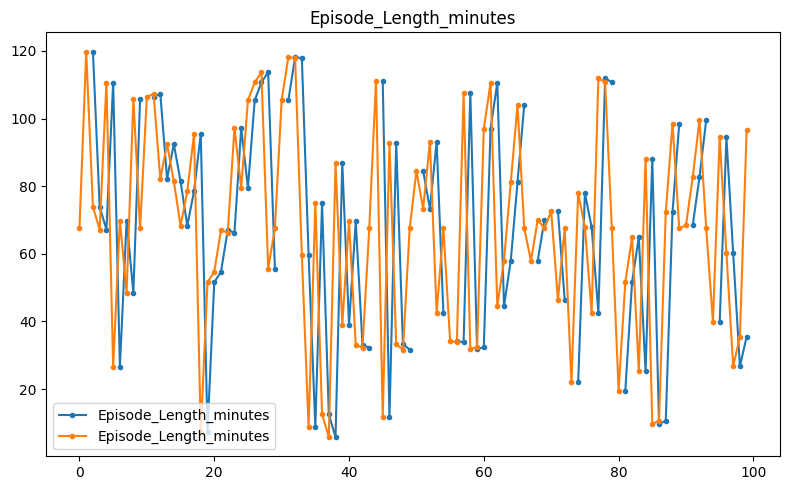

In [251]:
combined_df_mean.plot(figsize = (8,5), style = '.-', title = 'Episode_Length_minutes')
plt.tight_layout()
plt.show()

In [252]:
Train_df_new_wo_pca_filled = Train_df_new_wo_pca.copy()

In [253]:
Train_df_new_wo_pca_filled['Episode_Length_minutes'] = Train_df_new_wo_pca_filled['Episode_Length_minutes'].interpolate(method = 'linear')

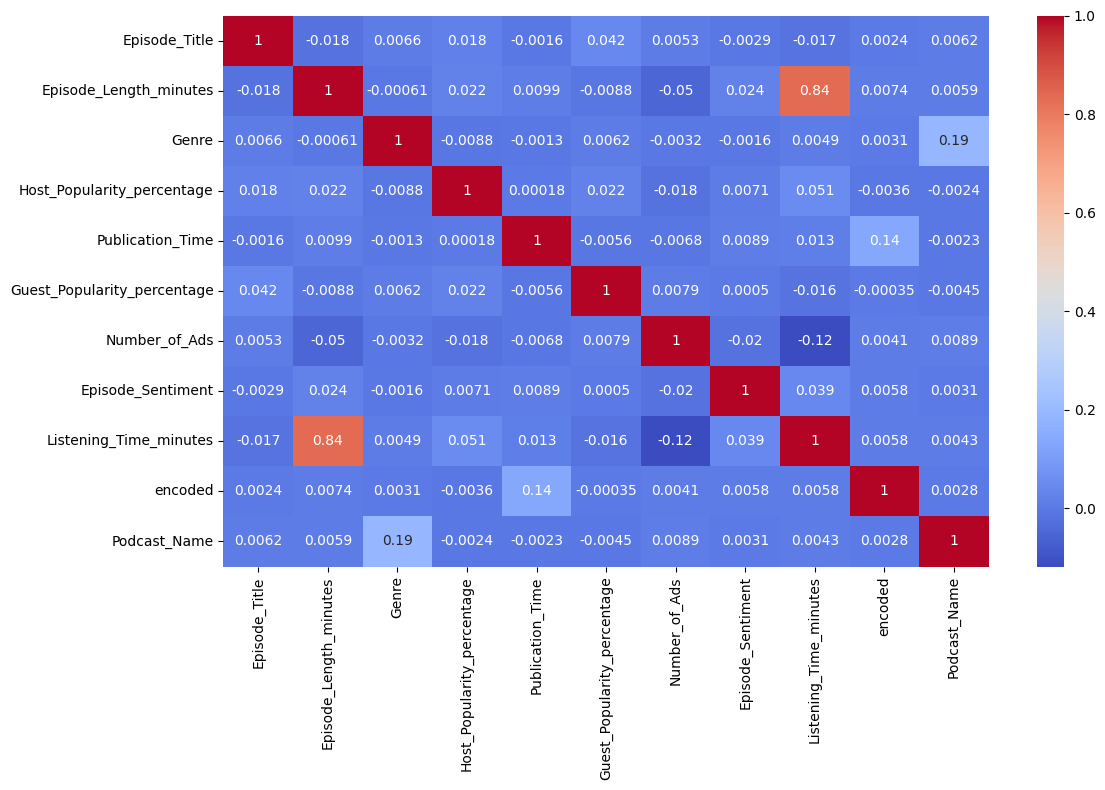

In [254]:
plt.figure(figsize=(12, 8))
sns.heatmap(Train_df_new_wo_pca_filled.corr(),annot = True, cmap = 'coolwarm')
# sns.heatmap(Train_df_new_wo_pca.drop(TARGET, axis = 1).corr(),annot = True, cmap = 'coolwarm', ax = axs[1])
plt.tight_layout()
plt.show()

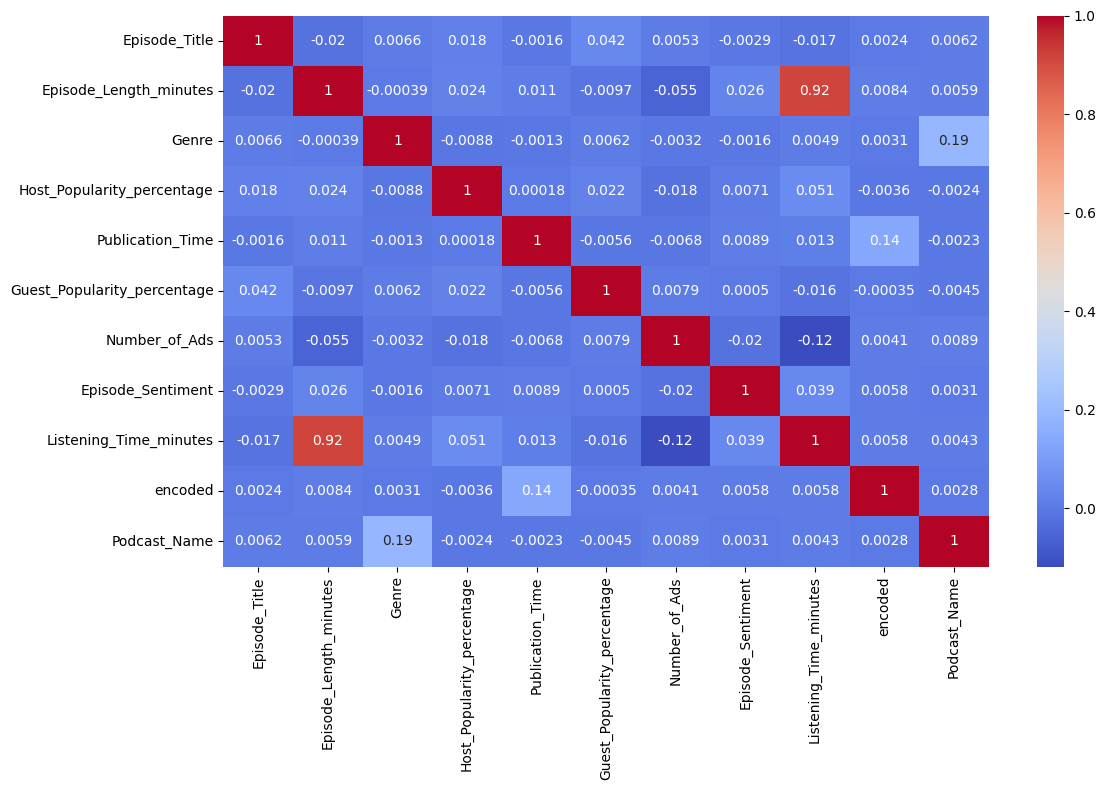

In [255]:
plt.figure(figsize=(12, 8))
sns.heatmap(Train_df_new_wo_pca.corr(),annot = True, cmap = 'coolwarm')
# sns.heatmap(Train_df_new_wo_pca.drop(TARGET, axis = 1).corr(),annot = True, cmap = 'coolwarm', ax = axs[1])
plt.tight_layout()
plt.show()

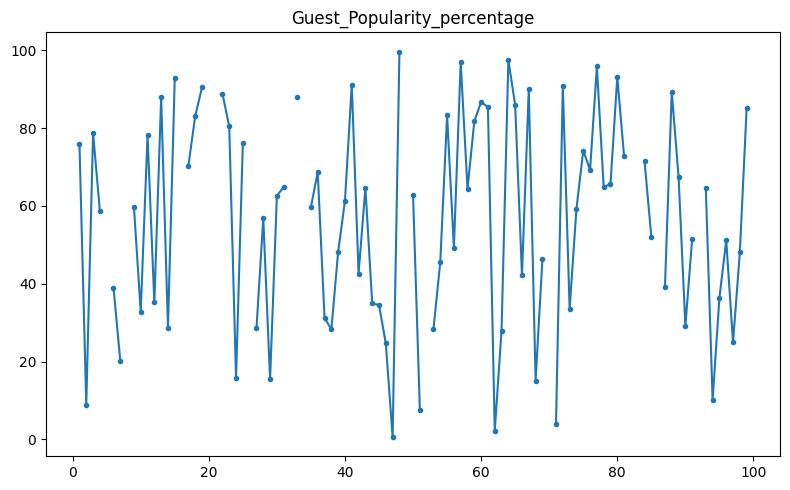

In [256]:
Train_df_new_wo_pca['Guest_Popularity_percentage'].head(100).plot(figsize = (8,5), style = '.-', title = 'Guest_Popularity_percentage')
plt.tight_layout()
plt.show()

['Host_Popularity_percentage', 'Publication_Time', 'encoded', 'Podcast_Name']


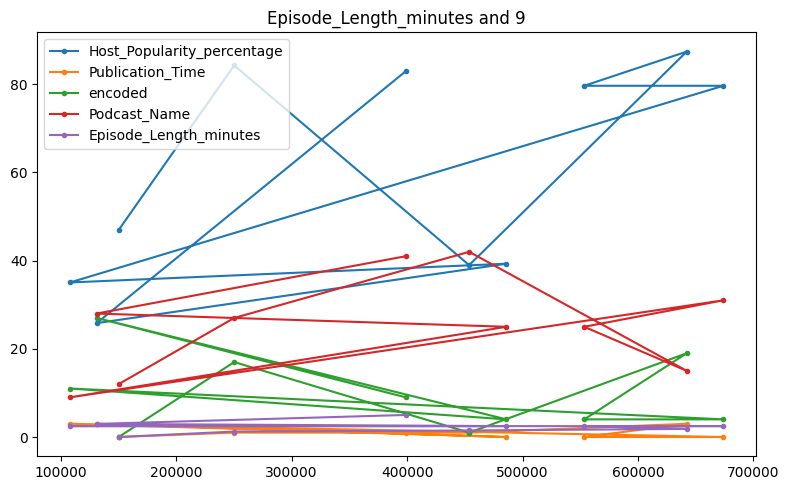

In [257]:
print(dTrain_cols)
# dTrain_cols = list(dTrain_cols).append('Episode_Length_minutes')
dTrain_cols.append('Episode_Length_minutes')
Train_df_new_wo_pca[dTrain_cols].sort_values(by = 'Episode_Length_minutes').head(10).plot(figsize = (8,5), style = '.-', title = f'Episode_Length_minutes and {i}')
plt.tight_layout()
plt.show()

In [258]:
Train_df_new_wo_pca = Train_df_new_wo_pca.sort_values(by = 'Episode_Length_minutes')

In [259]:
short_episodes = (
    Train_df_new_wo_pca[Train_df_new_wo_pca['Episode_Length_minutes'] <= 10]
    .groupby('Podcast_Name')
    .size()
    .reset_index(name='Episode_Count')
    .sort_values(by='Episode_Count', ascending=False)
)

print(short_episodes)

    Podcast_Name  Episode_Count
13            13            944
38            38            821
43            43            727
6              6            704
42            42            672
10            10            648
12            12            616
14            14            613
17            17            589
3              3            588
15            15            580
47            47            557
5              5            552
16            16            523
46            46            515
37            37            503
41            41            496
24            24            492
7              7            490
34            34            481
36            36            476
4              4            470
44            44            451
30            30            426
19            19            425
0              0            416
45            45            411
29            29            403
40            40            397
9              9            395
2       

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


In [260]:
less_short_episodes = (
    Train_df_new_wo_pca[(Train_df_new_wo_pca['Episode_Length_minutes'] > 10) & (Train_df_new_wo_pca['Episode_Length_minutes'] <= 20)]
    .groupby('Podcast_Name')
    .size()
    .reset_index(name='Episode_Count')
    .sort_values(by='Episode_Count', ascending=False)
)

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


<ipython-input-261-fe7711716bd1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  podcast_df['Length_Range'] = pd.cut(podcast_df['Episode_Length_minutes'], bins=bins, labels=labels, right=False)


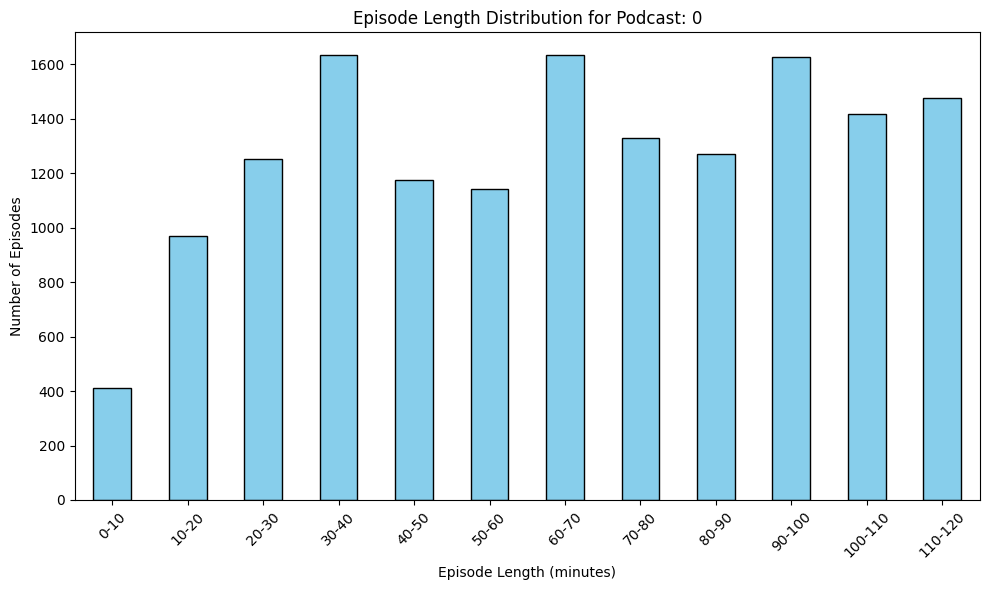

In [261]:
podcast_name = 0

# Filter data
podcast_df = Train_df_new_wo_pca[Train_df_new_wo_pca['Podcast_Name'] == podcast_name]

# Create bins
bins = list(range(0, int(podcast_df['Episode_Length_minutes'].max()) + 10, 10))  # e.g., 0–10, 10–20, ...
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Bin the episode lengths
podcast_df['Length_Range'] = pd.cut(podcast_df['Episode_Length_minutes'], bins=bins, labels=labels, right=False)

# Count episodes per bin
counts = podcast_df['Length_Range'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f"Episode Length Distribution for Podcast: {podcast_name}")
plt.xlabel("Episode Length (minutes)")
plt.ylabel("Number of Episodes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-262-94fd49d2118f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  podcast_df['Length_Range'] = pd.cut(podcast_df['Episode_Length_minutes'], bins=bins, labels=labels, right=False)


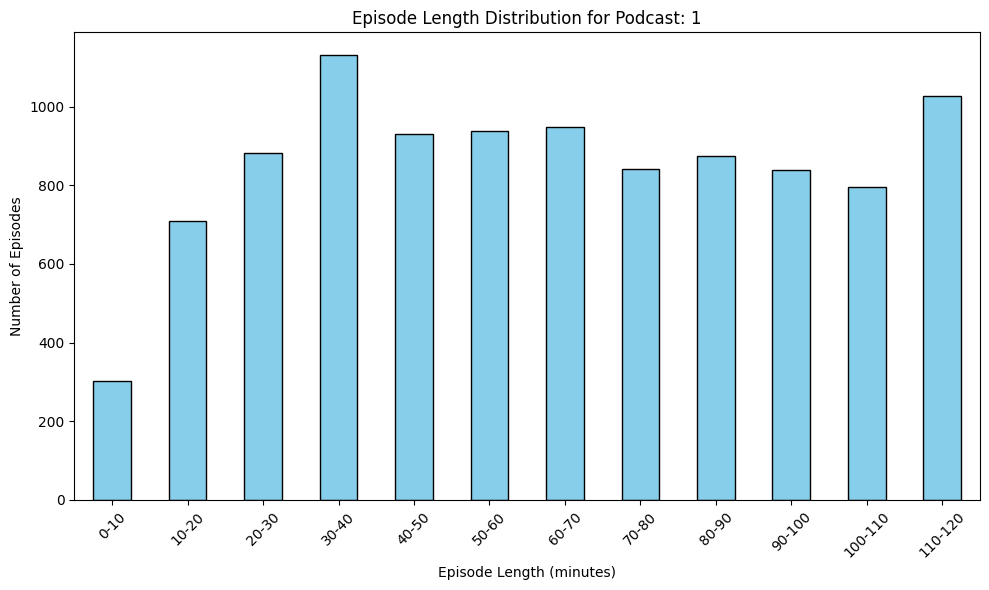

In [262]:
podcast_name = 1

# Filter data
podcast_df = Train_df_new_wo_pca[Train_df_new_wo_pca['Podcast_Name'] == podcast_name]

# Create bins
bins = list(range(0, int(podcast_df['Episode_Length_minutes'].max()) + 10, 10))  # e.g., 0–10, 10–20, ...
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Bin the episode lengths
podcast_df['Length_Range'] = pd.cut(podcast_df['Episode_Length_minutes'], bins=bins, labels=labels, right=False)

# Count episodes per bin
counts = podcast_df['Length_Range'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f"Episode Length Distribution for Podcast: {podcast_name}")
plt.xlabel("Episode Length (minutes)")
plt.ylabel("Number of Episodes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-263-8bf9fd28c880>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Train_df_new_wo_pca.groupby(['Podcast_Name', 'Length_Range'])
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals =

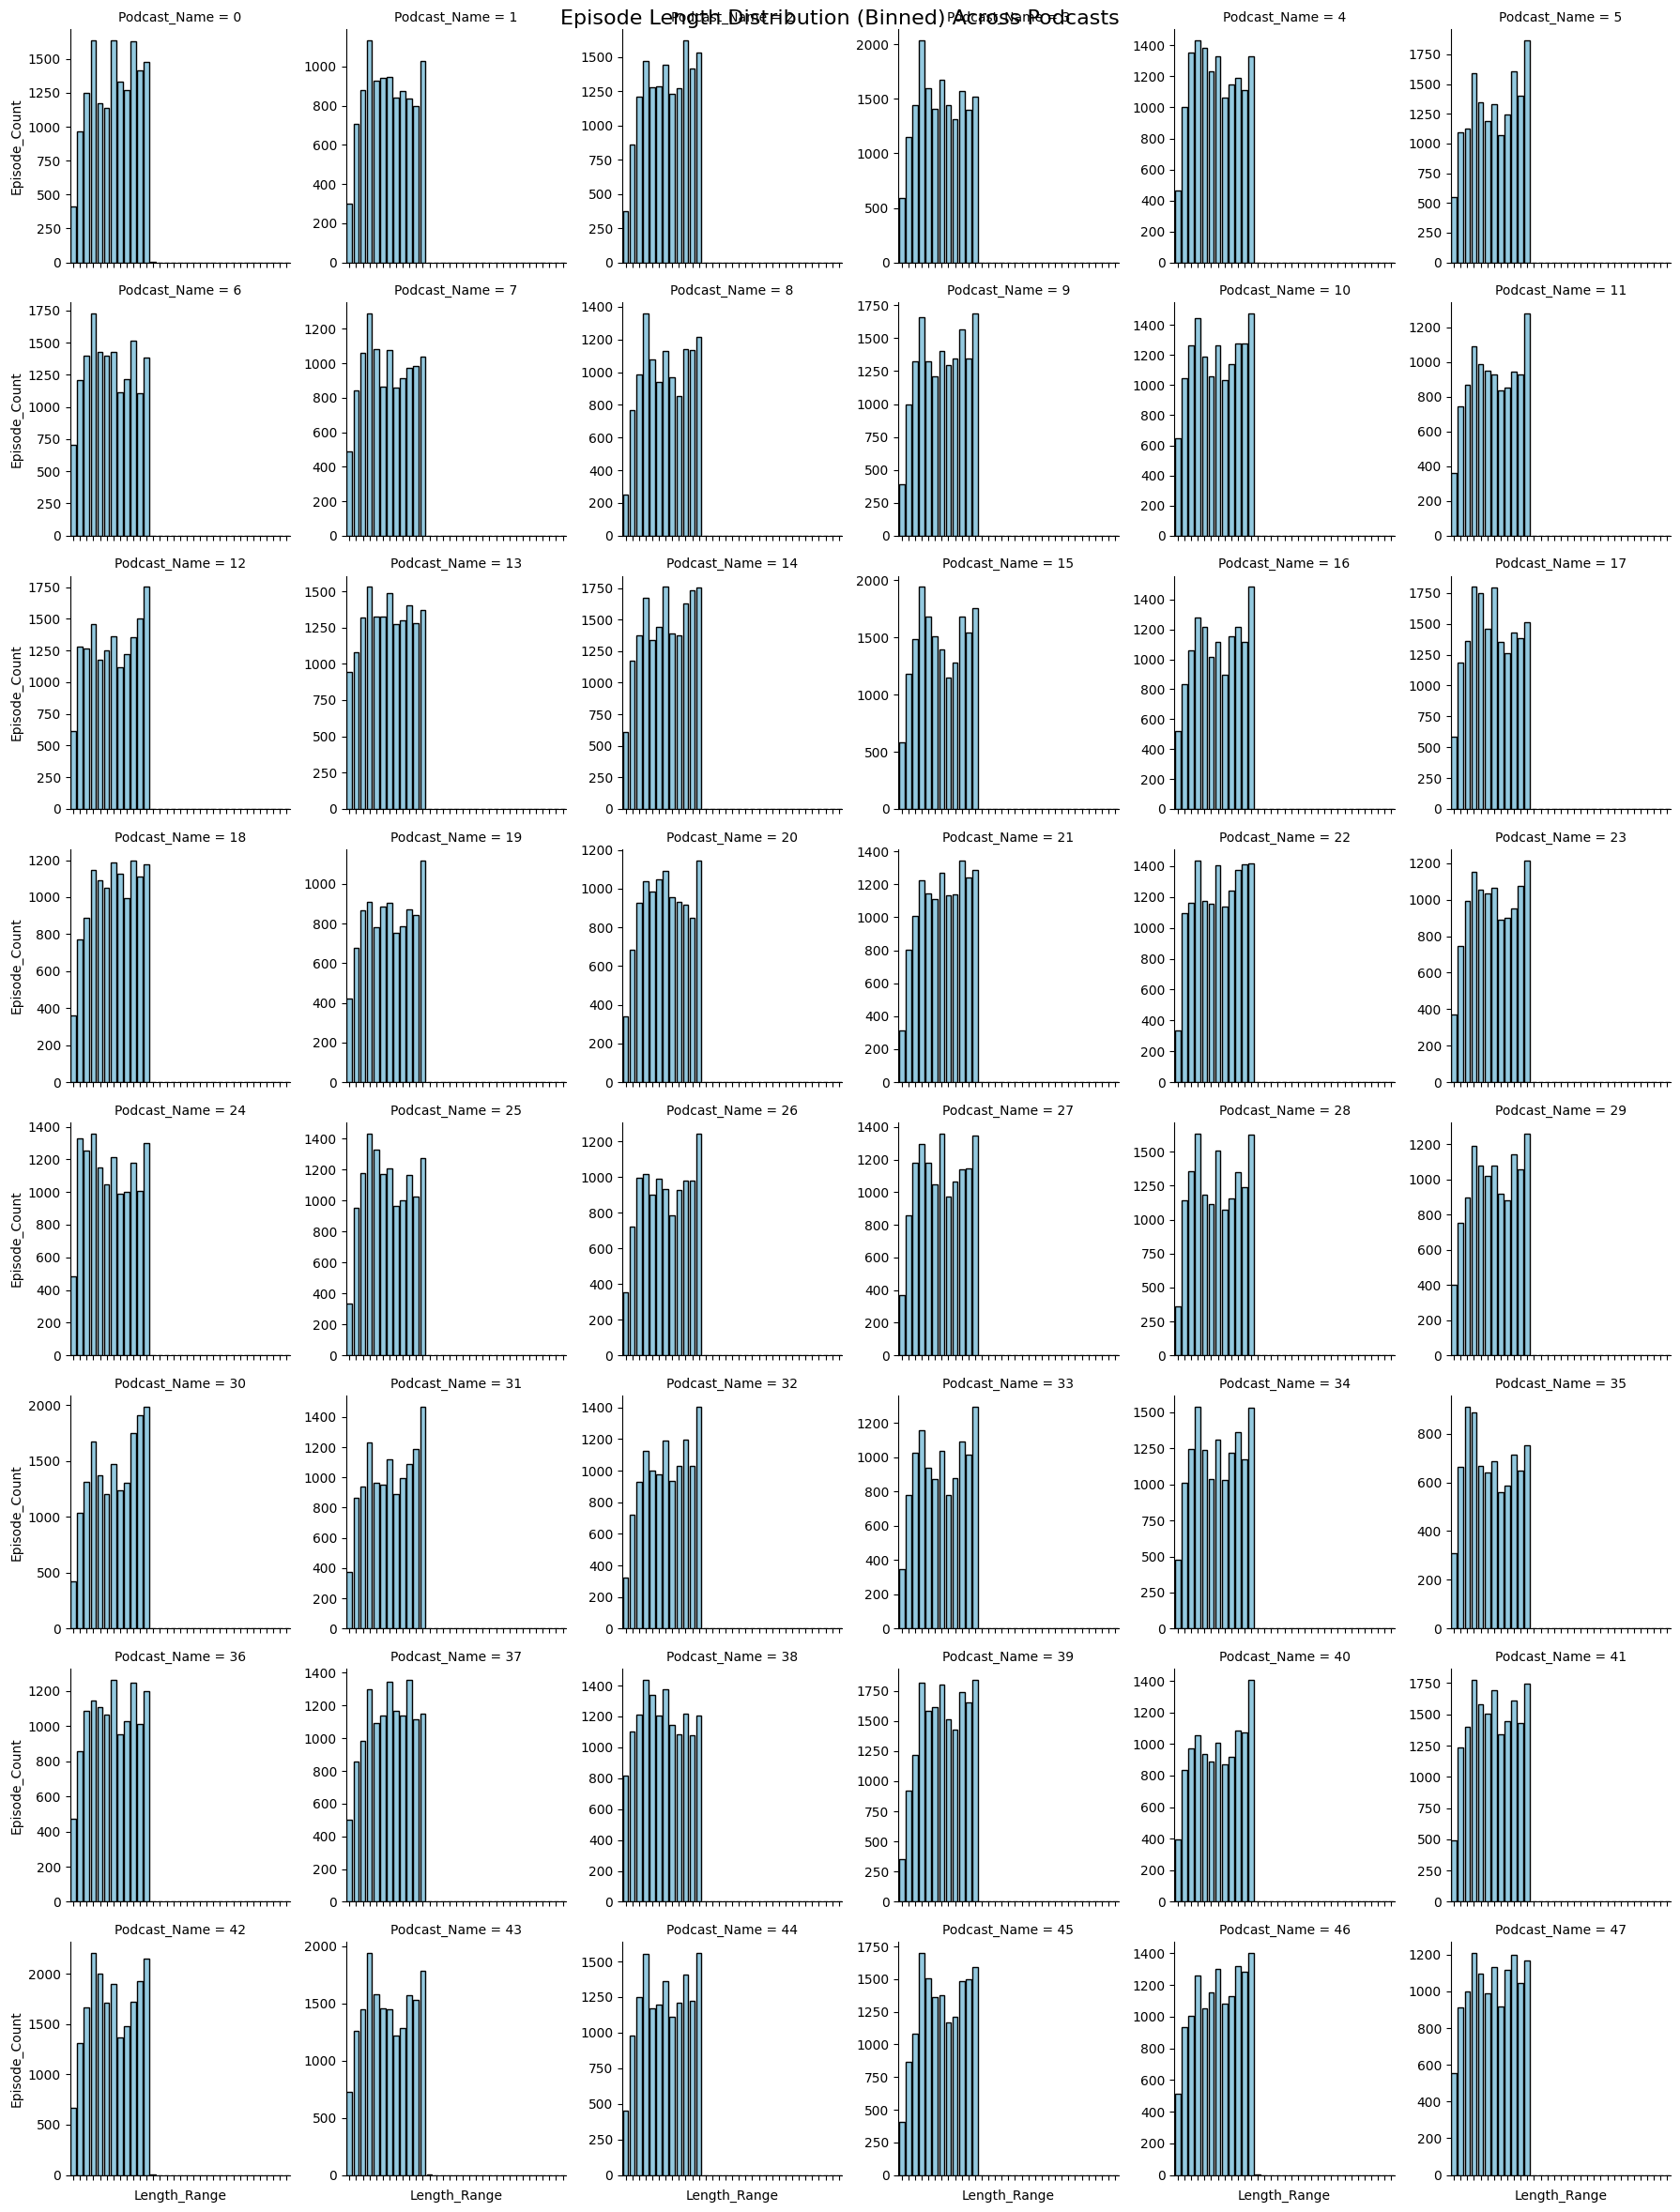

In [263]:
bins = list(range(0, int(Train_df_new_wo_pca['Episode_Length_minutes'].max()) + 10, 10))
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins) - 1)]

# Add a 'Length_Range' column
Train_df_new_wo_pca['Length_Range'] = pd.cut(
    Train_df_new_wo_pca['Episode_Length_minutes'], 
    bins=bins, 
    labels=labels, 
    right=False
)

# Prepare a new dataframe for plotting
plot_df = (
    Train_df_new_wo_pca.groupby(['Podcast_Name', 'Length_Range'])
    .size()
    .reset_index(name='Episode_Count')
)

# Plot using seaborn's FacetGrid
g = sns.FacetGrid(
    plot_df, 
    col="Podcast_Name", 
    col_wrap=6,  # change this depending on how many columns you want per row
    sharey=False, 
    height=3
)
g.map_dataframe(sns.barplot, x='Length_Range', y='Episode_Count', color='skyblue', edgecolor='black')

# Rotate x-axis labels
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.subplots_adjust(top=0.92)
g.fig.suptitle("Episode Length Distribution (Binned) Across Podcasts", fontsize=16)
plt.tight_layout()
plt.show()

<ipython-input-264-0adaf0a3625c>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Train_df_new_wo_pca.groupby(['Genre', 'Length_Range'])
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.g

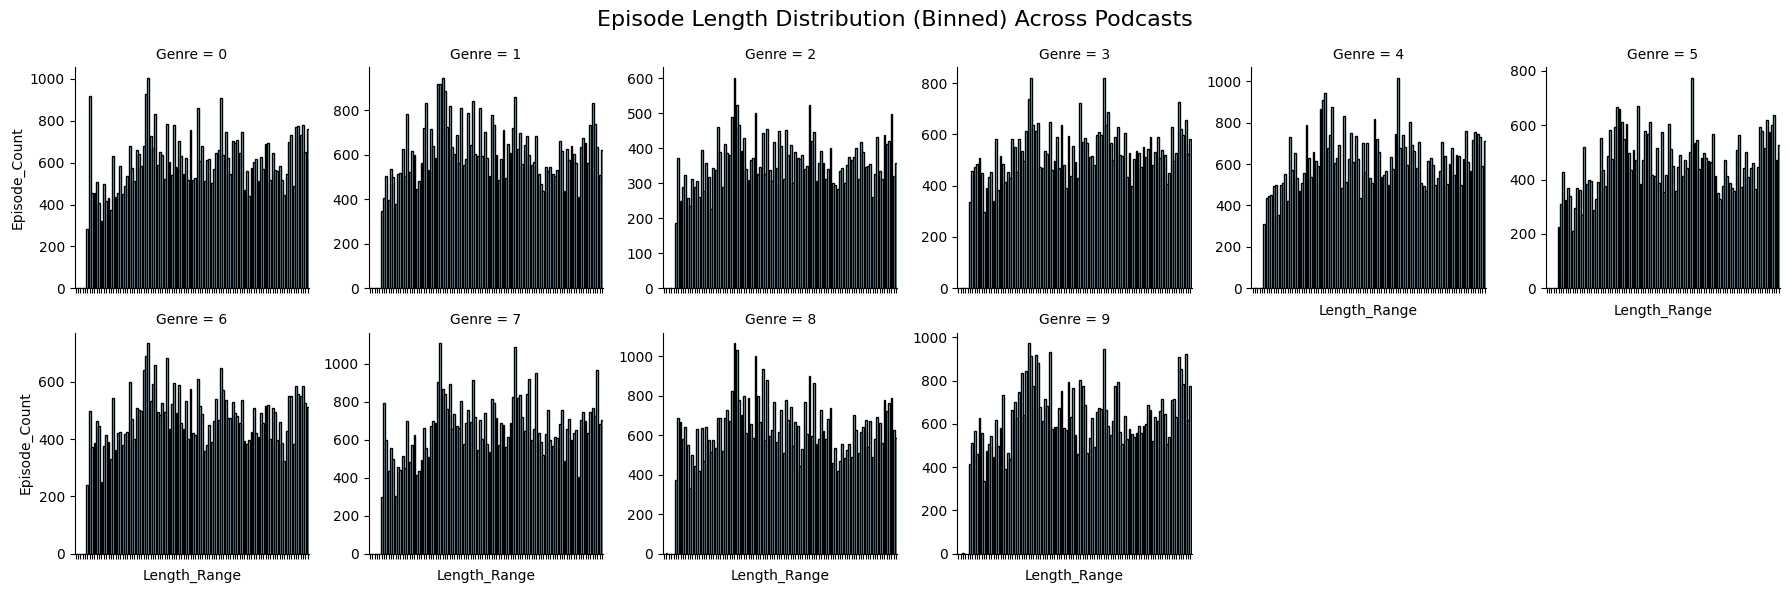

In [264]:
bins = list(range(0, int(100) + 1, 1))
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins) - 1)]

# Add a 'Length_Range' column
Train_df_new_wo_pca['Length_Range'] = pd.cut(
    Train_df_new_wo_pca['Episode_Length_minutes'], 
    bins=bins, 
    labels=labels, 
    right=False
)

# Prepare a new dataframe for plotting
plot_df = (
    Train_df_new_wo_pca.groupby(['Genre', 'Length_Range'])
    .size()
    .reset_index(name='Episode_Count')
)

# Plot using seaborn's FacetGrid
g = sns.FacetGrid(
    plot_df, 
    col="Genre", 
    col_wrap=6,  # change this depending on how many columns you want per row
    sharey=False, 
    height=3
)
g.map_dataframe(sns.barplot, x='Length_Range', y='Episode_Count', color='skyblue', edgecolor='black')

# Rotate x-axis labels
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.subplots_adjust(top=0.92)
g.fig.suptitle("Episode Length Distribution (Binned) Across Podcasts", fontsize=16)
plt.tight_layout()
plt.show()

In [265]:
# x = 
data = Train_df_new_wo_pca[Train_df_new_wo_pca['Podcast_Name'] == 0].sort_values(by = 'Episode_Title').groupby('Episode_Title')[['Episode_Length_minutes', 'Genre']].count().reset_index()

In [266]:
np.mean(data['Episode_Length_minutes'] - data['Genre'])

-19.79

In [267]:
x_ep= data['Episode_Title']
y_ep = data['Episode_Length_minutes']
x_g = data['Episode_Title']
y_g = data['Genre']

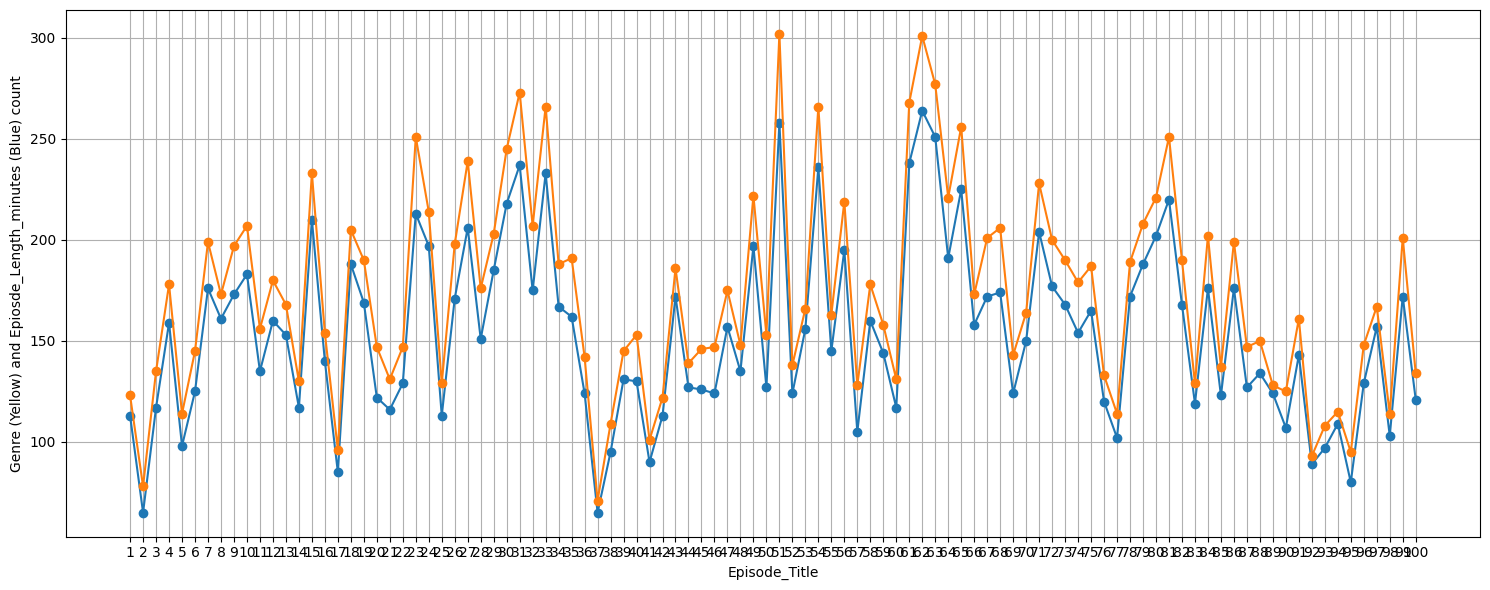

In [268]:
plt.figure(figsize=(15, 6))
plt.plot(x_ep, y_ep, marker='o')
plt.plot(x_g, y_g, marker = 'o')
plt.grid(True)
plt.xticks(x_ep)  # ensures x-ticks are episode group start numbers
plt.xlabel("Episode_Title")
plt.ylabel("Genre (Yellow) and Epiosde_Length_minutes (Blue) count")
plt.tight_layout()
plt.show()

In [269]:
# plt.figure(figsize=(12, 6))
# plt.plot(x, y, marker='o')
# plt.grid(True)
# plt.xticks(x)  # ensures x-ticks are episode group start numbers
# plt.tight_layout()
# plt.show()

In [270]:
d = Train_df_new_wo_pca[Train_df_new_wo_pca['Podcast_Name'] == 0].sort_values(by = 'Episode_Title').groupby('Episode_Title')

In [271]:
d

In [272]:
data.columns

Index(['Episode_Title', 'Episode_Length_minutes', 'Genre'], dtype='object')

1 100


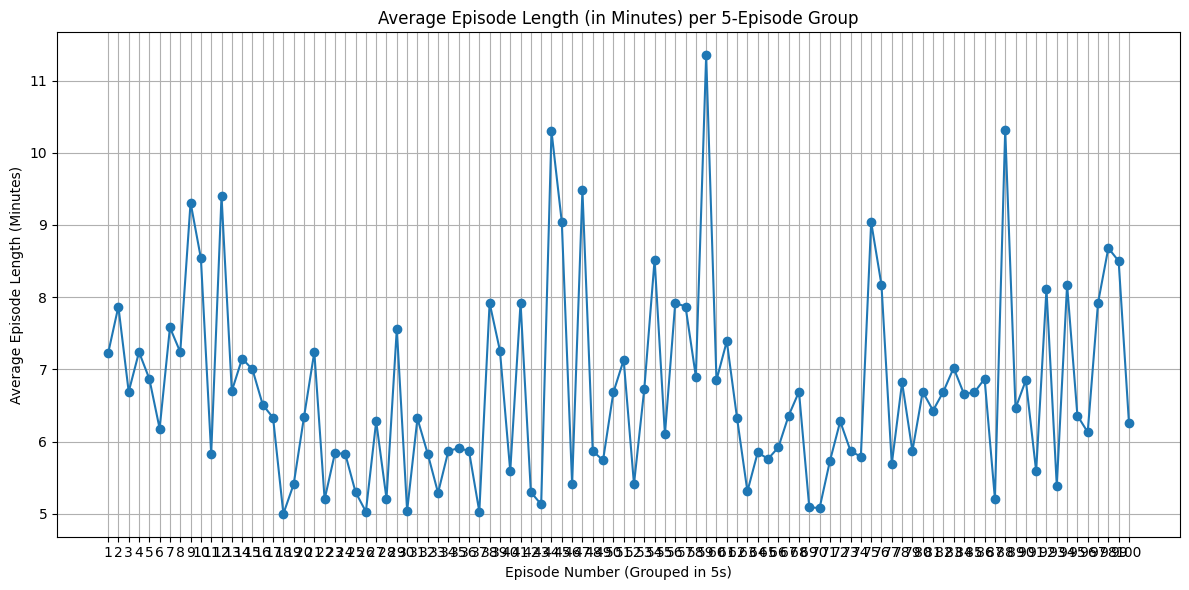

In [273]:
filtered_df = Train_df_new_wo_pca[Train_df_new_wo_pca['Podcast_Name'] == 0].copy()

# Sort by episode title or index
filtered_df = filtered_df.sort_values('Episode_Title')  # or 'episode_index' if numeric
print(filtered_df['Episode_Title'].min(), filtered_df['Episode_Title'].max())
# Add episode number if not already there
filtered_df['episode_number'] = range(1, len(filtered_df) + 1)

# Bin every 5 episodes
filtered_df['episode_group'] = filtered_df['Episode_Title']
# print(grouped[''])
# Calculate average length per 5-episode group
grouped = filtered_df.groupby('episode_group')['Episode_Length_minutes'].min().reset_index()
# grouped = grouped[20:40]
# Plot line graph
plt.figure(figsize=(12, 6))
plt.plot(grouped['episode_group'], grouped['Episode_Length_minutes'], marker='o')
plt.title("Average Episode Length (in Minutes) per 5-Episode Group")
plt.xlabel("Episode Number (Grouped in 5s)")
plt.ylabel("Average Episode Length (Minutes)")
plt.grid(True)
plt.xticks(grouped['episode_group'])  # ensures x-ticks are episode group start numbers
plt.tight_layout()
plt.show()

In [274]:
X = Train_df_new_wo_pca_filled.drop(TARGET, axis = 1)
y = Train_df_new_wo_pca_filled[TARGET]
# X_train, X_test,y_train, y_test = 

In [275]:
len(X.drop(['Episode_Length_minutes','Guest_Popularity_percentage'],axis = 1).columns)

8

In [276]:
X.drop(['Episode_Length_minutes','Guest_Popularity_percentage'],axis = 1).columns

Index(['Episode_Title', 'Genre', 'Host_Popularity_percentage',
       'Publication_Time', 'Number_of_Ads', 'Episode_Sentiment', 'encoded',
       'Podcast_Name'],
      dtype='object')

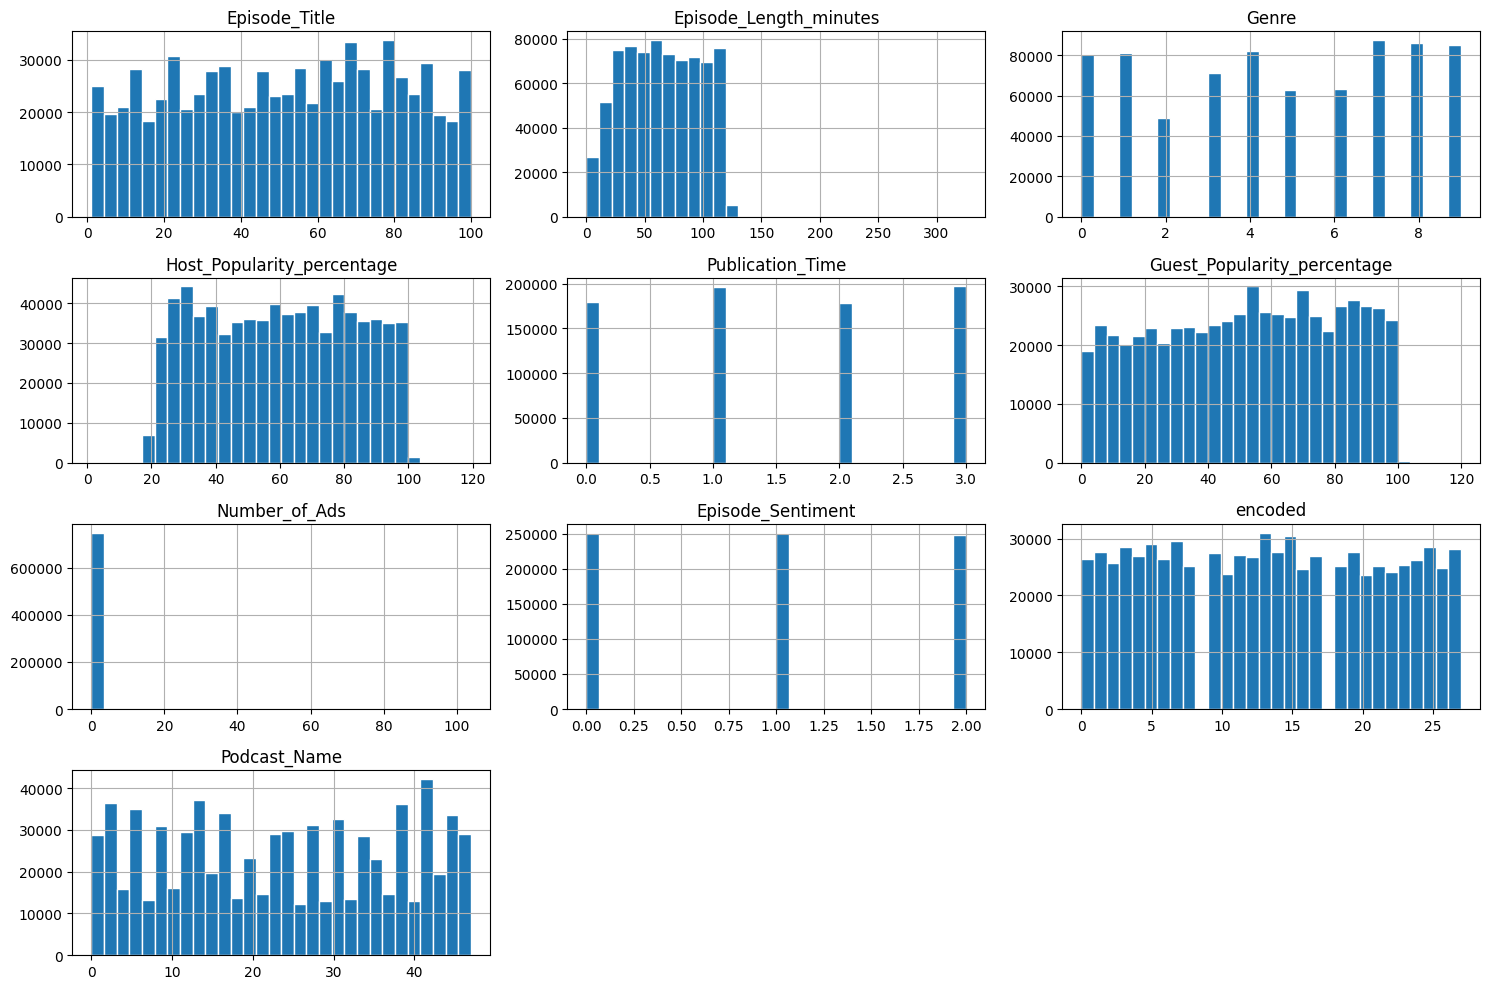

In [277]:
X.hist(figsize=(15, 10), bins=30, edgecolor = "white")
plt.tight_layout()
plt.show()

In [278]:
# for i in X.drop(['Episode_Length_minutes','Guest_Popularity_percentage'],axis = 1).columns:
#     X[f'log_{i}'] = np.log1p(X[i])


In [279]:
# inf_cols = X.columns[np.isinf(X).any()].tolist()

In [280]:
# inf_cols

In [281]:
# X[np.isinf(X[inf_cols]).any(axis=1)]

In [282]:
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = poly.fit_transform(X.drop(['Episode_Length_minutes','Guest_Popularity_percentage'], axis = 1))

In [283]:
# pca = PCA(n_components = 3)

In [284]:
# X_poly_pca = pca.fit_transform(X_poly)
# del X_poly

In [285]:
# X_poly_pca.shape

In [286]:
# ep_poly_df = pd.concat([X['Episode_Length_minutes'],pd.DataFrame(X_poly)], axis = 1)

In [287]:
# max_corr = -np.inf
# feat = -1
# for i in ep_poly_df.drop('Episode_Length_minutes', axis = 1).columns:
#     corr = ep_poly_df['Episode_Length_minutes'].corr(ep_poly_df[i])
#     if max_corr < corr:
#         max_corr = corr
#         feat = i
#         print("done")

In [288]:
# max_corr

In [289]:
# feat

In [290]:
!pip install gplearn

In [291]:
from gplearn.genetic import SymbolicTransformer
gp = SymbolicTransformer(generations=5, population_size=100,
                         hall_of_fame=100, n_components=100,
                         function_set=['add', 'sub', 'mul', 'div', 'log','sqrt','abs'],
                         random_state=42, verbose=1)

In [292]:
X_t = X[~X['Episode_Length_minutes'].isna()]
gp.fit(X_t.drop(['Episode_Length_minutes','Guest_Popularity_percentage'], axis = 1), X_t['Episode_Length_minutes'])

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    10.93        0.0144695        2        0.0533323              N/A     19.66s
   1     5.52         0.032617        4        0.0534394              N/A     13.60s
   2     2.05        0.0503407        3        0.0534394              N/A      9.83s
   3     2.09        0.0470847        2        0.0533323              N/A      5.47s
   4     2.05        0.0489324        2        0.0533323              N/A      0.00s


SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div', 'log', 'sqrt',
                                  'abs'],
                    generations=5, n_components=100, population_size=100,
                    random_state=42, verbose=1)

In [293]:
X_transformed = gp.transform(X.drop(['Episode_Length_minutes','Guest_Popularity_percentage'], axis = 1))

In [294]:
ep_poly_df = pd.concat([X.drop('Guest_Popularity_percentage', axis = 1), pd.DataFrame(X_transformed)], axis = 1)

In [295]:
max_corr = -np.inf
feat = -1
for i in ep_poly_df.drop('Episode_Length_minutes', axis = 1).columns:
    corr = ep_poly_df['Episode_Length_minutes'].corr(ep_poly_df[i])
    if max_corr < corr:
        max_corr = corr
        feat = i
        print("done")

done
done
done
done


In [296]:
max_corr

0.02422874215821975

In [297]:
feat

'Episode_Sentiment'

In [298]:
X.columns

Index(['Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment',
       'encoded', 'Podcast_Name'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

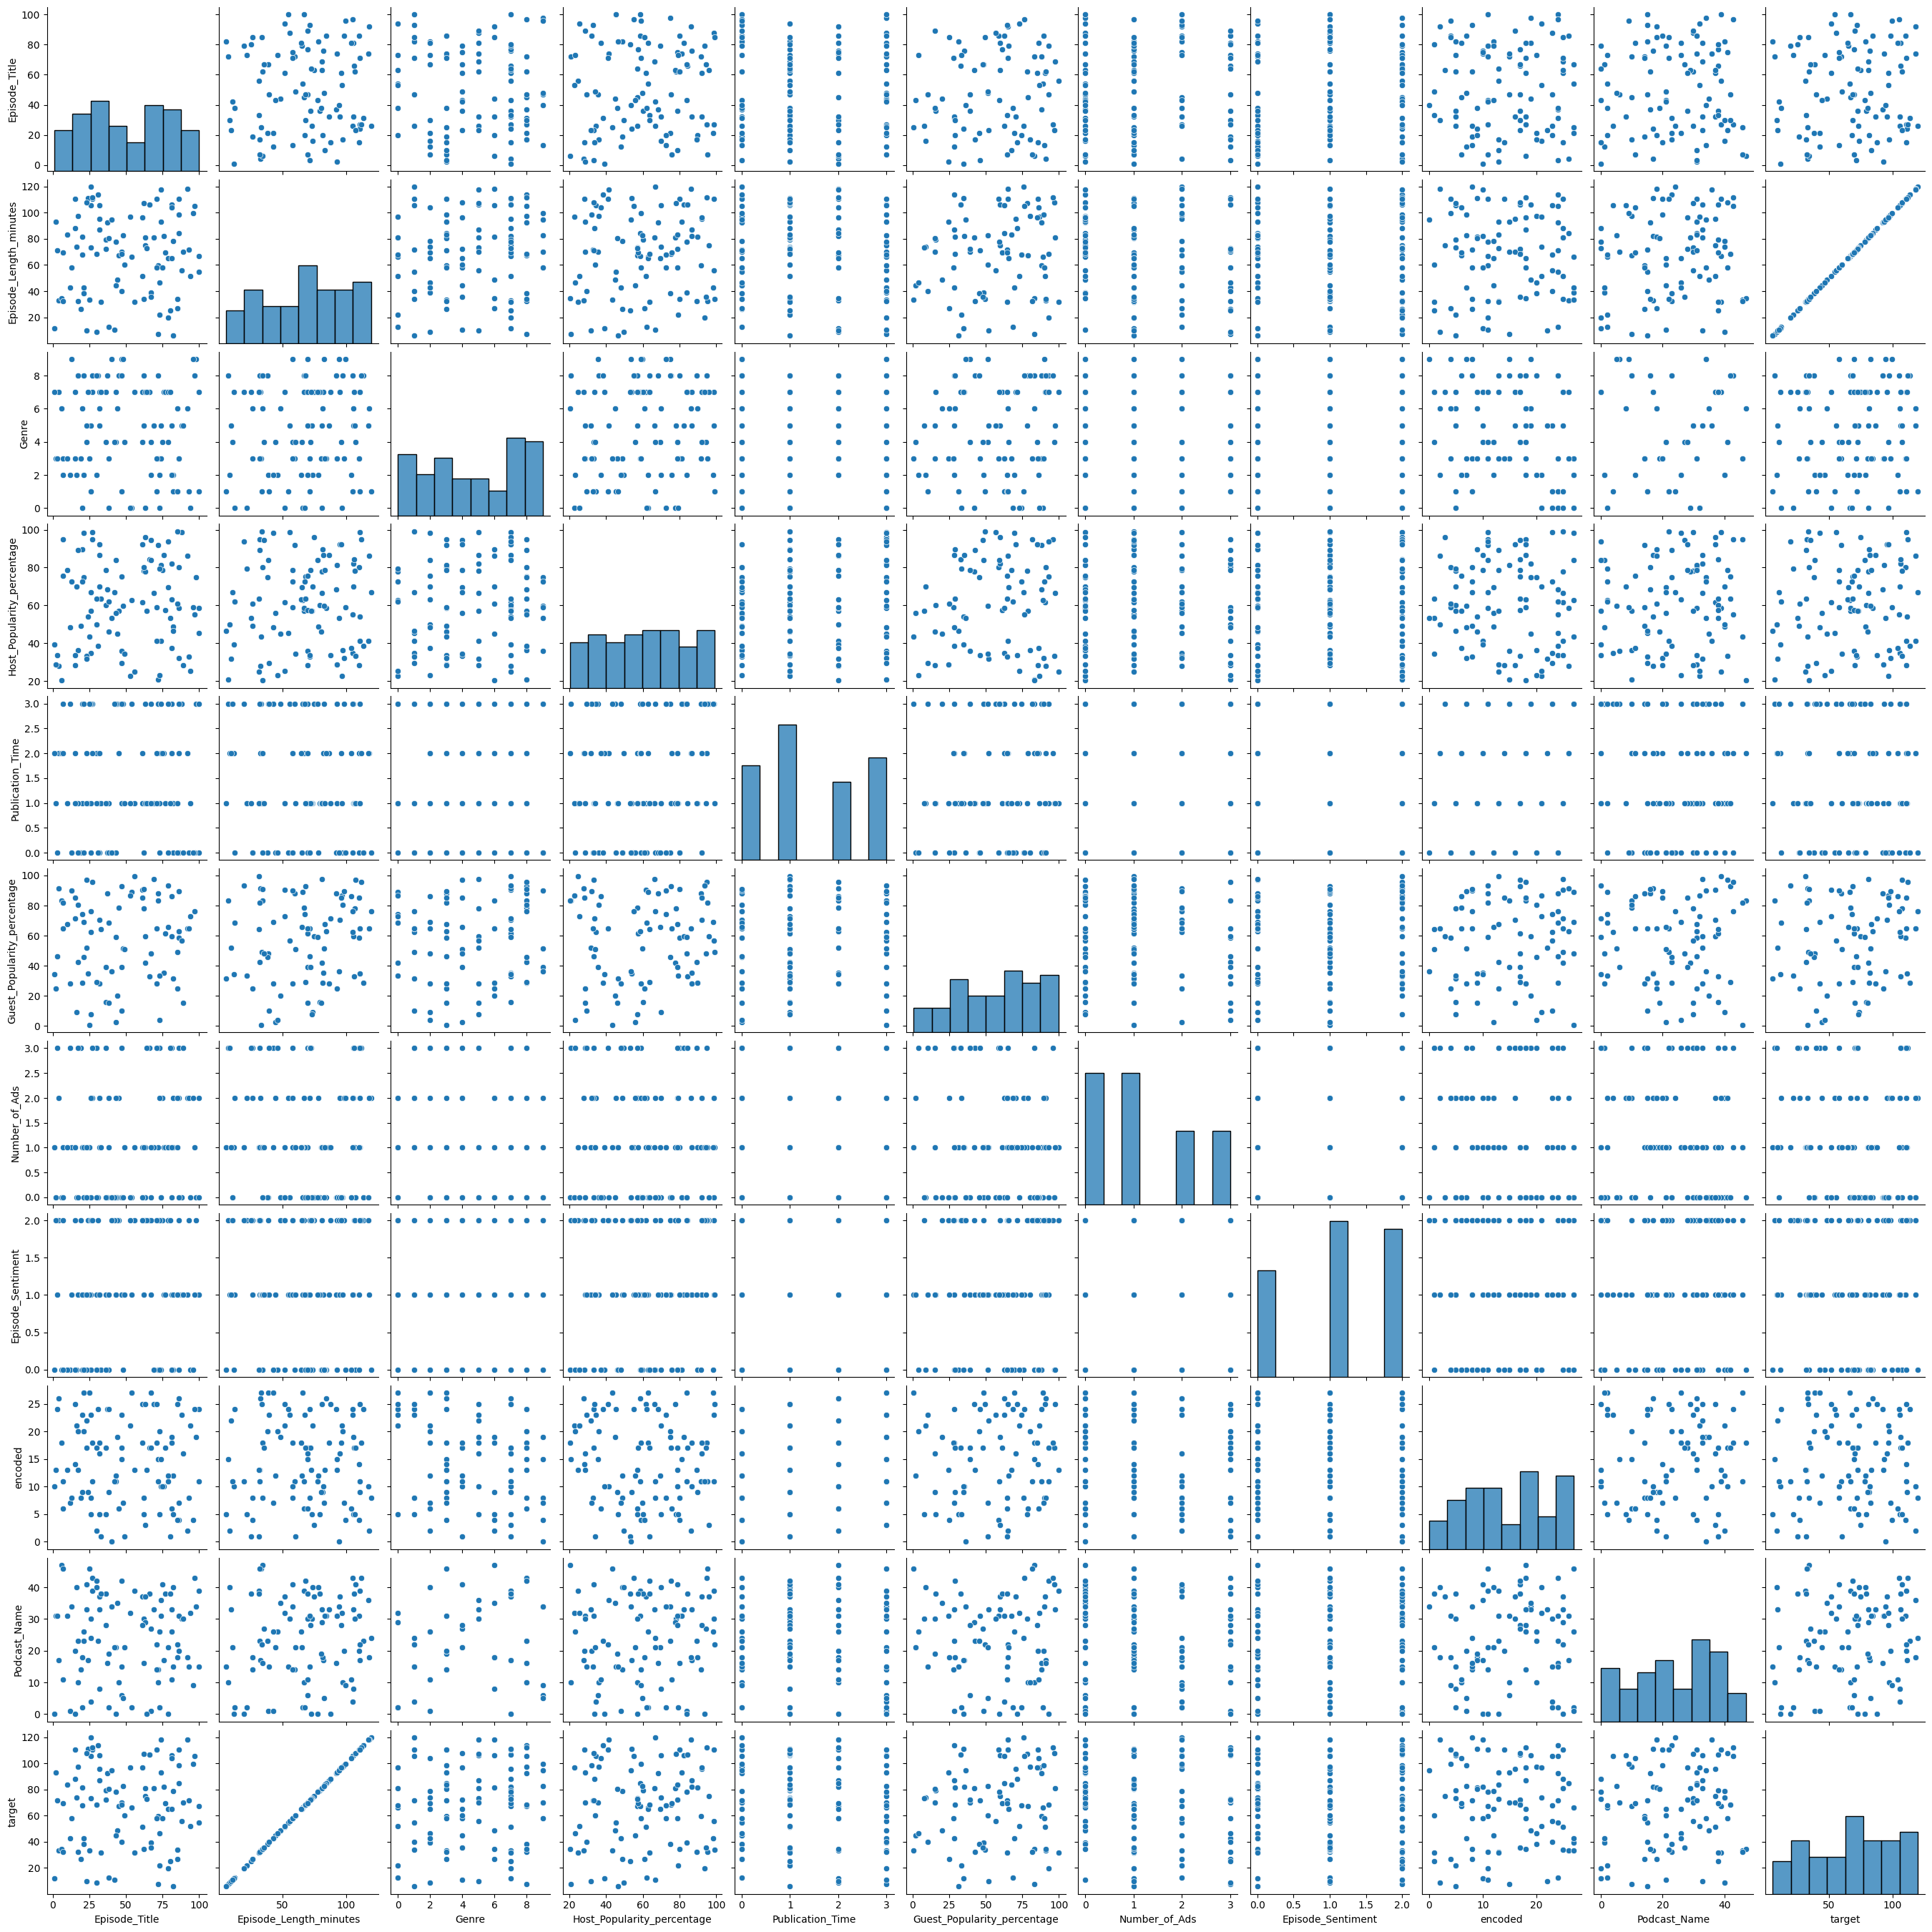

In [299]:
sns.pairplot(X.head(100).assign(target=X['Episode_Length_minutes']))

In [300]:
X.drop_duplicates().shape

(750000, 10)

In [301]:
# plt.figure(figsize=(12, 8))
# sns.heatmap(ep_poly_df.corr(),annot = True, cmap = 'coolwarm')
# # sns.heatmap(Train_df_new_wo_pca.drop(TARGET, axis = 1).corr(),annot = True, cmap = 'coolwarm', ax = axs[1])
# # plt.tight_layout()
# plt.show()

In [302]:
# data = np.array(dTrain['Episode_Length_minutes'])

In [303]:
# window_size = 5
# X = []
# for i in range(len(data) - window_size):
#     X.append(data[i:i+window_size])

# X = np.array(X)

# # Reshape to [samples, time_steps, features]
# X = X.reshape((X.shape[0], X.shape[1], 1))  # 1 feature

In [304]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# model = Sequential([
#     Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(window_size, 1)),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(50, activation='relu'),
#     Dense(1)  # For regression; use `Dense(1, activation='sigmoid')` for classification
# ])

# model.compile(optimizer='adam', loss='mse')

In [305]:
# y = data[window_size:]  # One-step prediction

# model.fit(X, y, epochs=50, verbose=1)

In [306]:
# model.save('cnn_model.h5')

In [307]:
# from tensorflow.keras.models import Model

# # Create a model to extract features
# feature_extractor = Model(inputs=model.inputs, outputs=model.layers[0].output)
# features = feature_extractor.predict(X)

# print(features.shape)  # [samples, new_seq_len, filters]

In [308]:
# features_flat = features.reshape((features.shape[0], -1))

In [309]:
# pd.DataFrame(features_flat).head(100).isna().sum()

In [310]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [311]:
# Train_df_new_wo_pca_filled.to_csv('train_df_new_wo_pca_filled.csv', index = False)

In [312]:
# Test_df_new_wo_pca_filled.to_csv('test_df_new_wo_pca_filled.csv', index = False)

In [313]:
Train_df_new_wo_pca.head(20)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Episode_Title  Episode_Length_minutes  Genre  \
150178             16                    0.00      4   
250219             81                    1.24      4   
453791             63                    1.48      8   
642283             31                    1.84      1   
553429             78                    2.47      1   
674029             85                    2.47      3   
107984             52                    2.47      9   
486115             78                    2.47      1   
131077              1                    2.97      4   
398796             24                    5.00      4   
522809             36                    5.00      5   
599116             92                    5.00      9   
412853             27                    5.00      4   
531138              7                    5.00      3   
279559             84                    5.00      5   
412660             36                    5.00      6   
673841              4                    5.00      4   
151811             31                    5.00      4   
107344             39                    5.00      1   
269268             51                    5.00      1   

        Host_Popularity_percentage  Publication_Time  \
150178                       46.97                 0   
250219                       84.29                 1   
453791                       38.98                 1   
642283                       87.41                 3   
553429                       79.66                 0   
674029                       79.66                 0   
107984                       35.05                 3   
486115                       39.30                 0   
131077                       25.83                 3   
398796                       82.95                 1   
522809                       71.18                 1   
599116                       72.34                 1   
412853                       82.83                 1   
531138                       99.12                 0   
279559                       49.20                 3   
412660                       82.83                 1   
673841                       43.92                 0   
151811                       64.50                 0   
107344                       31.56                 1   
269268                       49.29                 3   

        Guest_Popularity_percentage  Number_of_Ads  Episode_Sentiment  \
150178                          NaN            0.0                  0   
250219                        49.43            0.0                  1   
453791                        25.24            1.0                  1   
642283                        57.78            1.0                  2   
553429                        38.46            0.0                  0   
674029                         4.20            0.0                  0   
107984                        75.68            0.0                  1   
486115                        79.30            0.0                  0   
131077                        73.42            2.0                  0   
398796                        95.08            1.0                  2   
522809                        95.08            1.0                  2   
599116                         6.63            0.0                  1   
412853                        85.13            1.0                  2   
531138                        41.10            3.0                  0   
279559                        78.75            0.0                  0   
412660                        85.95            1.0                  2   
673841                          NaN            1.0                  0   
151811                        47.43            2.0                  0   
107344                         4.28            3.0                  0   
269268                        28.02            3.0                  2   

        Listening_Time_minutes  encoded  Podcast_Name Length_Range  
150178                 9.60684        0            

# Correlating multiple features

In [314]:
Train_df_new_wo_pca.drop([TARGET, 'Episode_Length_minutes', 'Length_Range', 'Guest_Popularity_percentage'], axis = 1).columns

Index(['Episode_Title', 'Genre', 'Host_Popularity_percentage',
       'Publication_Time', 'Number_of_Ads', 'Episode_Sentiment', 'encoded',
       'Podcast_Name'],
      dtype='object')

In [315]:
pca = PCA(n_components = 1)
Train_df_new_wo_pca['pca'] = 0
Train_df_new_wo_pca['pca'] = pca.fit_transform(Train_df_new_wo_pca.drop([TARGET, 'Episode_Length_minutes', 'Length_Range', 'Guest_Popularity_percentage'], axis = 1))

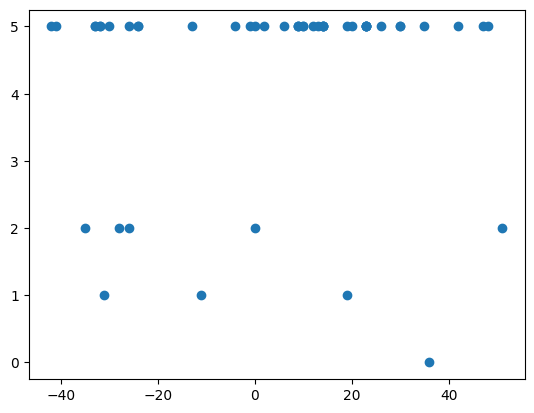

In [316]:
plt.plot(Train_df_new_wo_pca["pca"][0:50]//1, Train_df_new_wo_pca["Episode_Length_minutes"][0:50]//1, 'o')

<Axes: xlabel='pca', ylabel='Episode_Length_minutes'>

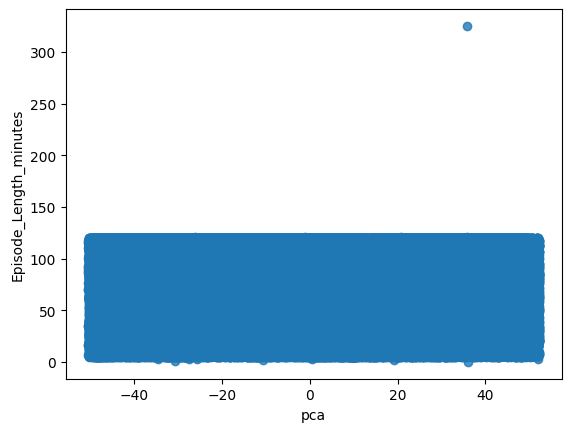

In [317]:
sns.regplot(x = "pca", y = "Episode_Length_minutes", data = Train_df_new_wo_pca)

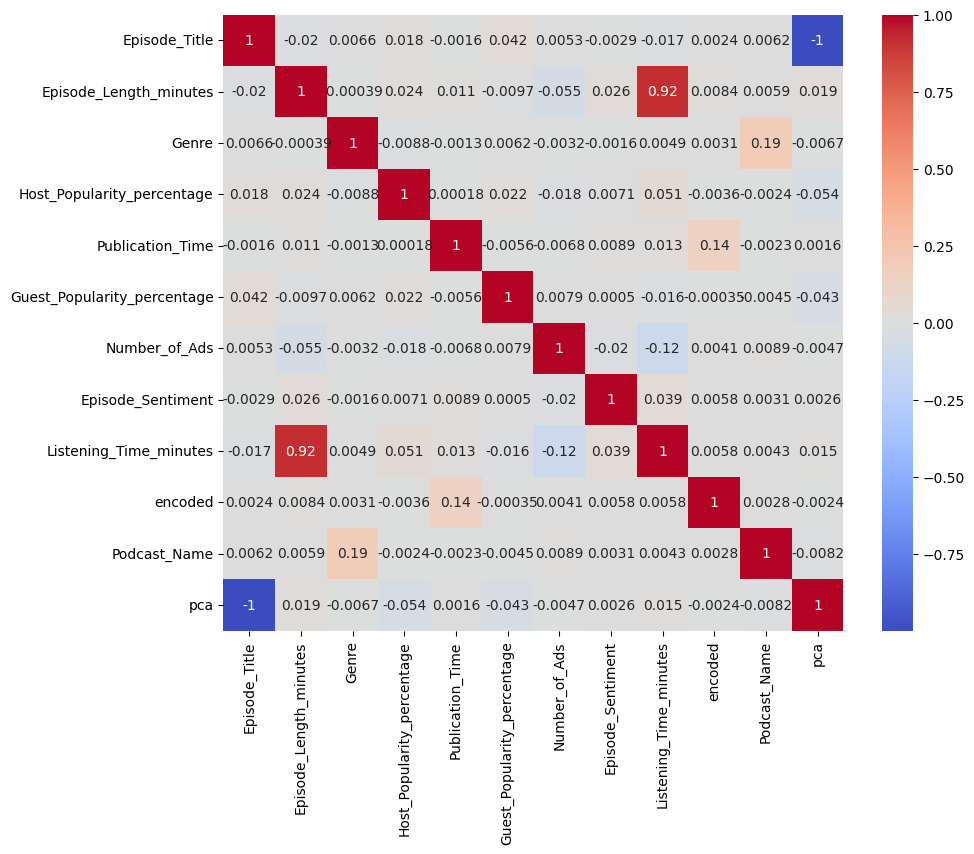

In [318]:
plt.figure(figsize = (10,8))
sns.heatmap(Train_df_new_wo_pca.drop('Length_Range', axis = 1).corr(),annot = True, cmap = 'coolwarm')
plt.show()

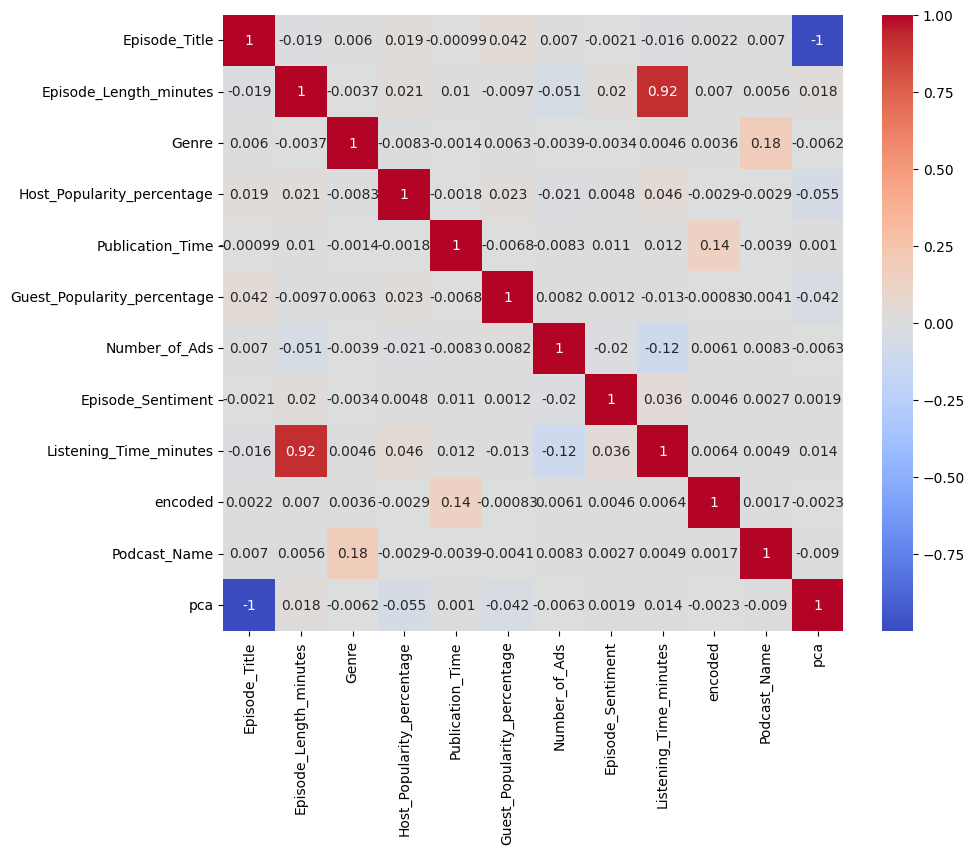

In [319]:
plt.figure(figsize = (10,8))
sns.heatmap(Train_df_new_wo_pca.drop('Length_Range', axis = 1).dropna().corr(),annot = True, cmap = 'coolwarm')
plt.show()

In [334]:
new_df = round(Train_df_new_wo_pca[~Train_df_new_wo_pca['Episode_Length_minutes'].isna()], 2)

In [335]:
new_df['List_ep_length_perc'] = (new_df['Listening_Time_minutes']/new_df['Episode_Length_minutes'])

In [ ]:
new_df['List_ep']

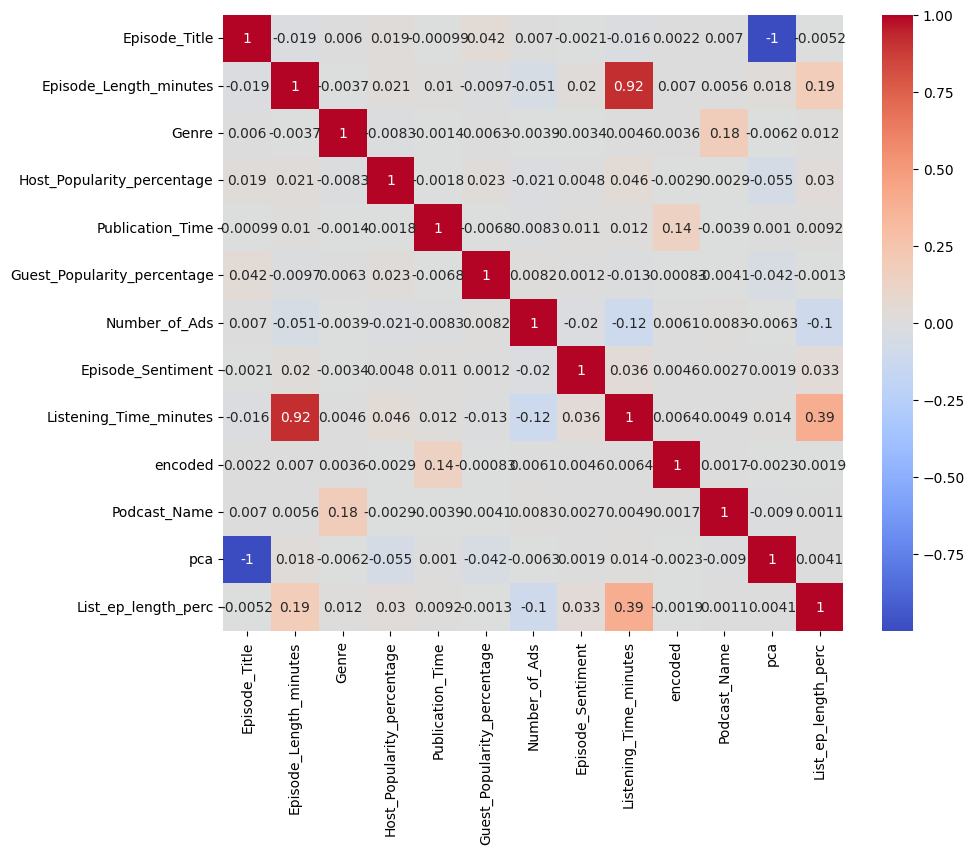

In [336]:
plt.figure(figsize = (10,8))
sns.heatmap(new_df.drop('Length_Range', axis = 1).dropna().corr(),annot = True, cmap = 'coolwarm')
plt.show()

In [357]:
new_df = new_df[~(new_df['List_ep_length_perc'] > 100)]

In [363]:
new_df.drop([TARGET, 'Length_Range', 'pca', 'List_ep_length_perc'], axis = 1)

Episode_Title  Episode_Length_minutes  Genre  \
250219             81                    1.24      4   
453791             63                    1.48      8   
642283             31                    1.84      1   
553429             78                    2.47      1   
674029             85                    2.47      3   
...               ...                     ...    ...   
168115             78                  120.64      3   
74270              31                  120.64      8   
552181             15                  120.73      7   
598106             53                  120.93      9   
101637             16                  325.24      4   

        Host_Popularity_percentage  Publication_Time  \
250219                       84.29                 1   
453791                       38.98                 1   
642283                       87.41                 3   
553429                       79.66                 0   
674029                       79.66                 0   
...                            ...               ...   
168115                       49.78                 2   
74270                        49.78                 2   
552181                       78.42                 1   
598106                       48.73                 2   
101637                       50.69                 0   

        Guest_Popularity_percentage  Number_of_Ads  Episode_Sentiment  \
250219                        49.43            0.0                  1   
453791                        25.24            1.0                  1   
642283                        57.78            1.0                  2   
553429                        38.46            0.0                  0   
674029                         4.20            0.0                  0   
...                             ...            ...                ...   
168115                        50.54            1.0                  1   
74270                         50.54            1.0                  1   
552181                        54.24            1.0                  1   
598106                        72.96            2.0                  2   
101637                        15.01            0.0                  2   

        encoded  Podcast_Name  
250219       17            27  
453791        1            42  
642283       19            15  
553429        4            25  
674029        4            31  
...         ...           ...  
168115       18            46  
74270        10            43  
552181        1             0  
598106        2             5  
101637       20            21  

[662906 rows x 10 columns]

In [358]:
X = xgb.DMatrix(new_df.drop([TARGET, 'Length_Range', 'pca', 'List_ep_length_perc'], axis = 1))
y = new_df['List_ep_length_perc']
X_train, X_test, y_train, y_test = train_test_split(X.get_data(),y , test_size = 0.2)

In [347]:
# new_df.drop(['Length_Range', 'pca'], axis = 1)[new_df.drop(['Length_Range', 'pca'], axis = 1)['List_ep_length_perc']==np.inf]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Episode_Title  Episode_Length_minutes  Genre  \
150178             16                     0.0      4   

        Host_Popularity_percentage  Publication_Time  \
150178                       46.97                 0   

        Guest_Popularity_percentage  Number_of_Ads  Episode_Sentiment  \
150178                          NaN            0.0                  0   

        Listening_Time_minutes  encoded  Podcast_Name  List_ep_length_perc  
150178                    9.61        0            12                  inf

In [359]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [362]:
print(np.sqrt(mean_squared_error(xgb_reg.predict(X_test), y_test)))

0.4122149889778589


In [325]:
from sklearn.linear_model import BayesianRidge

In [372]:
mask = ~Test_df_new_wo_pca['Episode_Length_minutes'].isna()
Test_df_new_wo_pca.loc[mask, 'List_ep_length_perc'] = xgb_reg.predict(
    Test_df_new_wo_pca.loc[mask, new_df.drop([TARGET, 'Length_Range', 'pca', 'List_ep_length_perc'], axis=1).columns]
)

<ipython-input-372-62efcd2a6140>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.6629324  0.7210742  0.6899525  ... 0.50920737 0.6844029  0.7481584 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Test_df_new_wo_pca.loc[mask, 'List_ep_length_perc'] = xgb_reg.predict(


In [375]:
# Test_df_new_wo_pca[~Test_df_new_wo_pca['Episode_Length_minutes'].isna()].index

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       249990, 249991, 249992, 249993, 249994, 249995, 249996, 249997, 249998,
       249999],
      dtype='int64', length=221264)

In [377]:
Test_df_new_wo_pca['Listening_Time_minutes'] = 0
Test_df_new_wo_pca.loc[mask,'Listening_Time_minutes'] = Test_df_new_wo_pca.loc[mask,'List_ep_length_perc']*Test_df_new_wo_pca.loc[mask, 'Episode_Length_minutes']

<ipython-input-377-d38c79394533>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[52.34514198 20.09633861 47.67571725 ...  6.16650123 77.65235111
 58.39376275]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Test_df_new_wo_pca.loc[mask,'Listening_Time_minutes'] = Test_df_new_wo_pca.loc[mask,'List_ep_length_perc']*Test_df_new_wo_pca.loc[mask, 'Episode_Length_minutes']


In [379]:
Test_df_new_wo_pca = Test_df_new_wo_pca.drop(['List_ep_length_perc'],axis = 1)

In [396]:
Train_df_new_wo_pca[~Train_df_new_wo_pca['Episode_Length_minutes'].isna()].drop([TARGET, 'pca','Length_Range', 'Guest_Popularity_percentage'], axis = 1).columns

Index(['Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Time', 'Number_of_Ads',
       'Episode_Sentiment', 'encoded', 'Podcast_Name'],
      dtype='object')

In [437]:
# Train_df_new_wo_pca['Episode_Length_minutes'] = Train_df['Episode_Length_minutes']
# Train_df_new_wo_pca['Guest_Popularity_percentage'] = Train_df['Guest_Popularity_percentage']

In [438]:
X = xgb.DMatrix(Train_df_new_wo_pca[~Train_df_new_wo_pca['Episode_Length_minutes'].isna()].drop([TARGET, 'pca','Length_Range', 'Guest_Popularity_percentage','Episode_Length_minutes'], axis = 1))
y = Train_df_new_wo_pca[~Train_df_new_wo_pca['Episode_Length_minutes'].isna()]['Episode_Length_minutes']
X_train, X_test, y_train, y_test = train_test_split(X.get_data(), y, test_size = 0.1)
xgb_reg.fit(X.get_data(), y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [394]:
# gp.fit(X, y)

ValueError: Expected 2D array, got scalar array instead:
array=<xgboost.core.DMatrix object at 0x7a4e0f7b9e70>.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [439]:
mask_na = Train_df_new_wo_pca['Episode_Length_minutes'].isna()

In [440]:
Train_df_new_wo_pca.loc[mask_na, 'Episode_Length_minutes'] = xgb_reg.predict(
    Train_df_new_wo_pca.loc[mask_na].drop(
        [TARGET, 'pca', 'Length_Range', 'Guest_Popularity_percentage', 'Episode_Length_minutes'], 
        axis=1
    )
)

In [441]:
Train_df_new_wo_pca.isna().sum()

Episode_Title                       0
Episode_Length_minutes              0
Genre                               0
Host_Popularity_percentage          0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       0
Episode_Sentiment                   0
Listening_Time_minutes              0
encoded                             0
Podcast_Name                        0
Length_Range                   214315
pca                                 0
dtype: int64

In [442]:
mask_na_ep_te = Test_df_new_wo_pca['Episode_Length_minutes'].isna()

In [445]:
Test_df_new_wo_pca.isna().sum()

Episode_Title                      0
Episode_Length_minutes             0
Genre                              0
Host_Popularity_percentage         0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
encoded                            0
Podcast_Name                       0
Listening_Time_minutes             0
dtype: int64

In [444]:
Test_df_new_wo_pca.loc[mask_na_ep_te, 'Episode_Length_minutes'] = xgb_reg.predict(
    Test_df_new_wo_pca.loc[mask_na_ep_te].drop(
        [TARGET, 'Guest_Popularity_percentage', 'Episode_Length_minutes'], 
        axis=1
    )
)

In [446]:
X = xgb.DMatrix(Train_df_new_wo_pca[~Train_df_new_wo_pca['Guest_Popularity_percentage'].isna()].drop([TARGET, 'pca','Length_Range', 'Guest_Popularity_percentage'], axis = 1))
y = Train_df_new_wo_pca[~Train_df_new_wo_pca['Guest_Popularity_percentage'].isna()]['Guest_Popularity_percentage']
X_train, X_test, y_train, y_test = train_test_split(X.get_data(), y, test_size = 0.1)
xgb_reg.fit(X.get_data(), y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [447]:
mask_na_gp_tr = Train_df_new_wo_pca['Guest_Popularity_percentage'].isna()

In [425]:
# Train_df_new_wo_pca.loc[mask_na_gp_tr, 'Guest_Popularity_percentage'] = Train_df.loc[mask_na_gp_tr, 'Guest_Popularity_percentage']

In [448]:
Train_df_new_wo_pca.loc[mask_na_gp_tr, 'Guest_Popularity_percentage'] = xgb_reg.predict(
    Train_df_new_wo_pca.loc[mask_na_gp_tr].drop(
        [TARGET, 'pca', 'Length_Range', 'Guest_Popularity_percentage'], 
        axis=1
    )
)

In [449]:
Train_df_new_wo_pca.isna().sum()

Episode_Title                       0
Episode_Length_minutes              0
Genre                               0
Host_Popularity_percentage          0
Publication_Time                    0
Guest_Popularity_percentage         0
Number_of_Ads                       0
Episode_Sentiment                   0
Listening_Time_minutes              0
encoded                             0
Podcast_Name                        0
Length_Range                   214315
pca                                 0
dtype: int64

In [415]:
# mask_na_ep = ~Test_df_new_wo_pca['Episode_Length_minutes'].isna()

In [450]:
mask_na_gp_te = Test_df_new_wo_pca['Guest_Popularity_percentage'].isna()

In [433]:
# Test_df_new_wo_pca['Episode_Length_minutes'] = Test_df['Episode_Length_minutes']
# Test_df_new_wo_pca['Guest_Popularity_percentage'] = Test_df['Guest_Popularity_percentage']

In [430]:
# Test_df_new_wo_pca.loc[mask_na_ep, 'Guest_Popularity_percentage'] = Test_df.loc[mask_na_ep, 'Guest_Popularity_percentage']

In [451]:
Test_df_new_wo_pca.loc[mask_na_gp_te, 'Guest_Popularity_percentage'] = xgb_reg.predict(
    Test_df_new_wo_pca.loc[mask_na_gp_te].drop(
        [TARGET, 'Guest_Popularity_percentage'], 
        axis=1
    )
)

In [452]:
Test_df_new_wo_pca.isna().sum()

Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
encoded                        0
Podcast_Name                   0
Listening_Time_minutes         0
dtype: int64

In [453]:
mask_na = Train_df['Episode_Length_minutes'].isna()

In [454]:
xgb_reg.fit(xgb.DMatrix(Train_df_new_wo_pca.loc[mask_na].drop(
        [TARGET, 'pca', 'Length_Range'], 
        axis=1
    )).get_data(), Train_df_new_wo_pca.loc[mask_na][TARGET])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [455]:
mask_na_ep = Test_df['Episode_Length_minutes'].isna()

In [456]:
Test_df_new_wo_pca.loc[mask_na_ep, 'Listening_Time_minutes'] = xgb_reg.predict(
    Test_df_new_wo_pca.loc[mask_na_ep].drop(
        [TARGET], 
        axis=1
    )
)

In [326]:
br = BayesianRidge()

In [327]:
br.fit(Train_df_new_wo_pca[~Train_df_new_wo_pca['Episode_Length_minutes'].isna()]['pca'].values.reshape(-1,1), Train_df_new_wo_pca[~Train_df_new_wo_pca['Episode_Length_minutes'].isna()]['Episode_Length_minutes'])

BayesianRidge()

In [322]:
Train_df_new_wo_pca_filled = Train_df_new_wo_pca.copy()

In [323]:
Train_df_new_wo_pca_filled.loc[
    Train_df_new_wo_pca_filled['Episode_Length_minutes'].isna(), 
    'Episode_Length_minutes'
] = br.predict(
    Train_df_new_wo_pca[Train_df_new_wo_pca['Episode_Length_minutes'].isna()]['pca'].values.reshape(-1,1)
)

NameError: name 'br' is not defined

NameError: name 'Train_df_new_wo_filled' is not defined

<Figure size 1000x800 with 0 Axes>

In [325]:
br.predict(
    Train_df_new_wo_pca[Train_df_new_wo_pca['Episode_Length_minutes'].isna()]['pca'].values.reshape(-1,1)
)

array([63.45195444, 63.82419754, 64.82083224, ..., 64.6950306 ,
       64.44970102, 65.35478722])

In [321]:
plt.figure(figsize = (10,8))
sns.heatmap(Train_df_new_wo_filled.dropna().corr(),annot = True, cmap = 'coolwarm')
plt.show()

NameError: name 'Train_df_new_wo_filled' is not defined

<Figure size 1000x800 with 0 Axes>

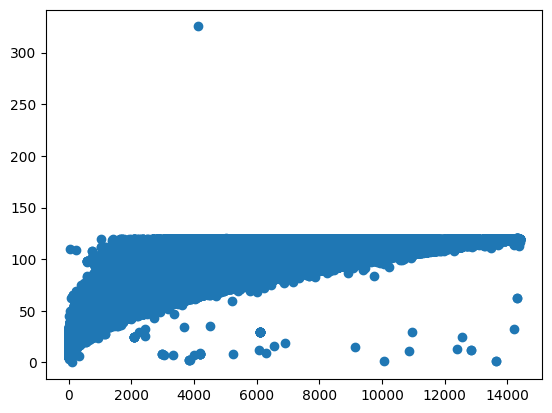

In [387]:
pca = PCA(n_components = 1)
X = Train_df_new_wo_pca[~ Train_df_new_wo_pca['Episode_Length_minutes'].isna()]['Listening_Time_minutes']**2
y = Train_df_new_wo_pca[~Train_df_new_wo_pca['Episode_Length_minutes'].isna()]['Episode_Length_minutes']
# X_f = Train_df_new_wo_pca_filled['Episode_Length_minutes']
# y_f = Train_df_new_wo_pca_filled['Listening_Time_minutes']
# fig,ax = plt.subplots(1, 2, figsize=(12, 10))
# ax[0].plot(X, y, 'o')
# ax[1].plot(X_f, y_f, 'o')
plt.plot(X,y, 'o')
# plt.tight_layout()
# sns.regplot(pd.DataFrame(pd.concat([X, y], axis = 1)).values)
plt.show()

In [327]:
X = Train_df_new_wo_pca_filled.drop([TARGET, 'Length_Range'], axis = 1)
y = Train_df_new_wo_pca_filled[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2)

In [328]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [352]:
print(np.sqrt(mean_squared_error(xgb_reg.predict(X_test), y_test)))

12.882700619746549


In [374]:
Train_df_new_wo_pca.columns

Index(['Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment',
       'Listening_Time_minutes', 'encoded', 'Podcast_Name', 'Length_Range',
       'pca'],
      dtype='object')

In [403]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
Train_df_new_wo_pca_poly = poly.fit_transform(Train_df_new_wo_pca[['Listening_Time_minutes', 'Number_of_Ads']])

In [404]:
Train_df_new_wo_pca_poly.shape

(750000, 5)

In [405]:
poly.get_feature_names_out()

array(['Listening_Time_minutes', 'Number_of_Ads',
       'Listening_Time_minutes^2', 'Listening_Time_minutes Number_of_Ads',
       'Number_of_Ads^2'], dtype=object)

In [378]:
# pca = PCA(n_components = 3)

In [379]:
# Train_df_new_wo_pca_poly = pca.fit_transform(Train_df_new_wo_pca_poly)

In [406]:
td = Train_df_new_wo_pca.copy()

In [407]:
td = pd.concat([td, pd.DataFrame(Train_df_new_wo_pca_poly)],axis = 1)

In [422]:
Train_df_new_wo_pca.columns

Index(['Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment',
       'Listening_Time_minutes', 'encoded', 'Podcast_Name', 'Length_Range',
       'pca'],
      dtype='object')

In [428]:
X = Train_df_new_wo_pca[~Train_df_new_wo_pca['Episode_Length_minutes'].isna()].drop(['Length_Range', TARGET, 'Guest_Popularity_percentage', 'Episode_Title', 'pca', 'Episode_Length_minutes'], axis = 1)
y = Train_df_new_wo_pca[~Train_df_new_wo_pca['Episode_Length_minutes'].isna()]['Episode_Length_minutes']

In [429]:
gp.fit(X, y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.49        0.0140147        5        0.0552278              N/A     19.40s
   1     5.41        0.0343275        2        0.0585758              N/A      9.37s
   2     3.06        0.0534093        5        0.0587732              N/A      8.00s
   3     2.09        0.0519086        2        0.0585758              N/A      5.15s
   4     2.12         0.053397        2        0.0585758              N/A      0.00s


SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div', 'log', 'sqrt',
                                  'abs'],
                    generations=5, n_components=100, population_size=100,
                    random_state=42, verbose=1)

In [425]:
Train_df_new_wo_pca_filled = Train_df_new_wo_pca.copy()

In [427]:
Train_df_new_wo_pca_filled[Train_df_new_wo_pca_filled['Episode_Length_minutes'].isna()].drop(['Length_Range', TARGET, 'Guest_Popularity_percentage', 'Episode_Title', 'pca'], axis = 1).isna().sum()

Episode_Length_minutes        87093
Genre                             0
Host_Popularity_percentage        0
Publication_Time                  0
Number_of_Ads                     0
Episode_Sentiment                 0
encoded                           0
Podcast_Name                      0
dtype: int64

In [430]:
Train_df_new_wo_pca_filled[Train_df_new_wo_pca_filled['Episode_Length_minutes'].isna()]['Episode_Length_minutes'] = gp.transform(Train_df_new_wo_pca_filled[Train_df_new_wo_pca_filled['Episode_Length_minutes'].isna()].drop(['Length_Range', TARGET, 'Guest_Popularity_percentage', 'Episode_Title', 'pca'], axis = 1))

ValueError: Input contains NaN.

In [453]:
result = df.groupby(['Podcast_Name', 'Genre']).agg(
    Episode_Length_List=('Episode_Length_minutes', list),
    Mean_Episode_Length=('Episode_Length_minutes', 'mean'),
    Std_Episode_Length=('Episode_Length_minutes', 'std'), 
    Min_val = ('Episode_Length_minutes', 'min'),
    Max_val  = ('Episode_Length_minutes', 'max'),
).reset_index()

# result.to_csv("Podcast_name, genre and episode length in minutes details.csv")

In [465]:
def list_contains_nan(lst):
    return any(pd.isna(x) for x in lst)
result.index(result[result['Podcast_Name']==result['Podcast_Name'].unique()[1]]['Episode_Length_List'].apply(list_contains_nan))

TypeError: 'RangeIndex' object is not callable

In [457]:
Test_df_new_wo_pca.isna().sum()

Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
encoded                        0
Podcast_Name                   0
Listening_Time_minutes         0
dtype: int64

In [409]:
X.shape

(662907, 5)

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [412]:
import copy
lr = LinearRegression()
xgb_temp = xgb.XGBRegressor(n_estimators = 100)
best_model_lr = lr
best_model_xgb = xgb_temp
min_rmse = np.inf
best_col = ""
for i in X_train.columns:
    lr.fit(X_train, y_train)
    xgb_temp.fit(X_train, y_train)
    rmse_lr = np.sqrt(mean_squared_error(lr.predict(X_test) , y_test))
    rmse_xgb = np.sqrt(mean_squared_error(xgb_temp.predict(X_test) , y_test))
    if rmse_lr < min_rmse:
        min_rmse = rmse_lr
        best_model_lr = lr
        best_col = i
    if rmse_xgb < min_rmse:
        min_rmse = rmse_xgb
        best_model_xgb = xgb_temp
        best_col = i

print("Best_col : ", best_col)
print("Least_rmse : ", min_rmse)

Best_col :  0
Least_rmse :  32.94769899150099


In [413]:
list(poly.get_feature_names_out())[best_col]

'Listening_Time_minutes'

# Submission

In [460]:
Train_df_new_wo_pca.to_csv("train_filled.csv")
Test_df_new_wo_pca.to_csv("test_filled.csv")

In [ ]:
# sub_df = pd.read_csv("/kaggle/input/playground-series-s5e4/sample_submission.csv")

In [ ]:
t_id = pd.read_csv("/kaggle/input/playground-series-s5e4/test.csv")["id"]
y_pred = pd.Series(xgb_reg.predict(Test_df_new_wo_pca_filled[xgb_reg.feature_names_in_]))
submission_df = pd.concat([t_id, y_pred], axis=1)
submission_df.columns = ['id', 'Listening_Time_minutes']
submission_df.to_csv("submission_20_04_2025_1.csv", index=False)

In [459]:
t_id = pd.read_csv("/kaggle/input/playground-series-s5e4/test.csv")["id"]
submission_df = pd.concat([t_id, Test_df_new_wo_pca['Listening_Time_minutes']], axis = 1)
submission_df.columns = ['id', 'Listening_Time_minutes']
submission_df.to_csv("submission_27_04_2025_1.csv", index=False)